# Telecom Churn Case study

#### Objective:
* Predict the churn probablities of high-value customers using the insights from Month 6,7,8 data
* Models used: Logostic Regression, Decision tree classifier, RandomForest Classifier

## 1. Importing the dataset and inspection

In [6]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to show all rows/cold\s
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)

#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Reading the datasets
df = pd.read_csv('telecom_churn_data.csv')
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [8]:
df.shape

(99999, 226)

In [9]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [10]:
# Checking missing values percentage in the dataset
round(100* df.isnull().sum()/len(df.index),2).sort_values(ascending = False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [11]:
print(df.describe())

       mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.5

## 2. Data Cleaning and preperation

#### 1. Removing columns which are not useful for the analysis

In [14]:
# Lets select all object type variables and check, drop columns which are not useful for the model
cols_to_drop = df.select_dtypes(include = [object])
cols_to_drop.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [15]:
# Above columns are not useful for the analysis and therfore can be dropped
df.drop(cols_to_drop.columns, axis = 1, inplace = True)
df.shape

(99999, 214)

In [16]:
# Deleting mobile nmber and ID as the data is already aggregated at Mobile no, and ID is same across
df.drop(['circle_id','mobile_number'],axis = 1, inplace = True)
df.shape

(99999, 212)

In [17]:
# Identifying and dropping all columns having more than 40% of values missing values
Missing_cut_off = 40
columns_to_drop = list(df.columns[100*df.isnull().mean()>Missing_cut_off])
print("No. of cols to drop - ", len(columns_to_drop))
print(columns_to_drop)

No. of cols to drop -  36
['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [18]:
# Drpoing the columns with high missing values
df.drop(columns_to_drop, axis = 1, inplace = True)
df.shape

(99999, 176)

In [19]:
# Rechecking missing values percentage in the dataset
round(100* df.isnull().sum()/len(df.index),2).sort_values(ascending = False)

std_og_t2c_mou_9      7.75
std_og_mou_9          7.75
loc_og_t2m_mou_9      7.75
loc_og_t2f_mou_9      7.75
std_ic_t2f_mou_9      7.75
loc_og_t2c_mou_9      7.75
loc_og_mou_9          7.75
std_og_t2m_mou_9      7.75
std_ic_t2m_mou_9      7.75
std_og_t2f_mou_9      7.75
isd_og_mou_9          7.75
roam_og_mou_9         7.75
std_ic_t2t_mou_9      7.75
spl_og_mou_9          7.75
og_others_9           7.75
spl_ic_mou_9          7.75
loc_ic_t2t_mou_9      7.75
loc_ic_mou_9          7.75
loc_ic_t2m_mou_9      7.75
loc_ic_t2f_mou_9      7.75
loc_og_t2t_mou_9      7.75
std_og_t2t_mou_9      7.75
roam_ic_mou_9         7.75
std_ic_mou_9          7.75
onnet_mou_9           7.75
isd_ic_mou_9          7.75
offnet_mou_9          7.75
std_ic_t2o_mou_9      7.75
ic_others_9           7.75
spl_ic_mou_8          5.38
spl_og_mou_8          5.38
offnet_mou_8          5.38
std_og_t2f_mou_8      5.38
std_ic_t2m_mou_8      5.38
std_og_mou_8          5.38
isd_og_mou_8          5.38
onnet_mou_8           5.38
s

In [20]:
#Almost all all of the columns remaining with missinng values are _mou (minutes of usage) and therefore can be imputed with 0
df.fillna(0,inplace = True)
df.shape

(99999, 176)

In [21]:
# Rechecking missing values percentage in the dataset
print(df.columns[df.isnull().sum()>0])

Index([], dtype='object')


#### 2. Filtering highvalue customers

##### Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [24]:
# Filtering high value customers by finding the 70th percentile of average recharge amount
df['avg_rech_amt'] = (df['total_rech_amt_6']+df['total_rech_amt_7'])/(df['total_rech_num_6']+df['total_rech_num_7'])
df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  197.385  214.816  213.803   
1             0.0             0.0             0.0   34.047  355.074  268.321   
2             0.0             0.0             0.0  167.690  189.058  210.226   
3             0.0             0.0             0.0  221.338  251.102  508.054   
4             0.0             0.0             0.0  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100         0.00         0.00         0.00         0.00          0.00   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00            0.0           0.00   
1         99.84        304.76         53.76            0.0           0.00   
2        220.59        208.36        118.91            0.0           0.00   
3        109.01         71.68        113.54            0.0          54.86   
4         91.88        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00            0.0           0.00           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00              0.00              0.00              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4              1.93               0.0              0.00              0.00   

   loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0              0.00          0.00          0.00          0.00          0.00   
1              0.00         35.39        150.51        299.54         72.11   
2              0.48       

In [25]:
df['avg_rech_amt'].describe()

count    99814.000000
mean        48.304356
std         52.076165
min          0.000000
25%         20.428571
50%         36.645752
75%         63.111111
max       4010.000000
Name: avg_rech_amt, dtype: float64

In [26]:
# defining cut-off
cut_off = df['avg_rech_amt'].quantile(0.70)
cut_off

56.38751753155677

In [27]:
# Filtering the customes above the cut-off values
df = df[df['avg_rech_amt']>=cut_off]
df.shape

(29944, 177)

#### 3. Tagging churners and removing attributes of Churn phase

In [29]:
#Flaging the cutomers with no activity in month 9 as churn
cols = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
df['churn'] = np.where(df[cols].sum(axis=1)==0,'1','0')

In [30]:
round(df['churn'].value_counts(normalize = True)*100,2)

churn
0    91.31
1     8.69
Name: proportion, dtype: float64

##### There is class imbalance in the dataset

In [32]:
#Removing all attributes of churn phase, which are all variables ending with _9
df = df.drop([col for col in df.columns if col.endswith('_9')],axis = 1)
df.shape

(29944, 136)

##### Removing all cols with single value

In [34]:
# Get columns with only one unique value
single_value_cols = [col for col in df.columns if df[col].nunique() == 1]
# Display the columns with only one unique value
print(single_value_cols)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [35]:
# Deleting columns with single values
df.drop(single_value_cols,axis = 1, inplace = True)
df.shape

(29944, 127)

In [36]:
# Remove the average recharge amount col created
df.drop('avg_rech_amt', axis = 1, inplace = True)
df.shape

(29944, 126)

In [37]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 29944 entries, 0 to 99998
Data columns (total 126 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   loc_o



## 3. EDA and correlation

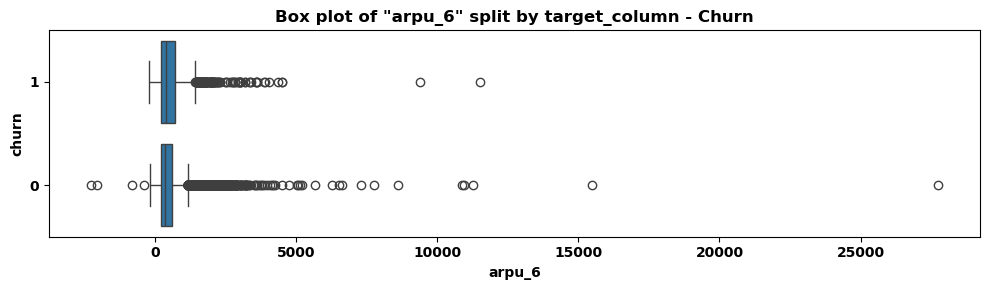

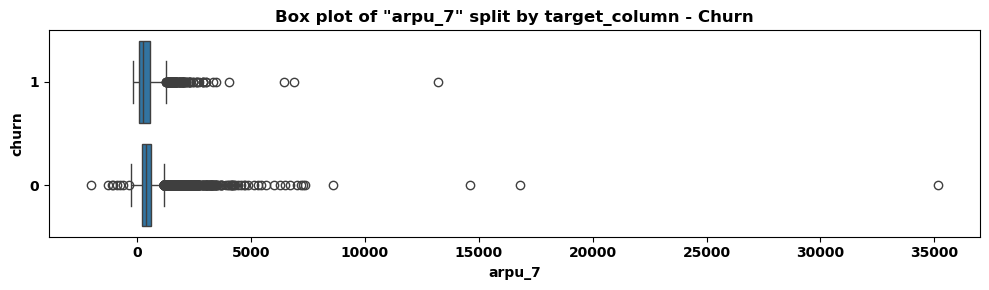

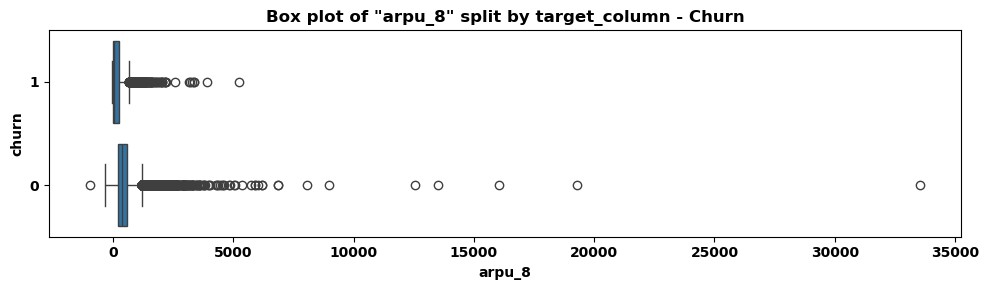

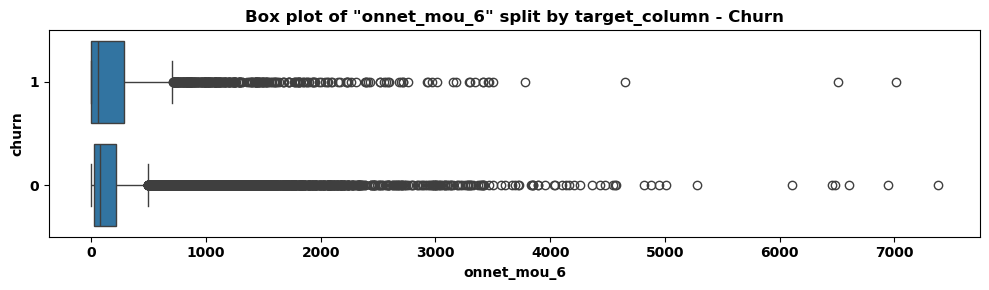

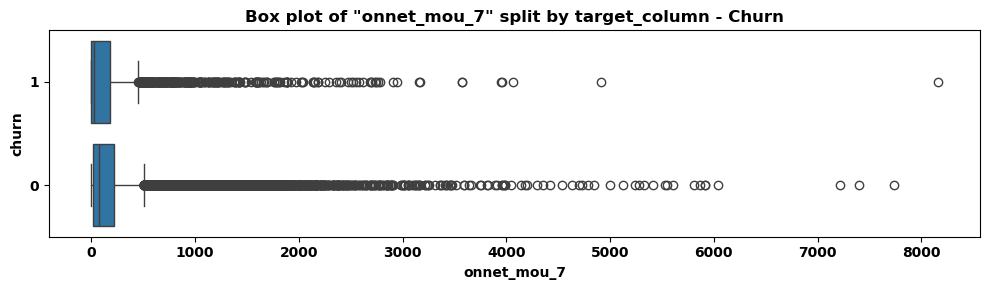

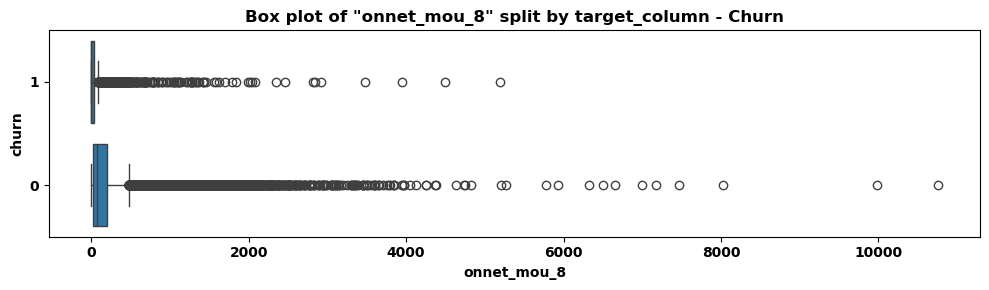

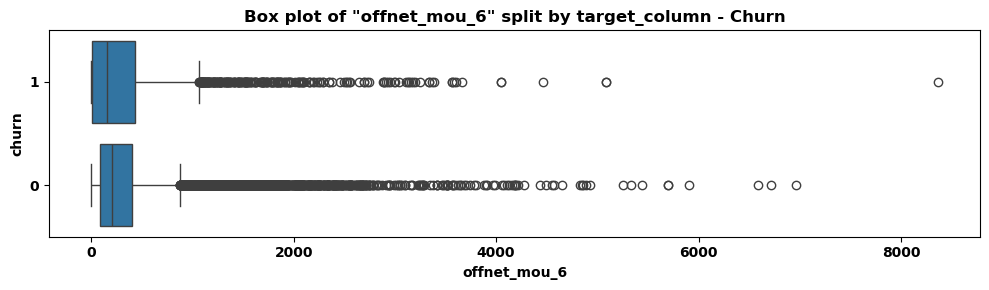

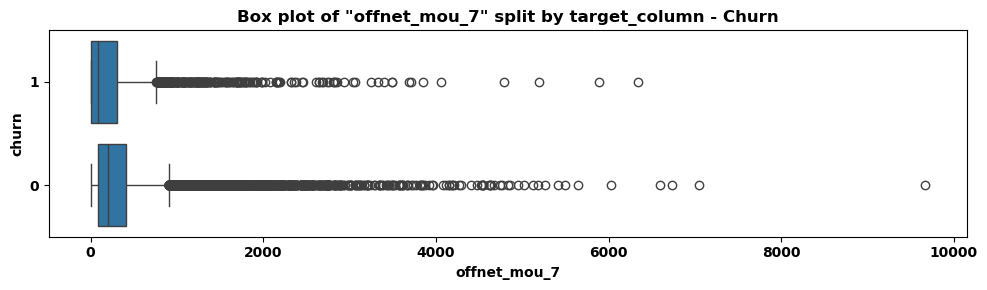

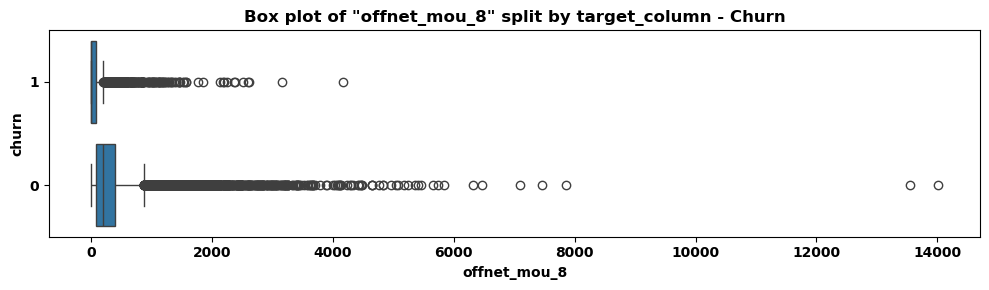

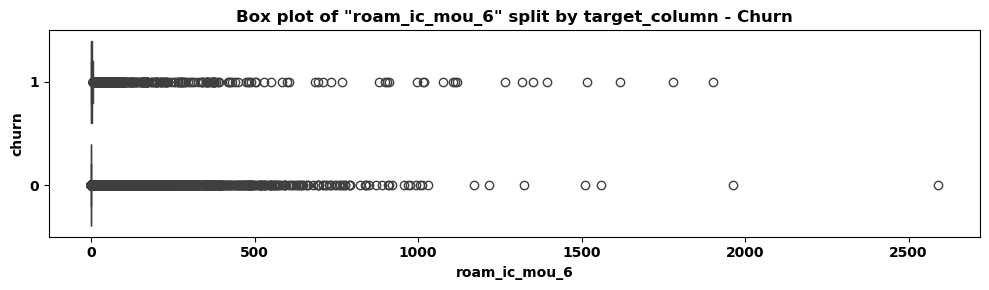

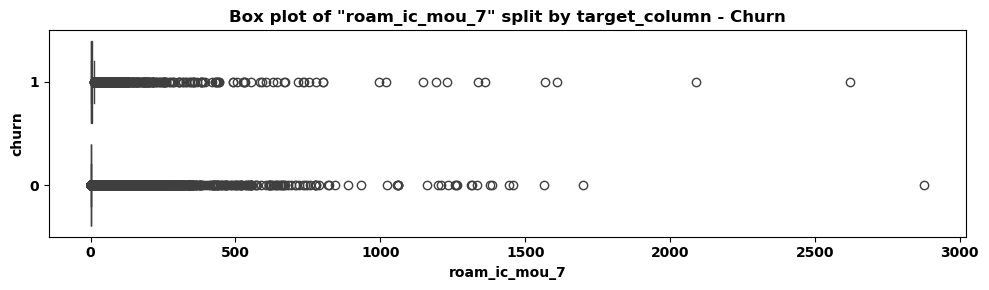

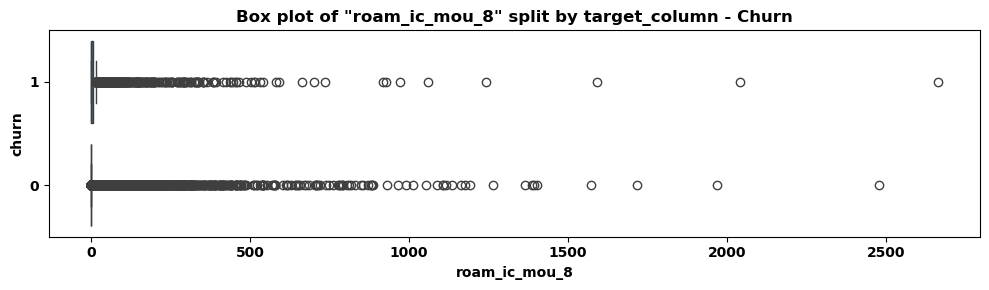

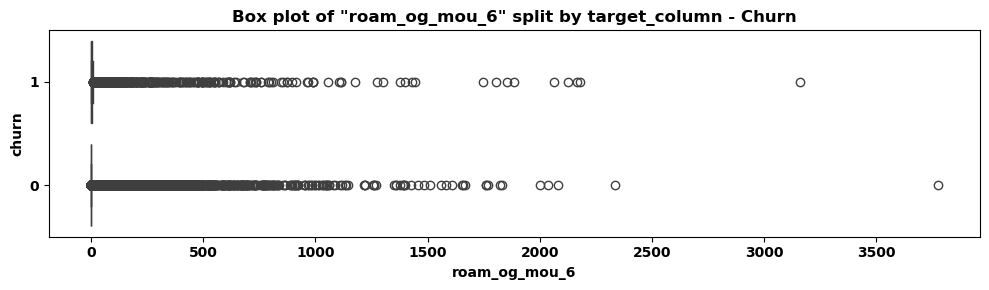

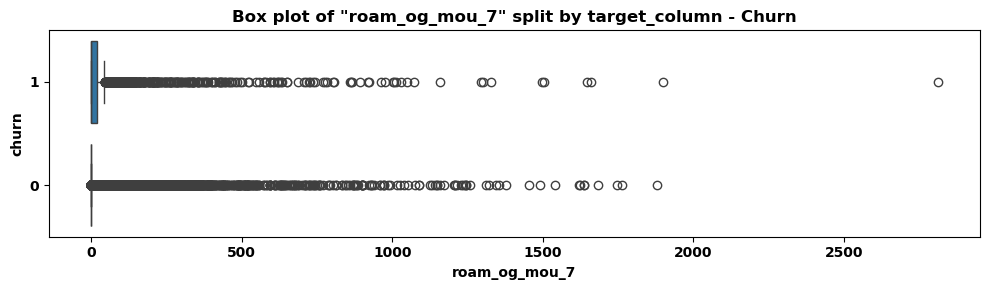

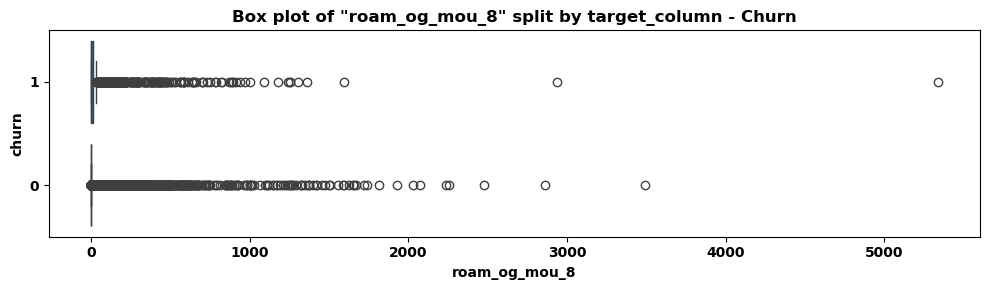

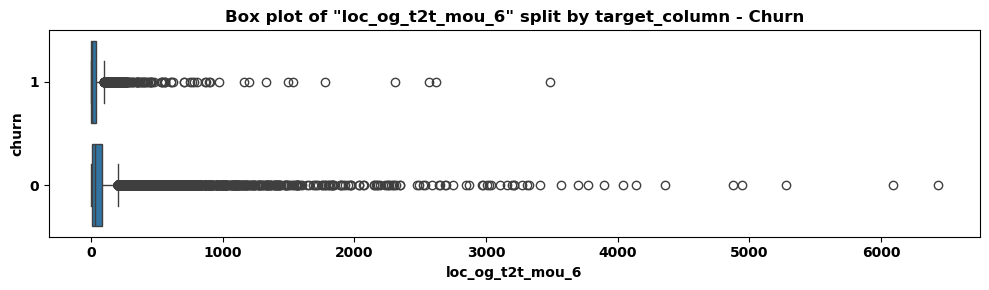

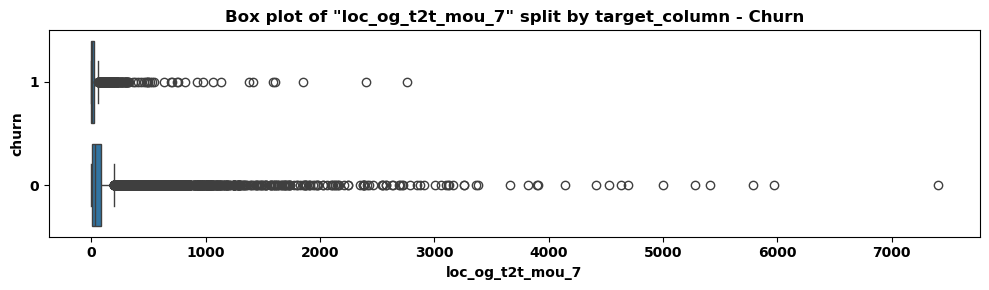

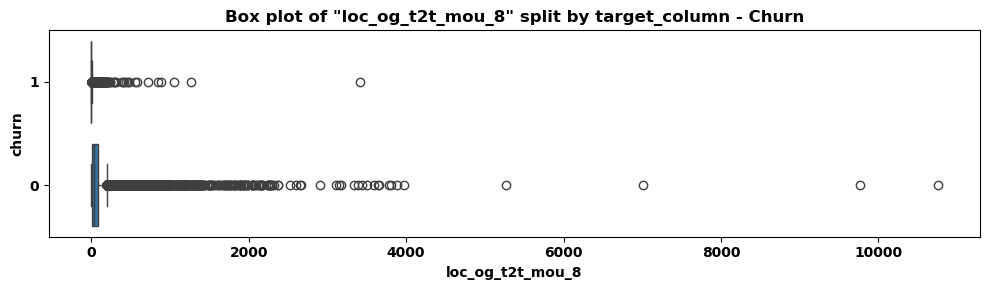

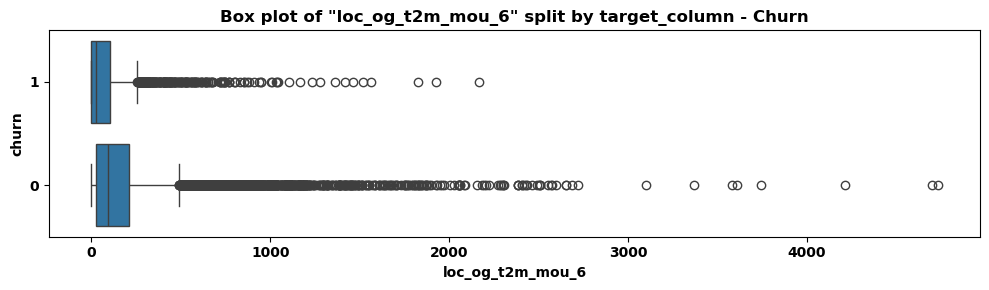

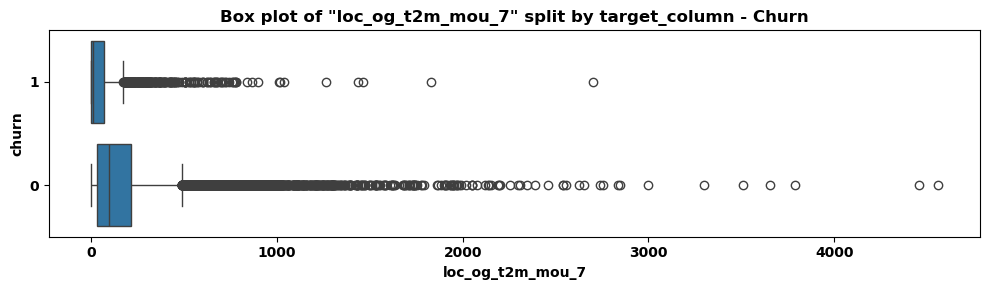

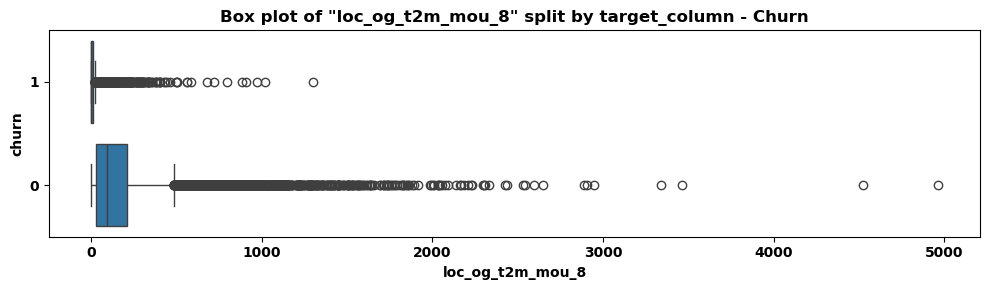

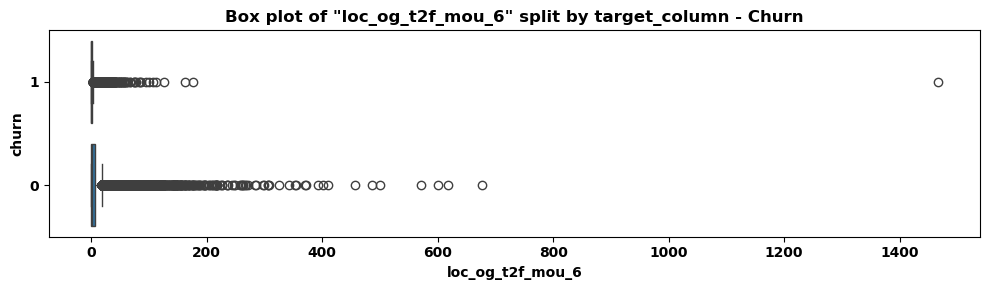

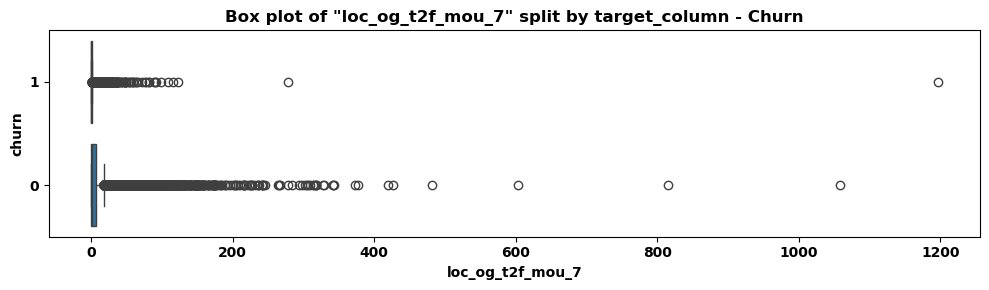

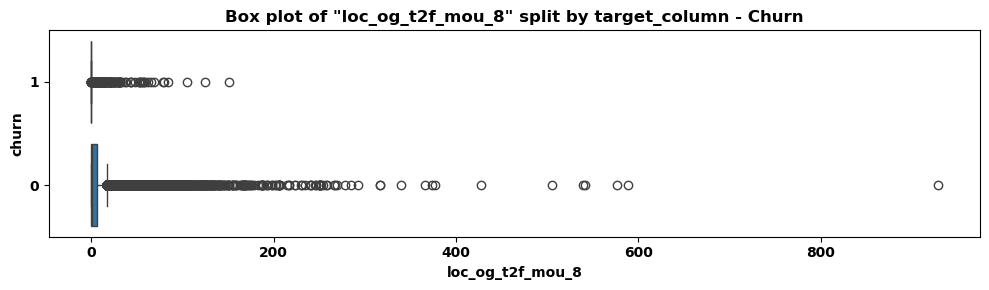

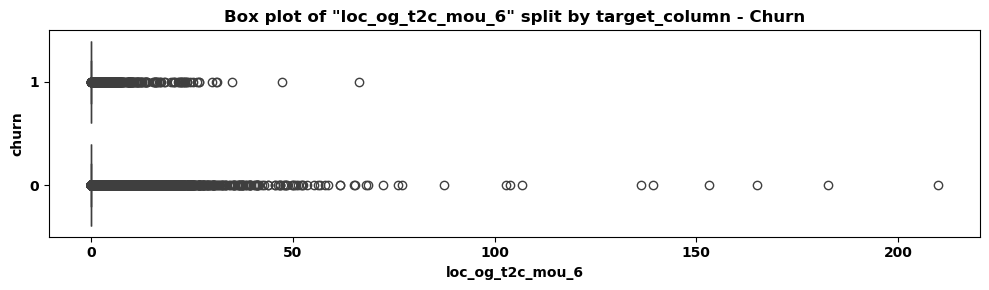

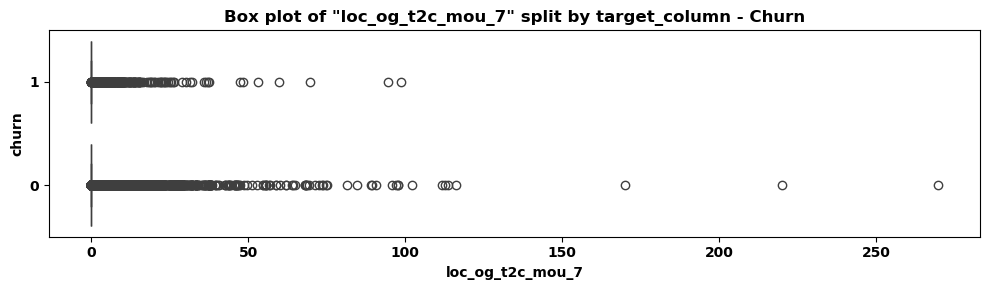

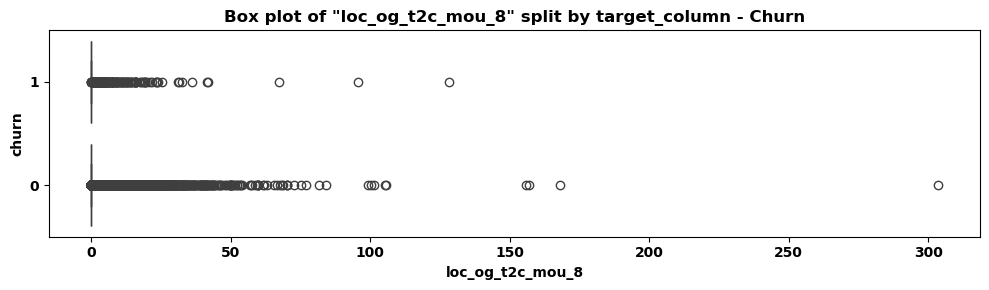

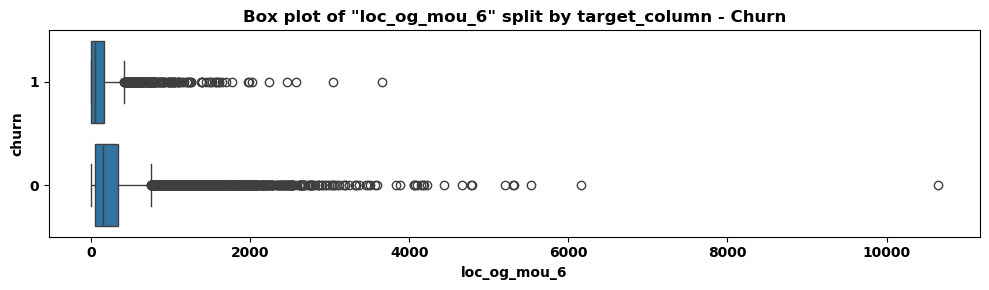

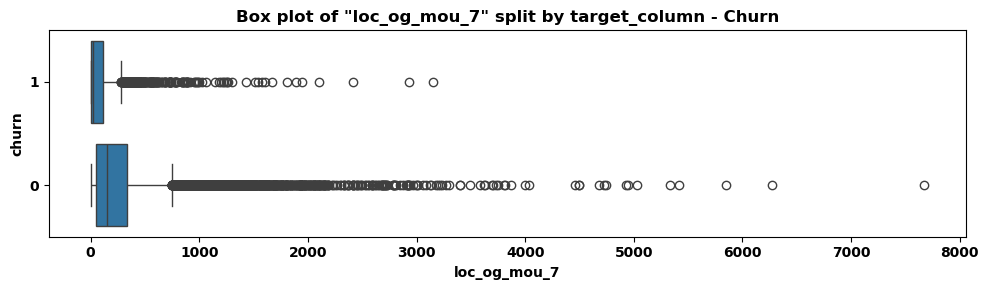

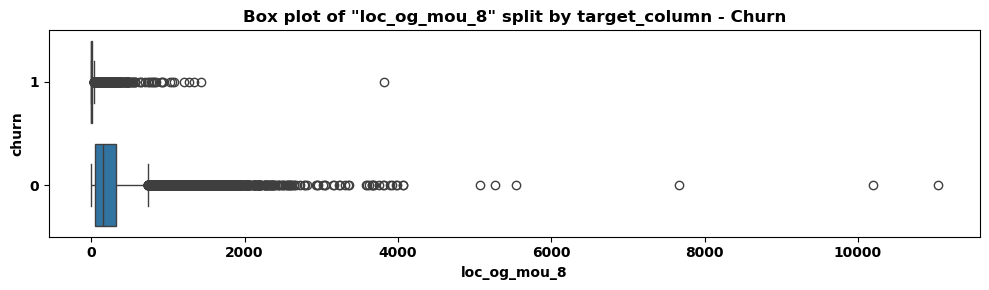

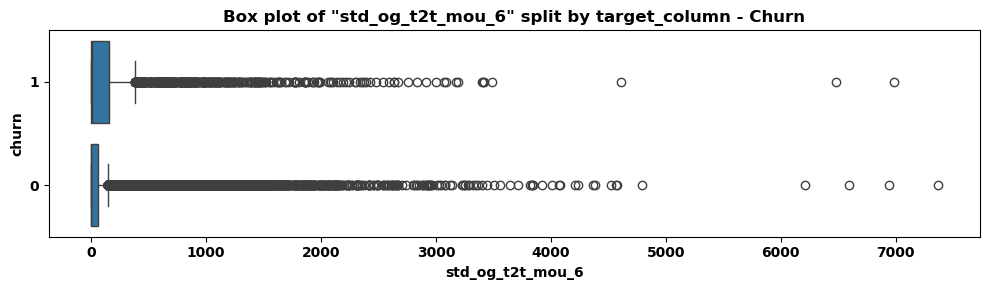

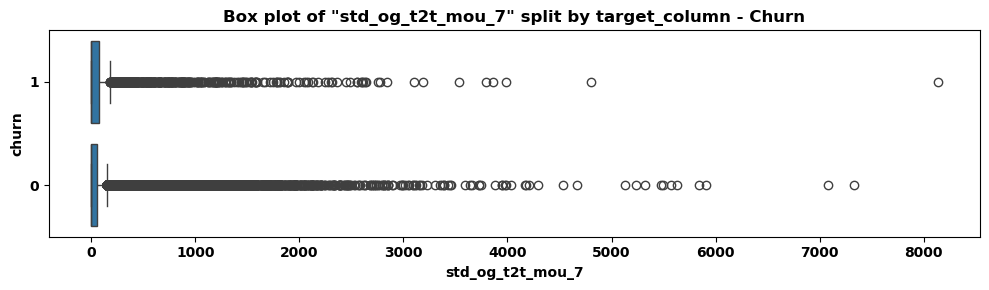

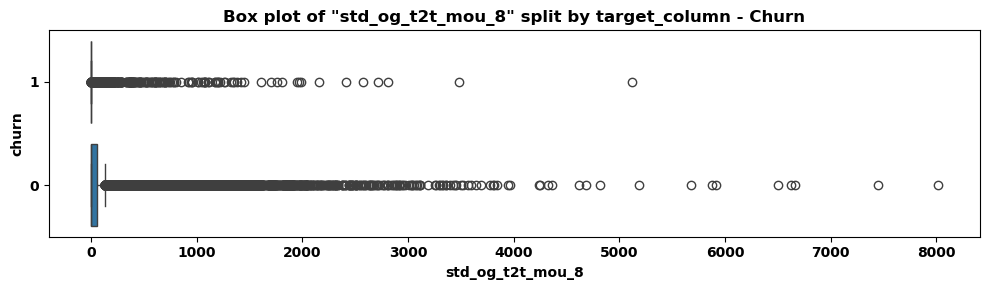

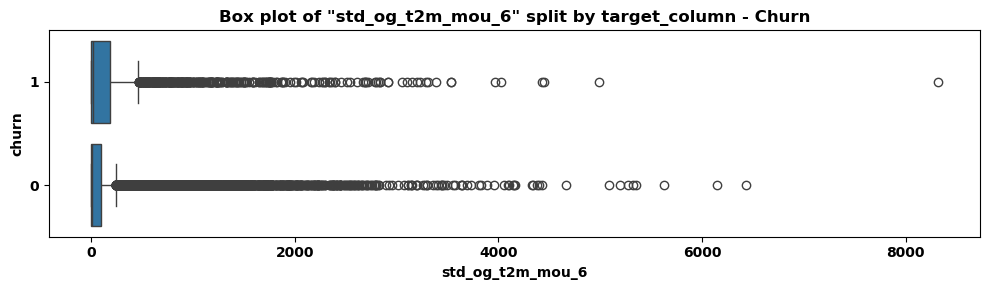

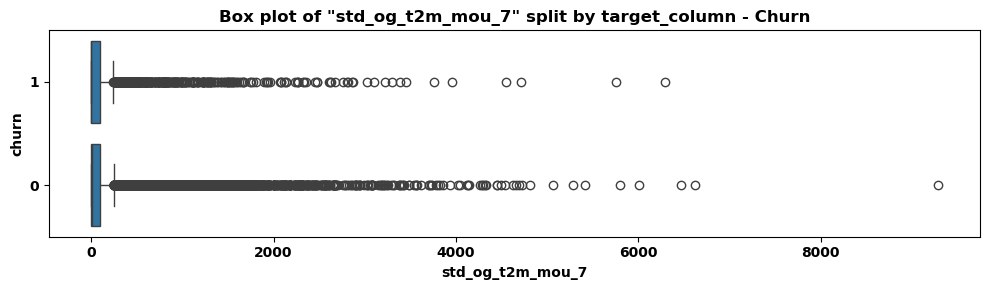

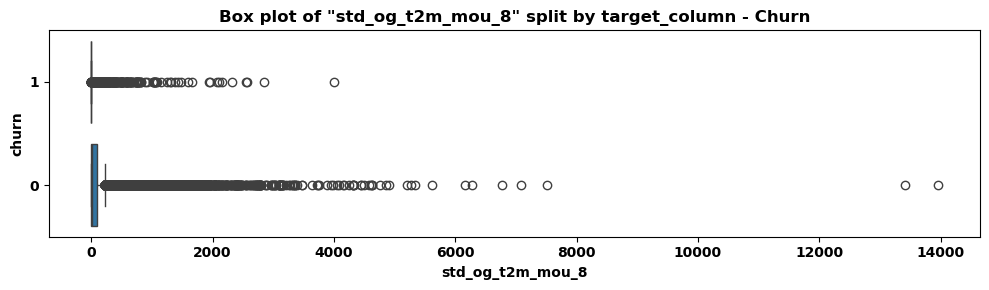

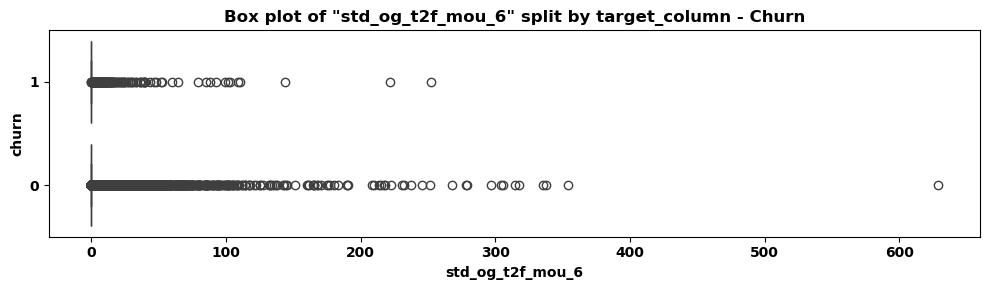

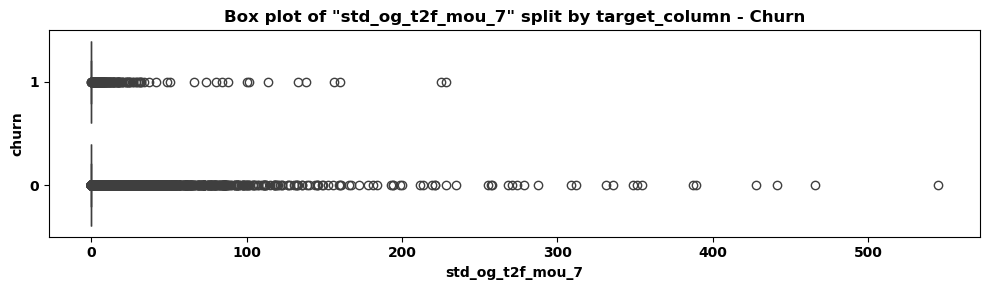

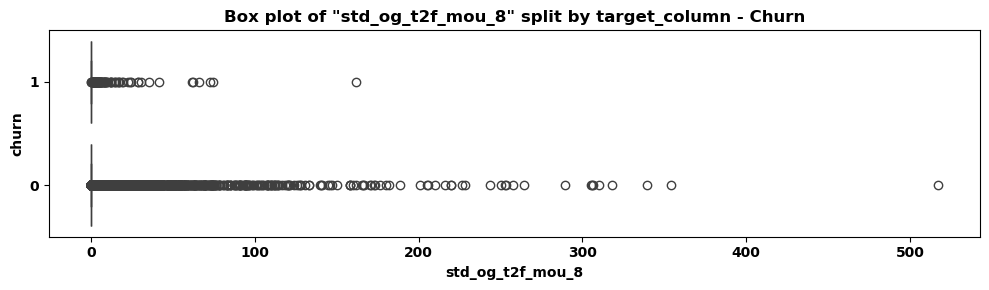

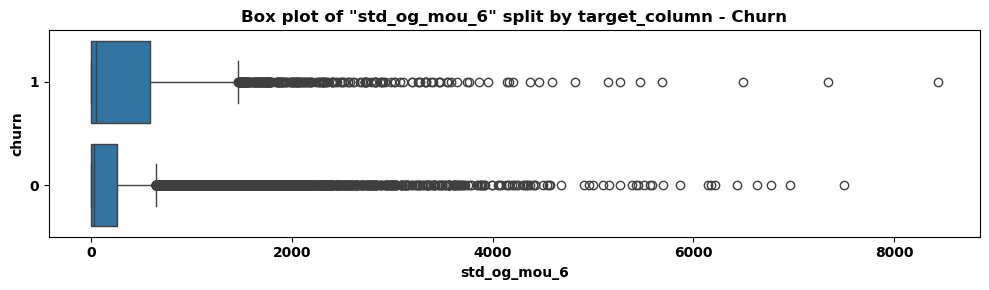

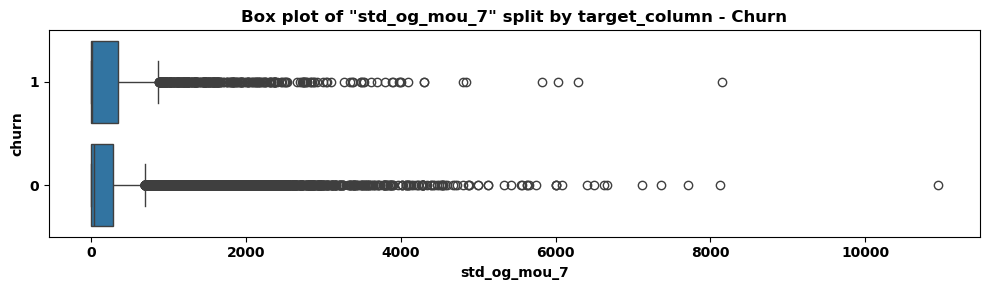

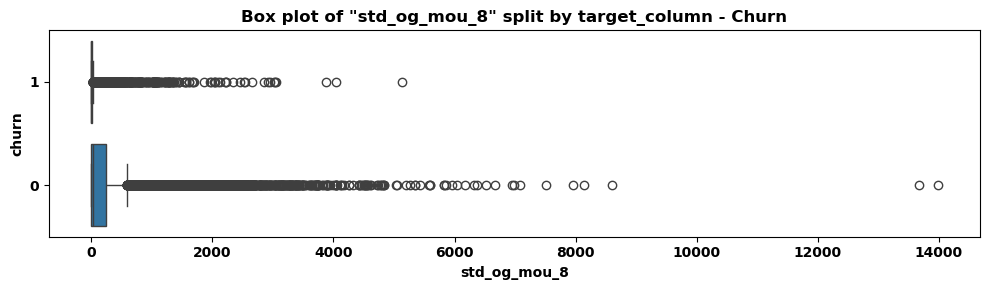

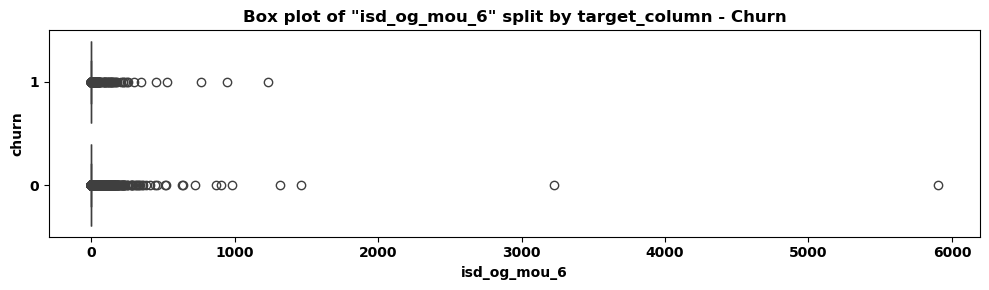

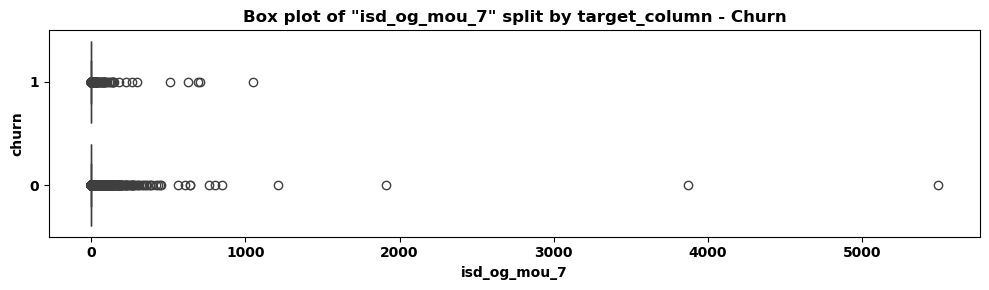

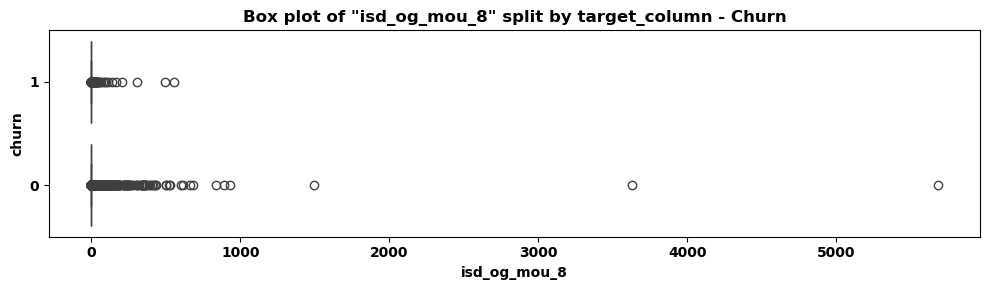

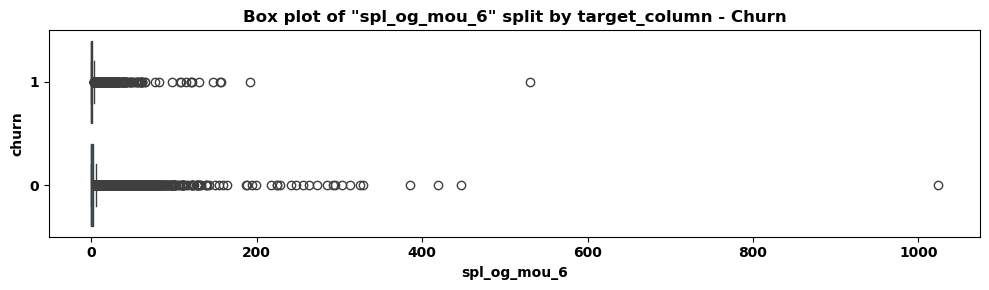

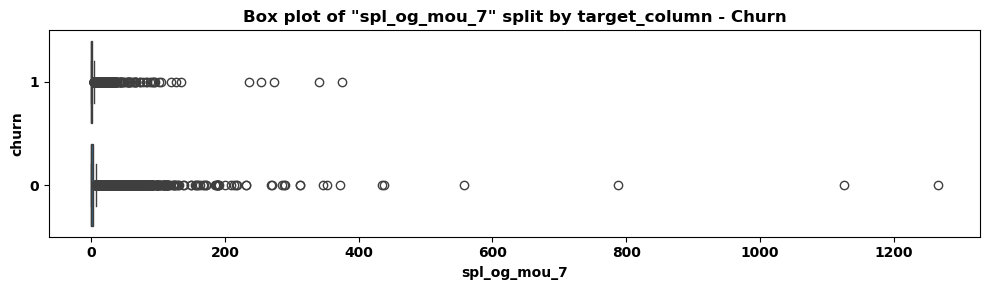

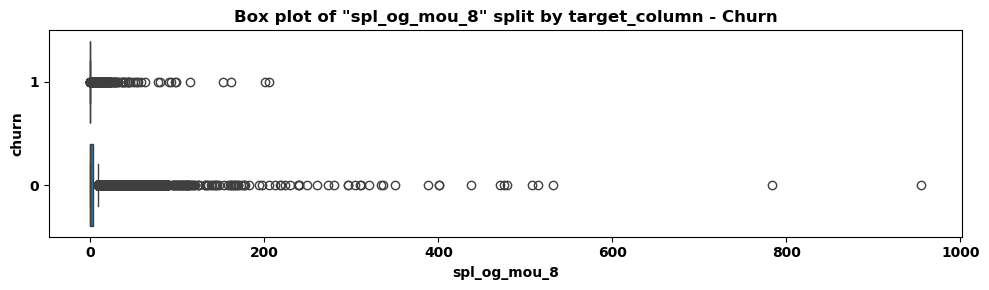

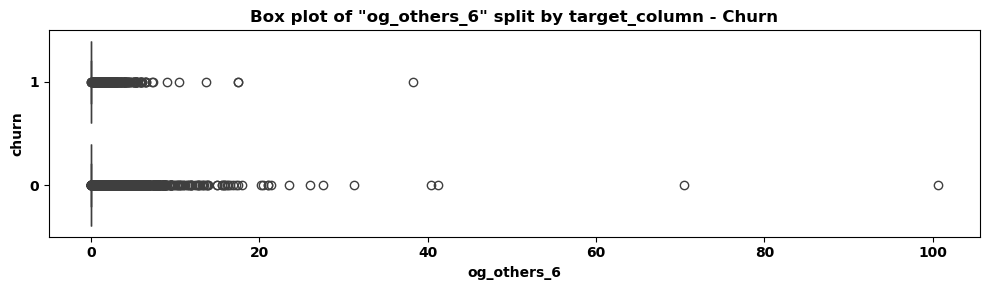

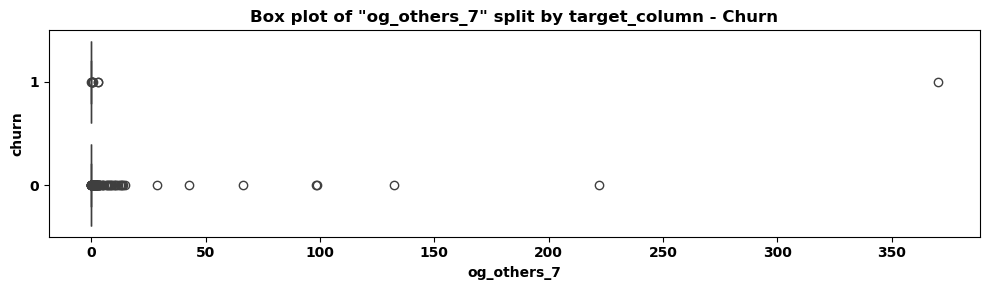

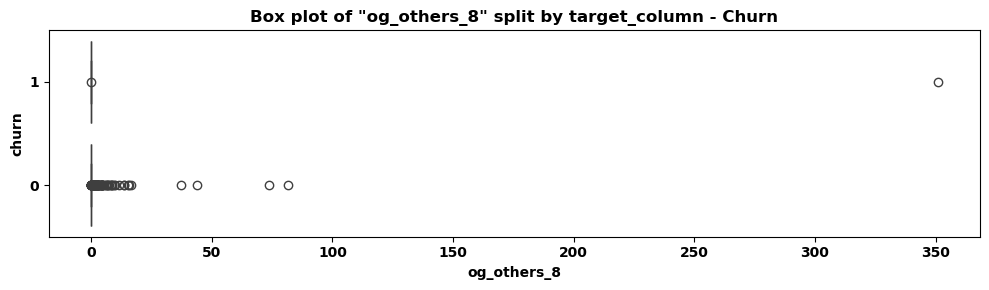

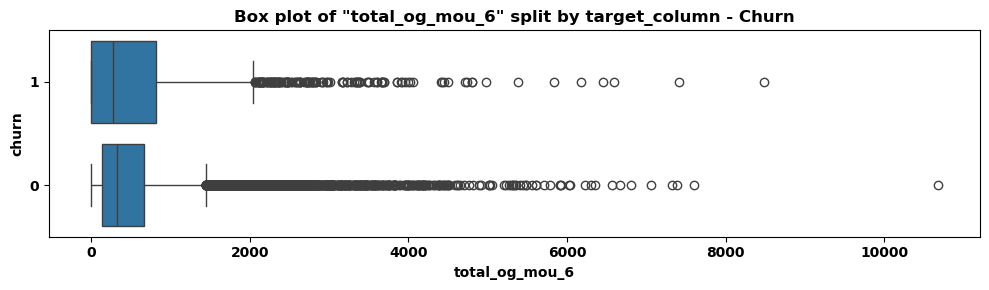

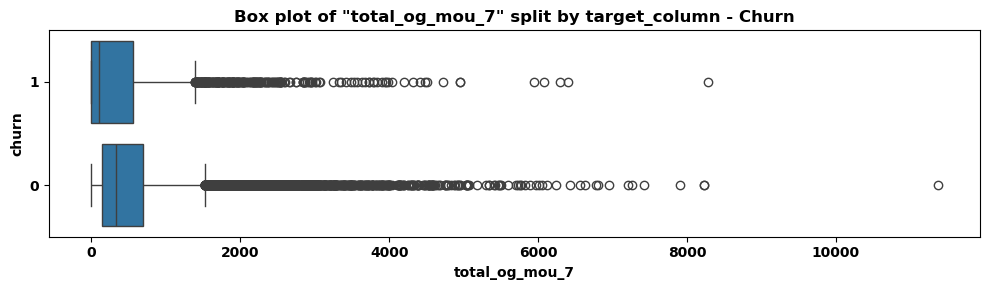

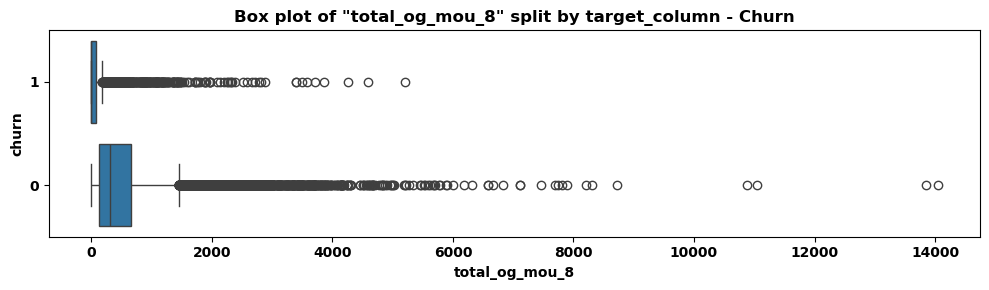

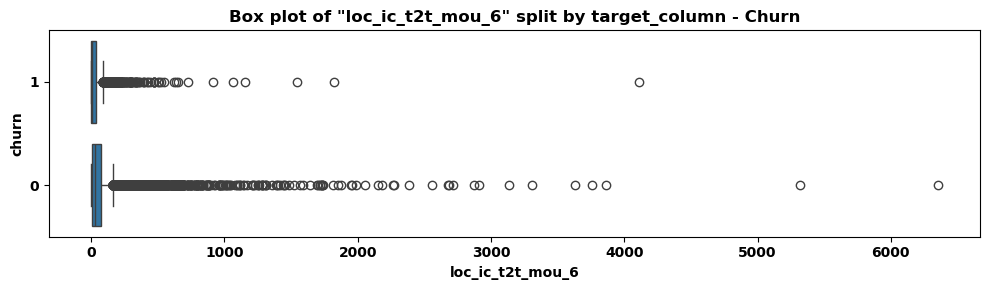

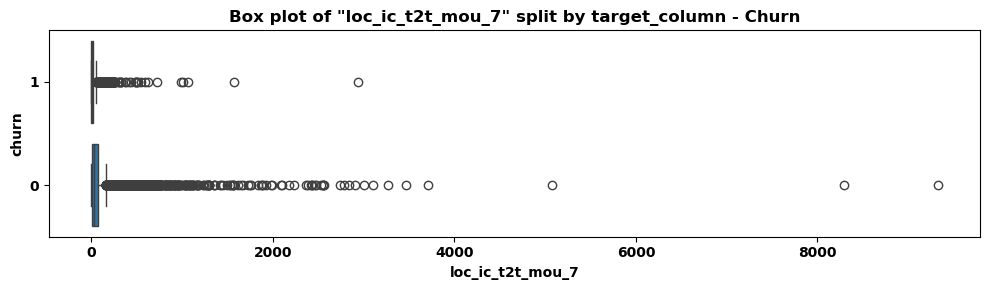

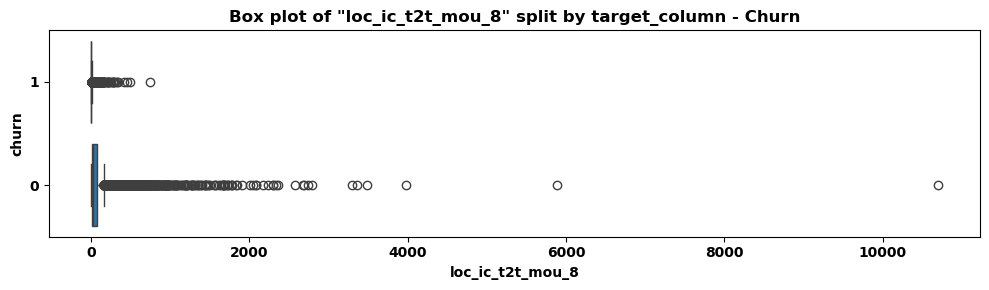

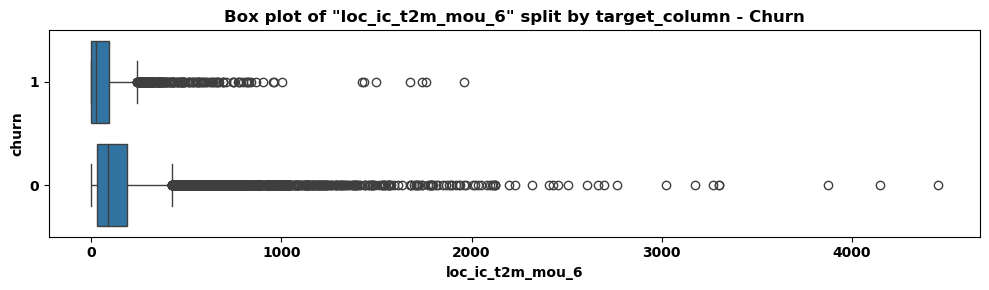

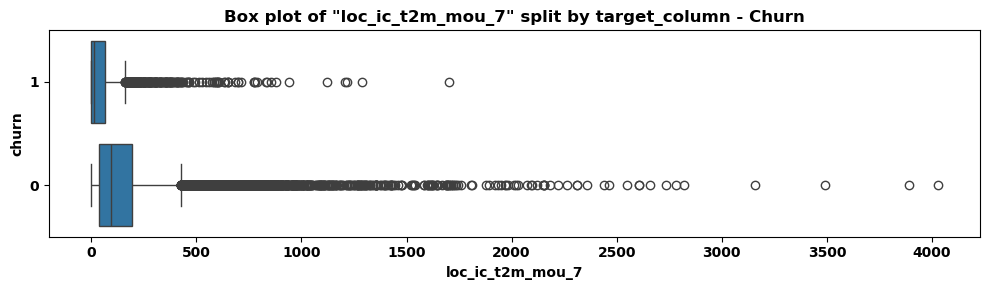

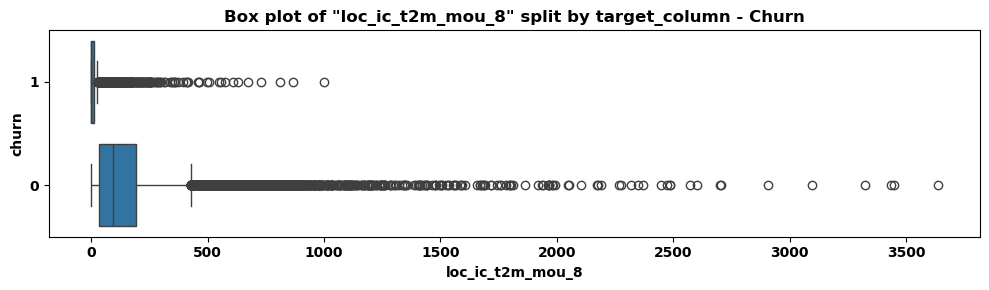

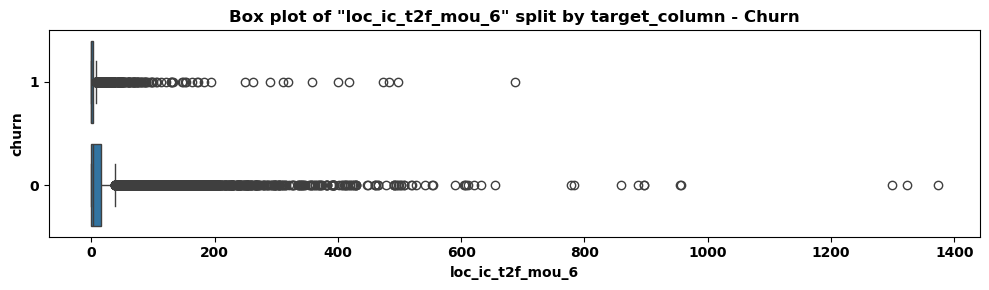

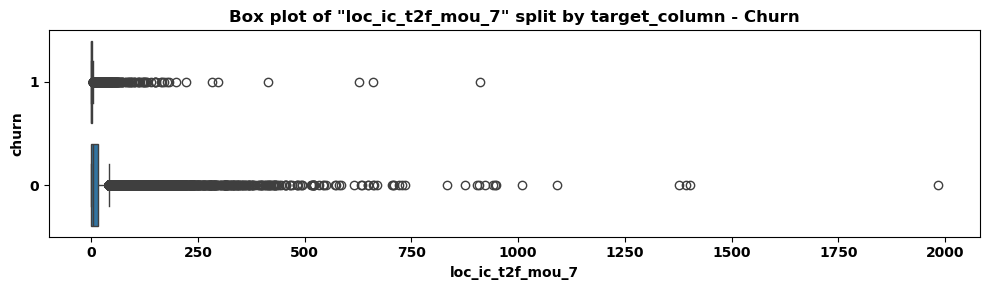

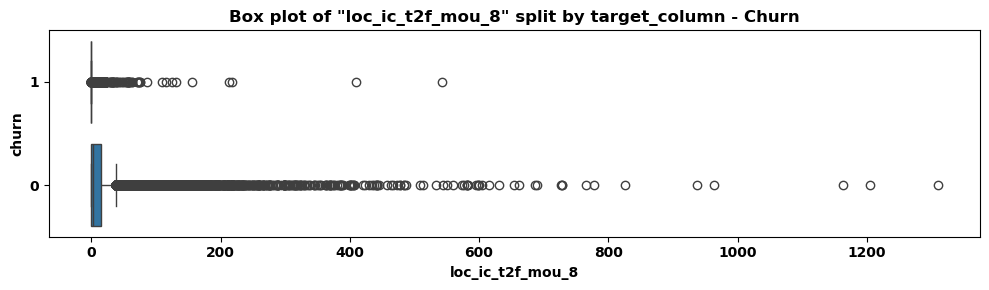

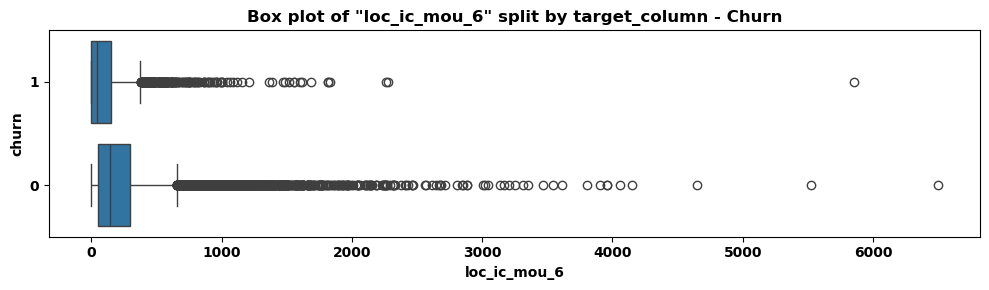

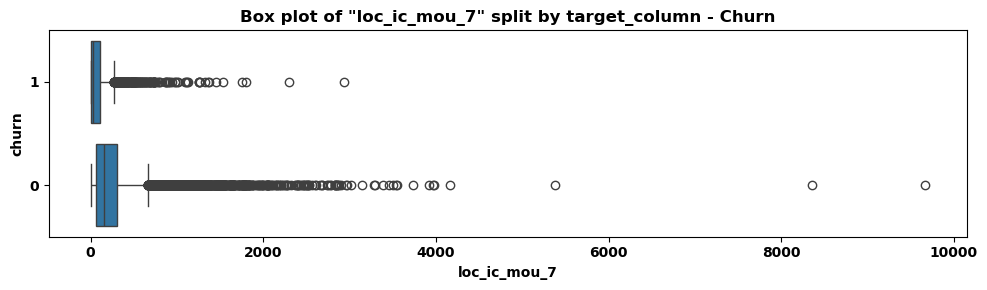

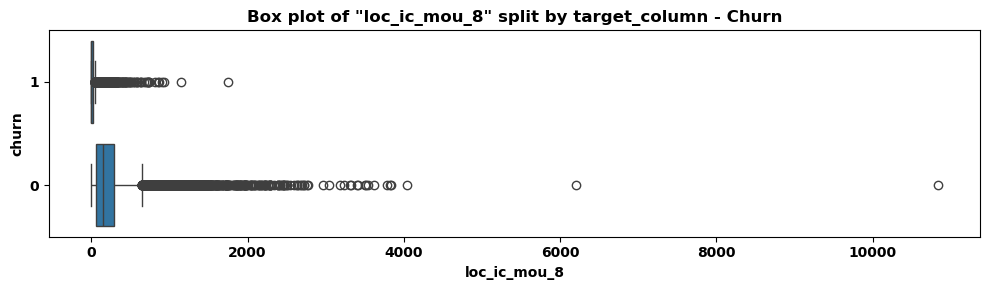

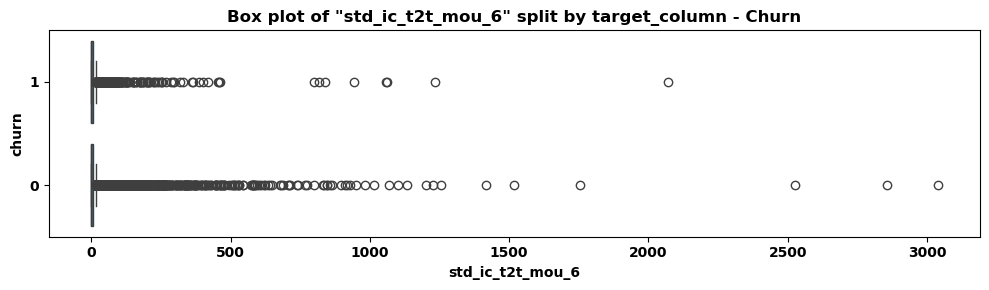

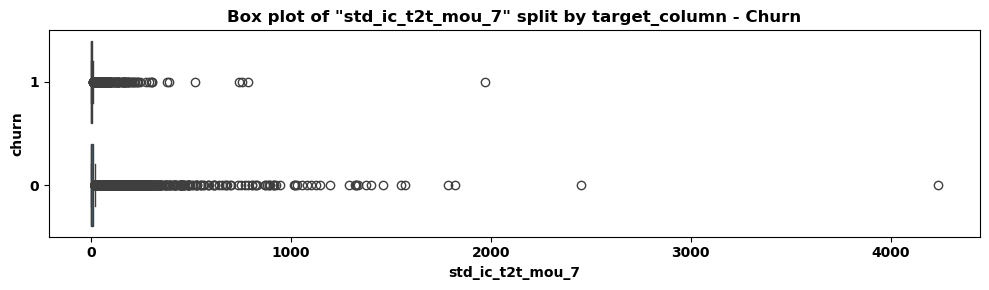

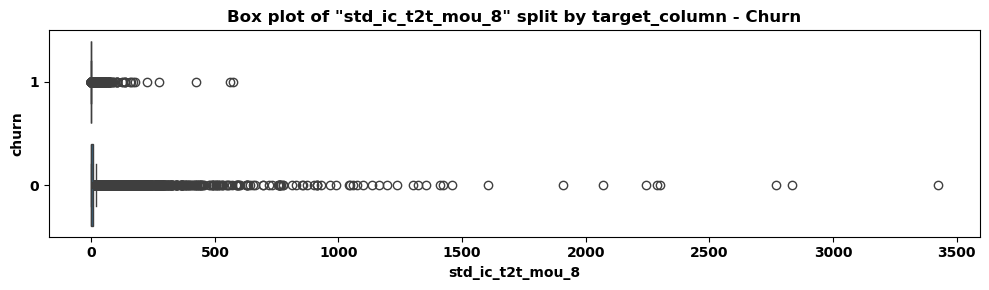

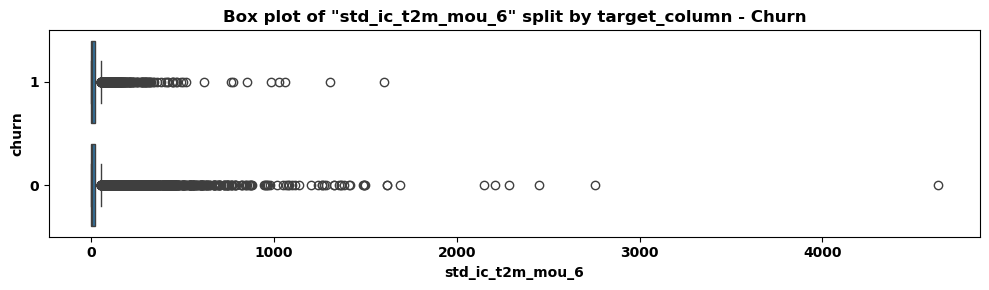

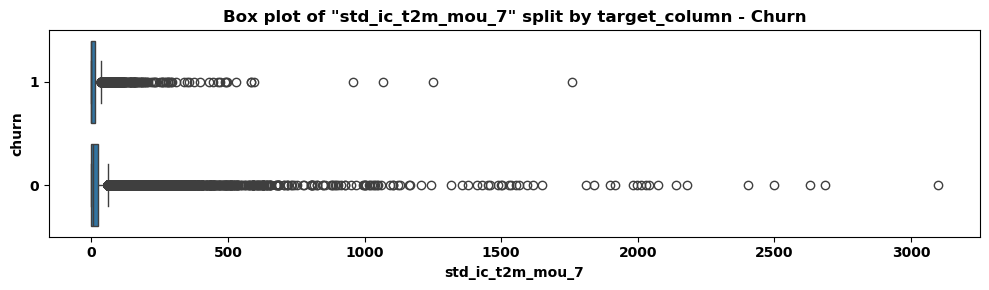

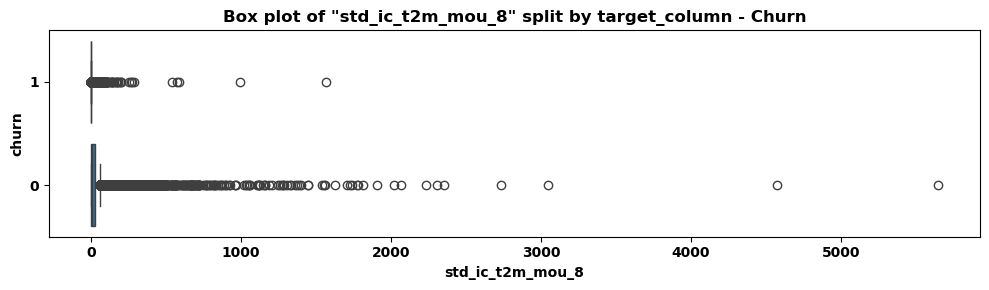

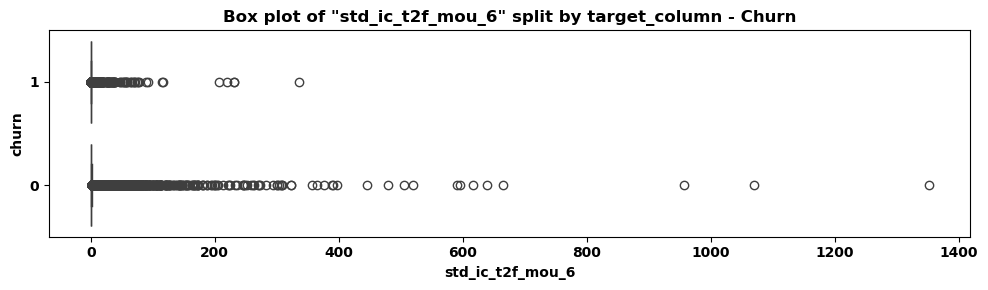

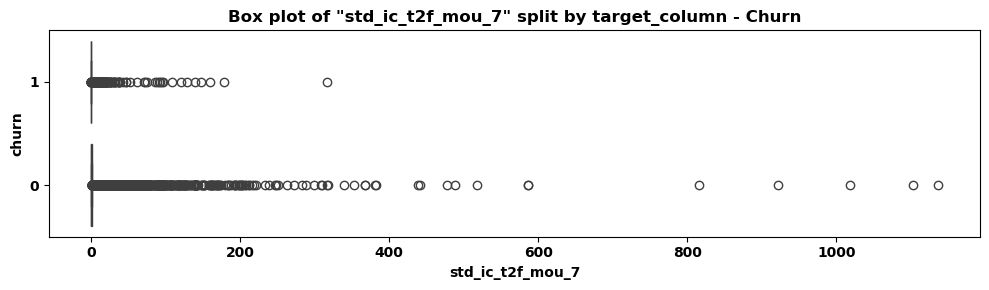

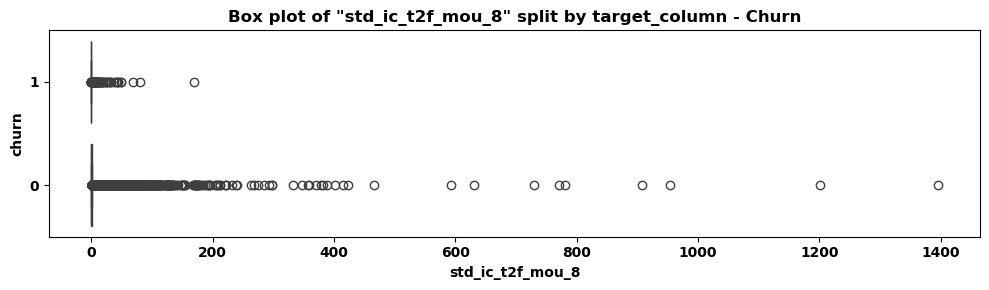

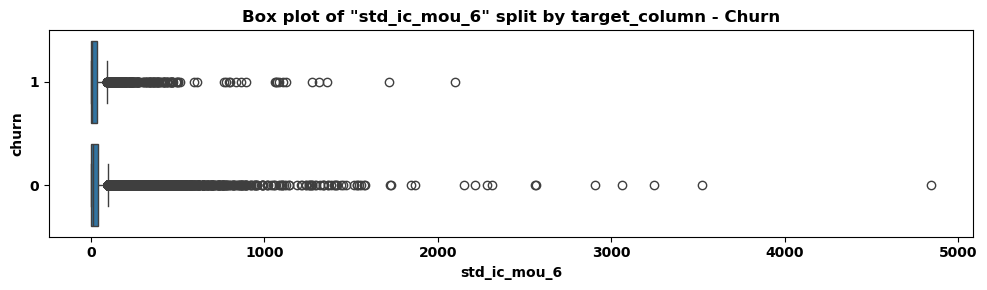

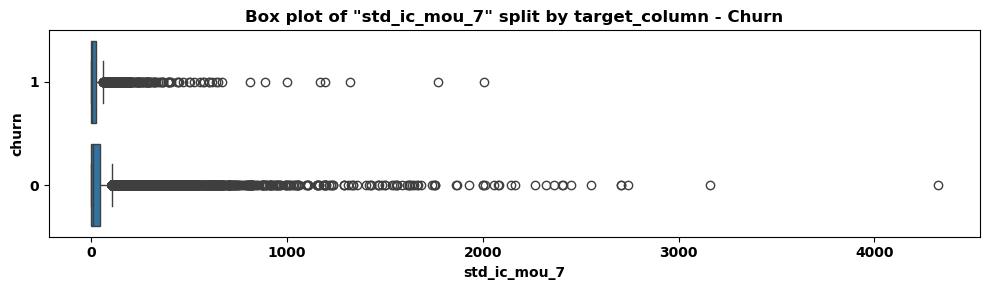

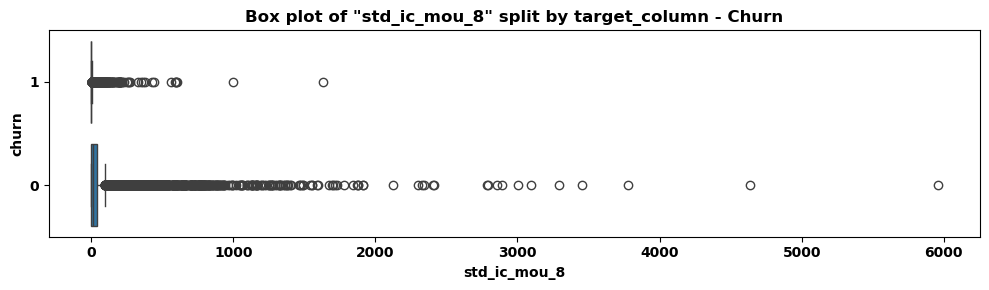

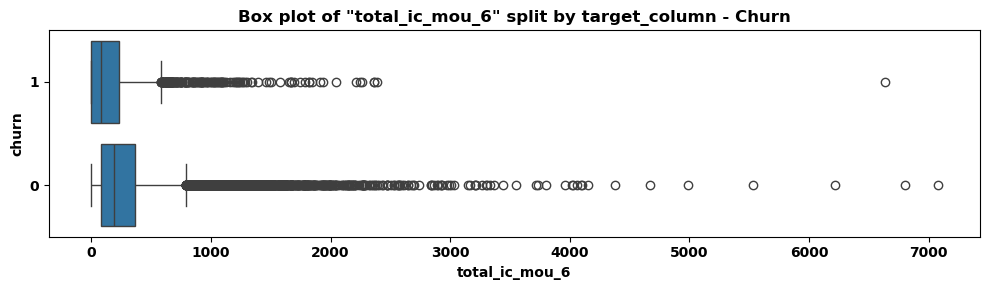

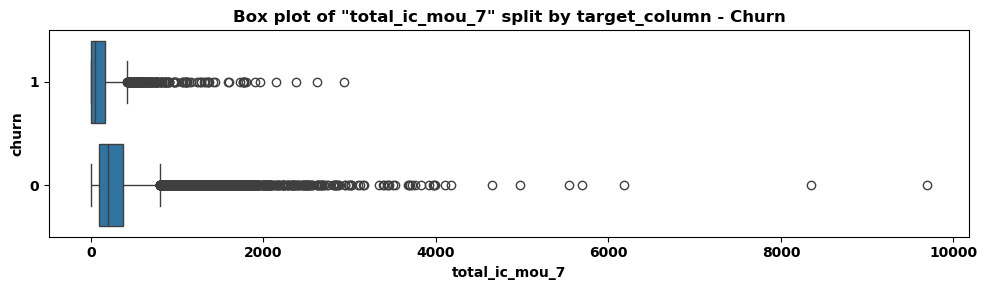

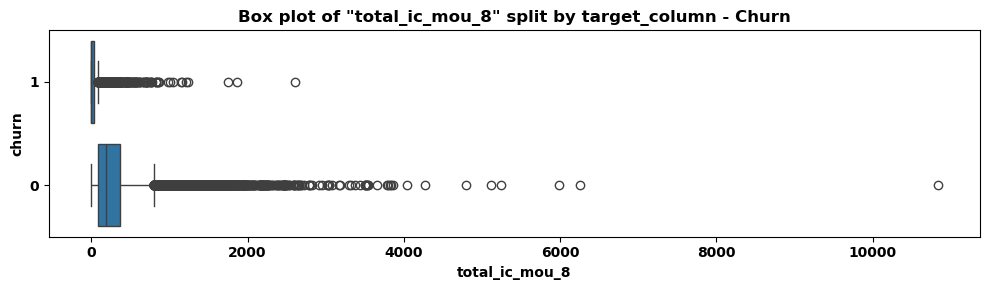

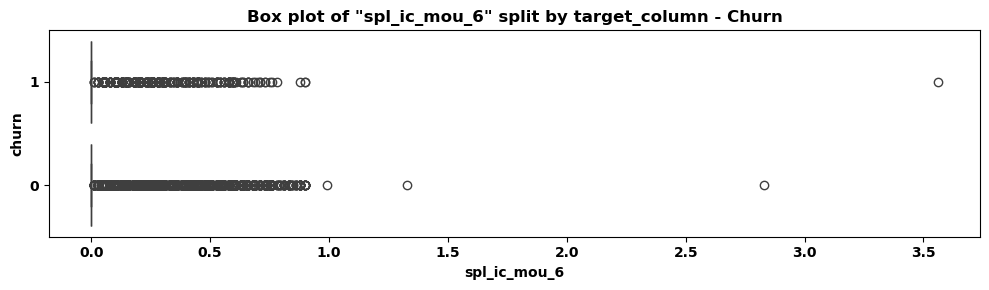

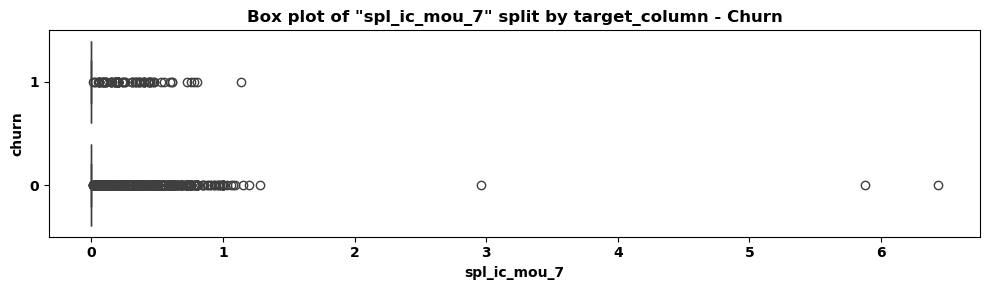

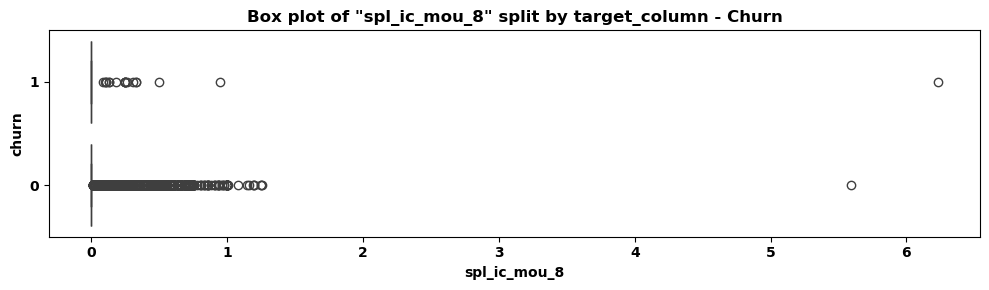

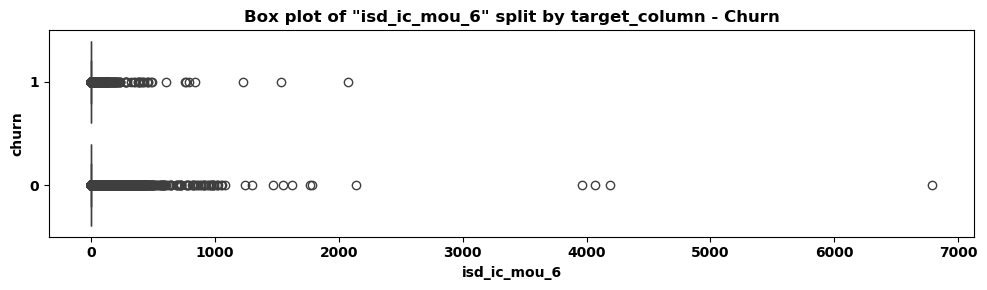

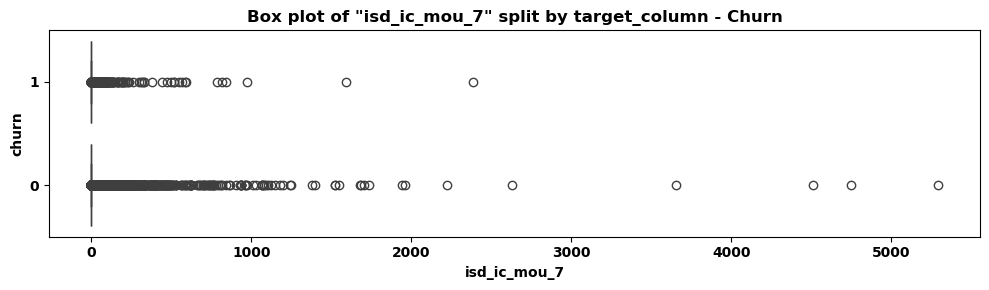

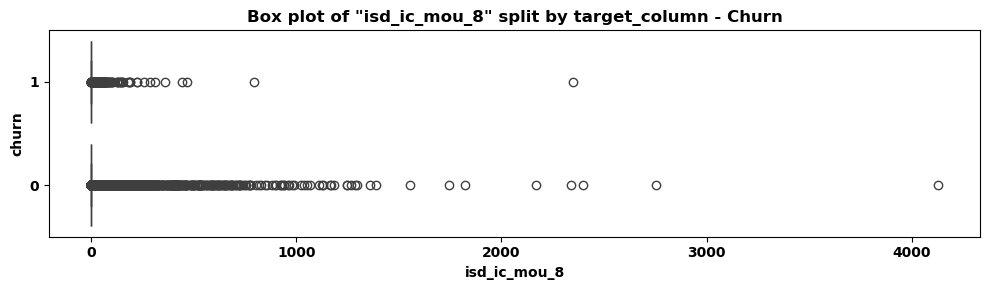

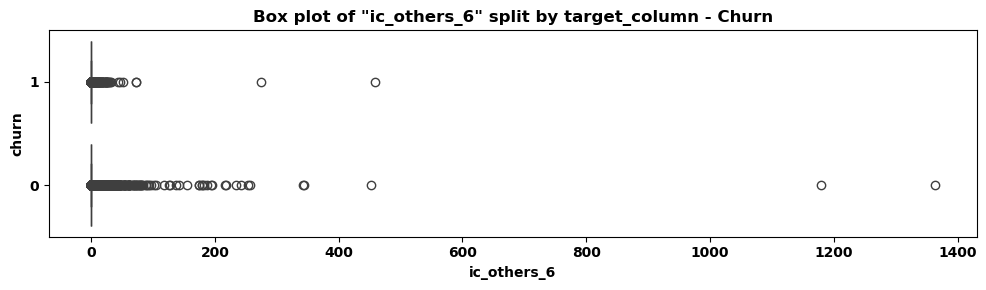

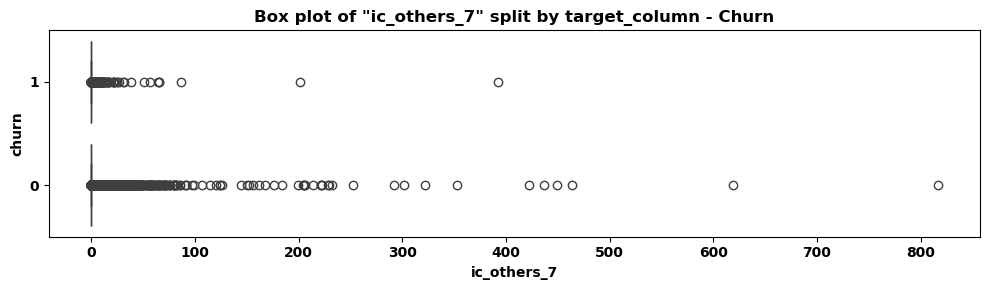

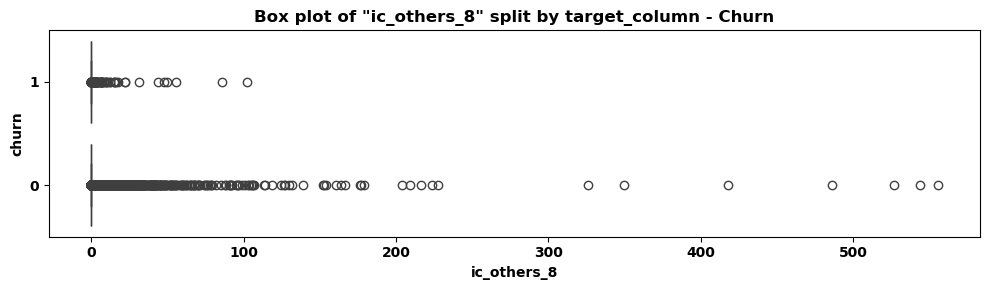

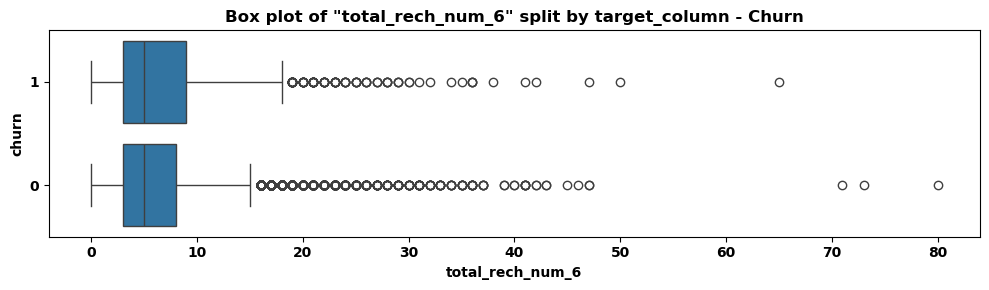

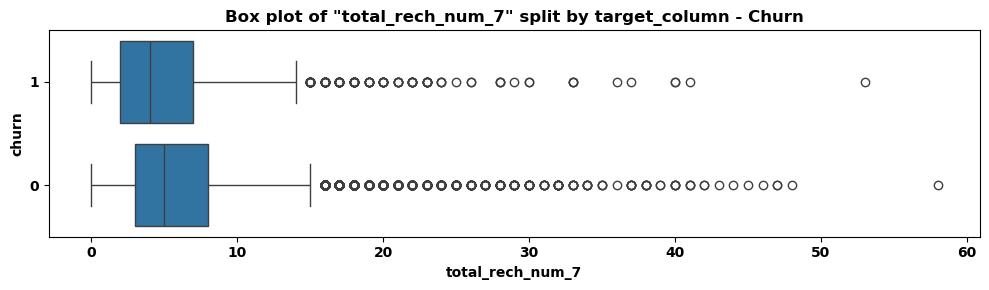

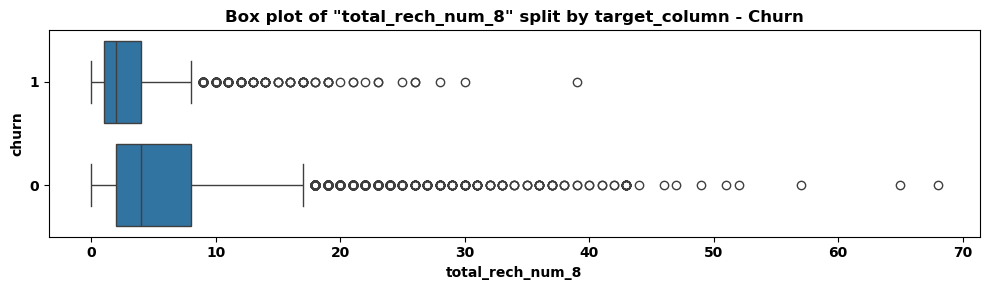

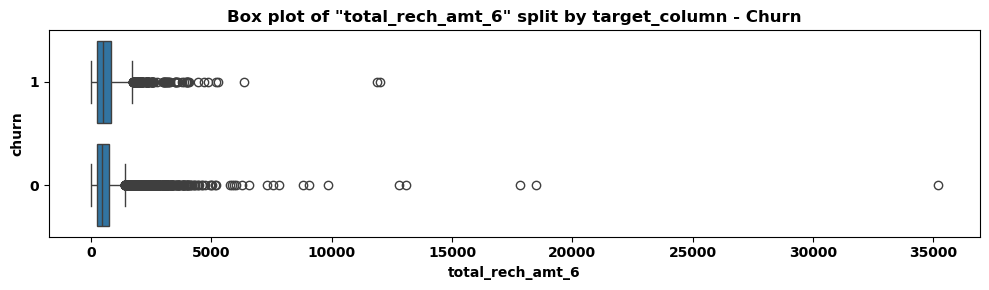

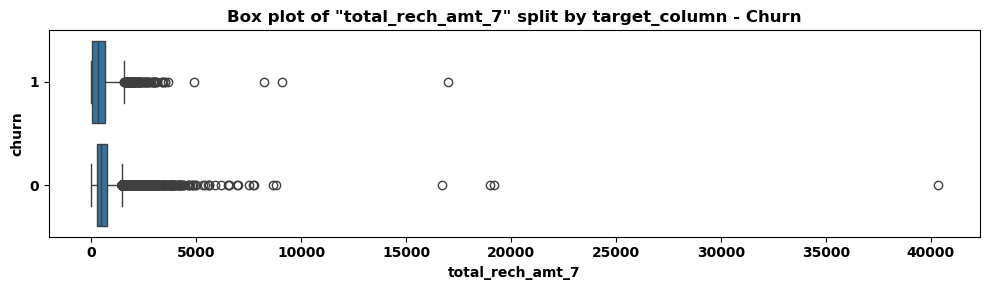

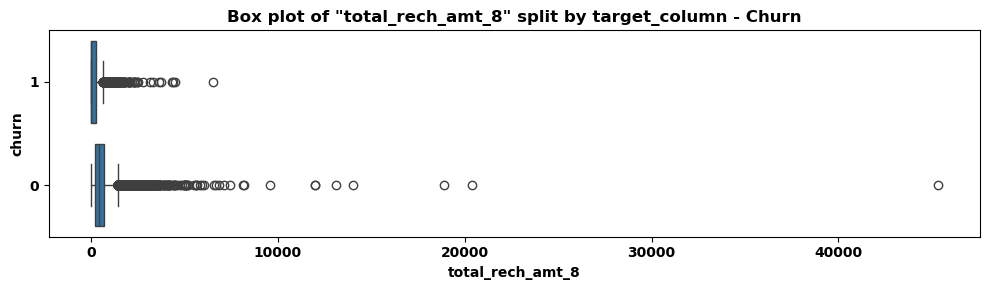

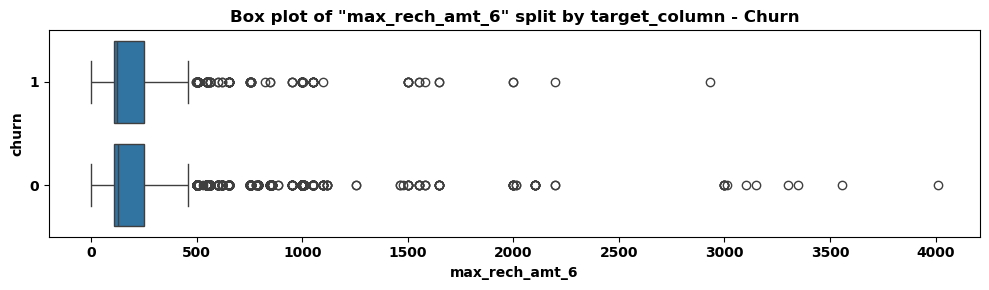

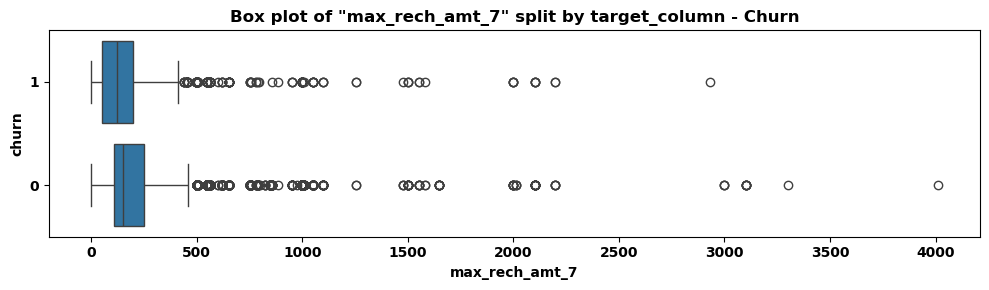

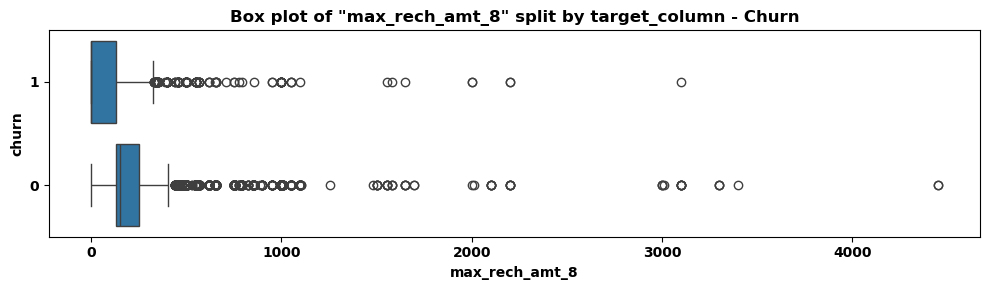

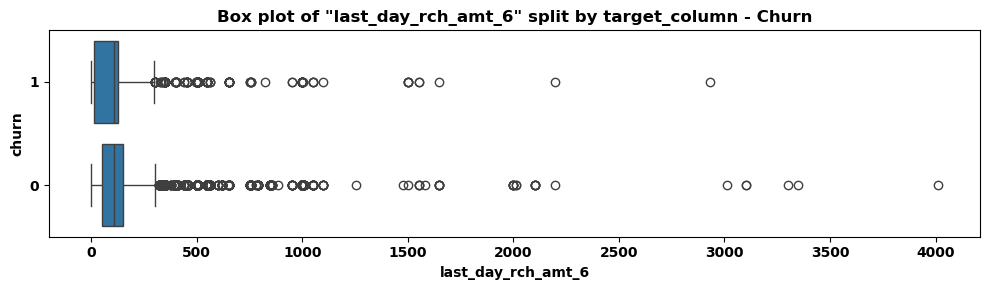

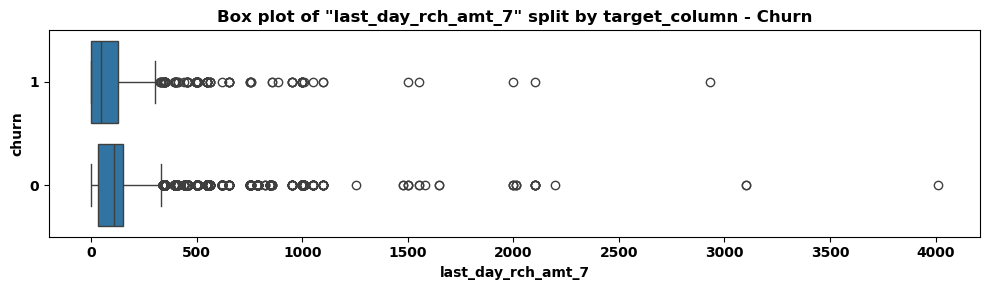

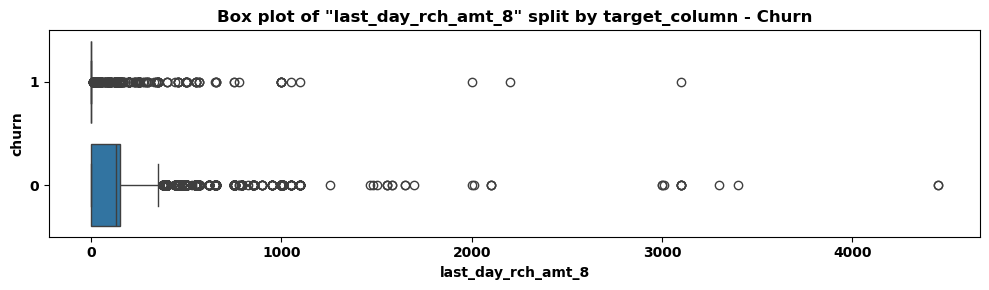

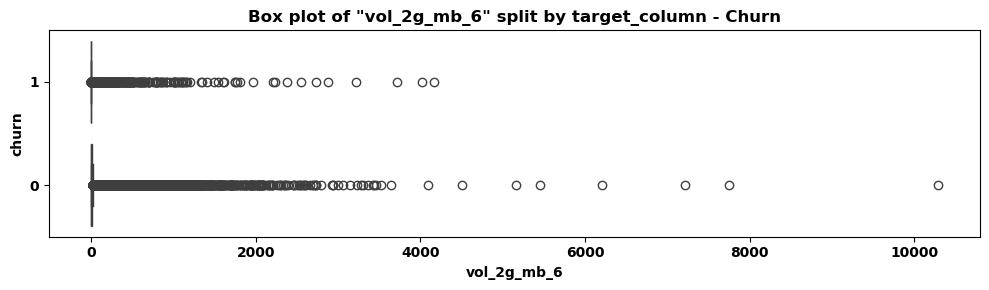

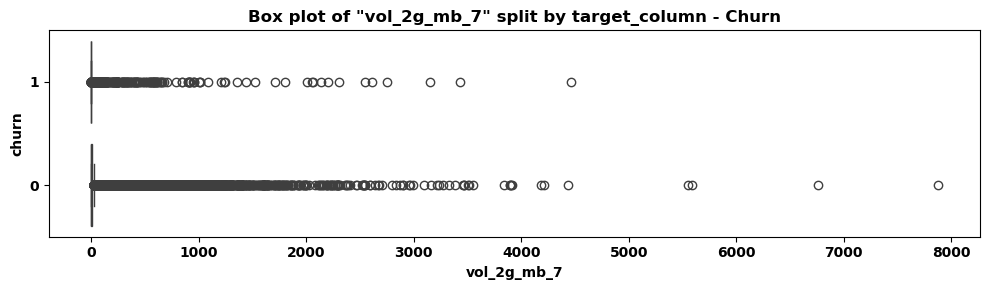

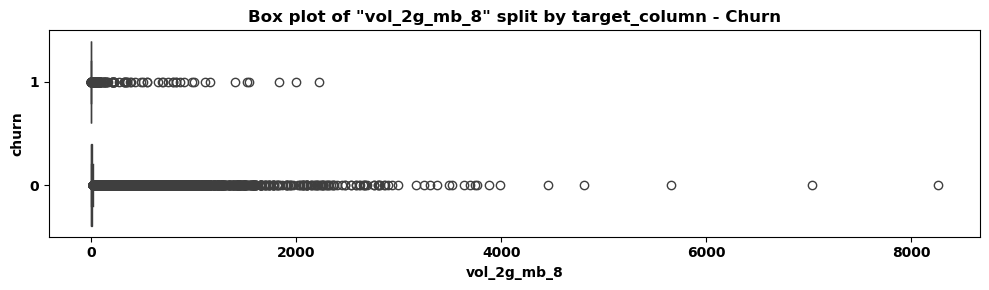

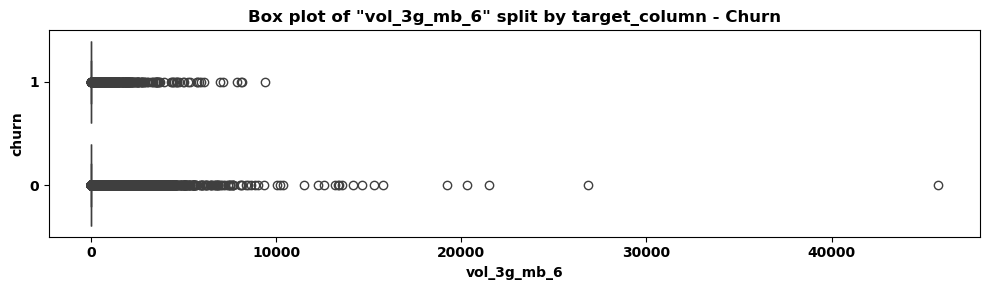

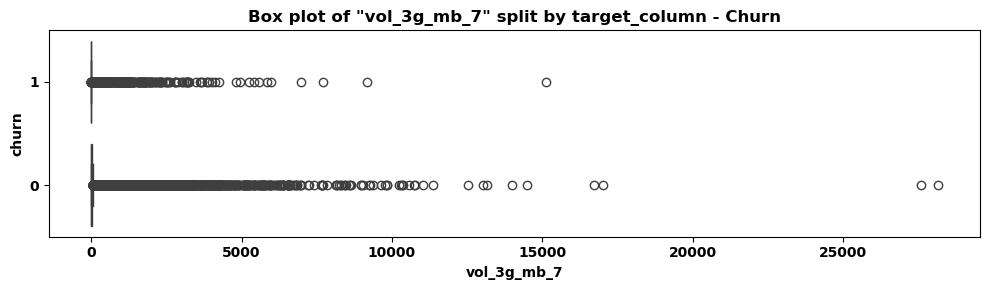

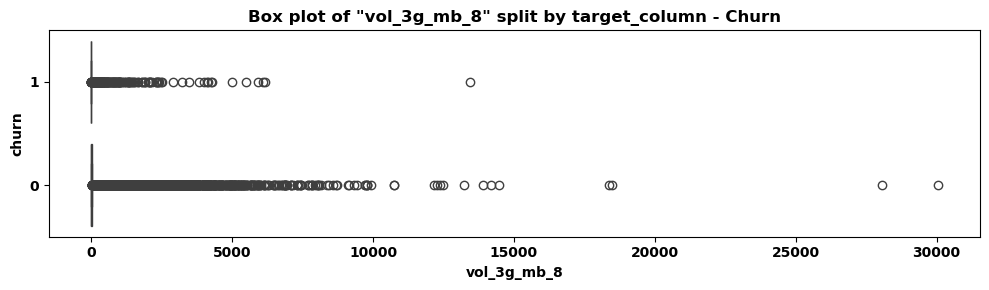

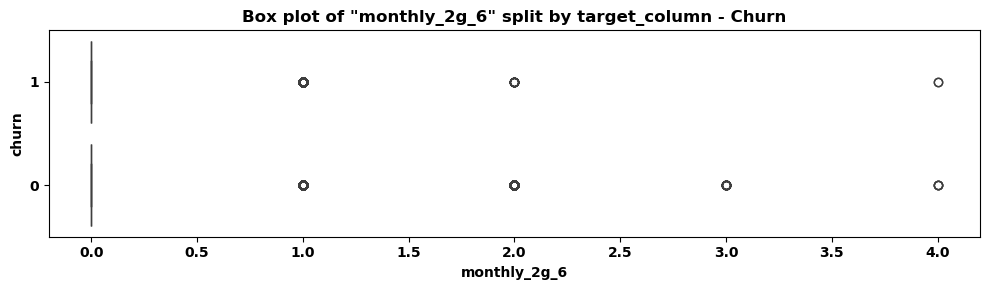

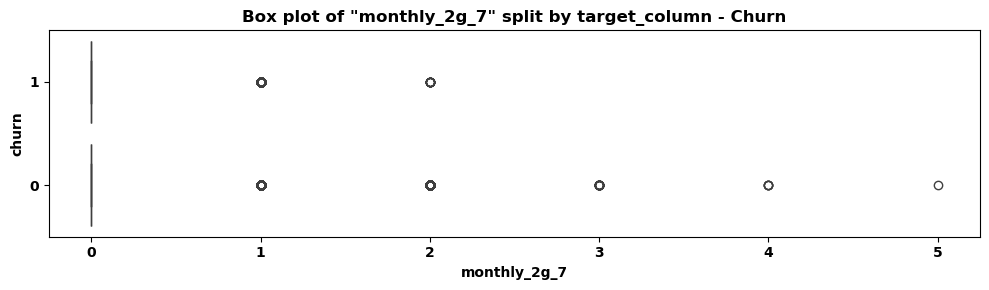

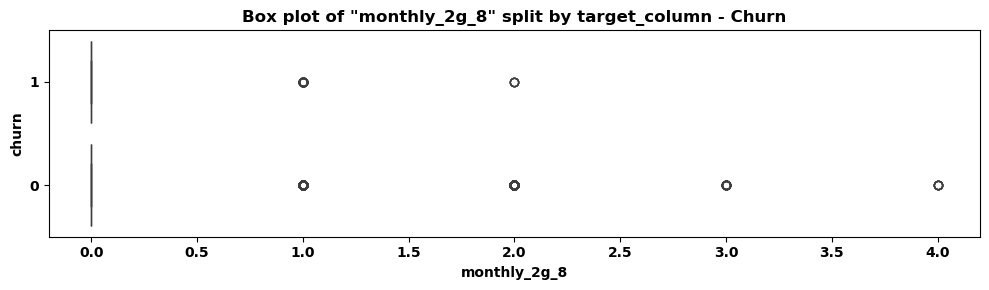

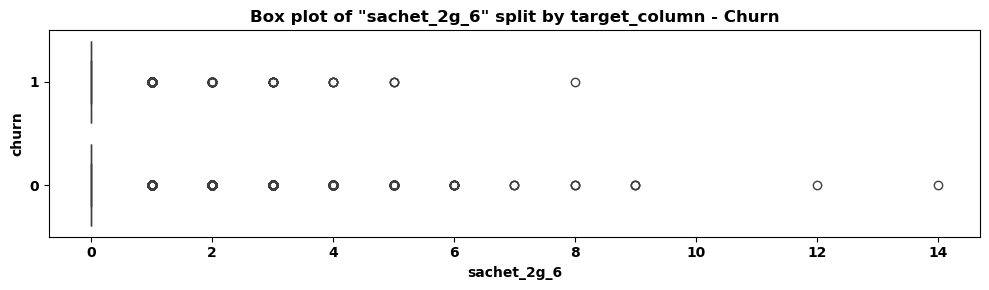

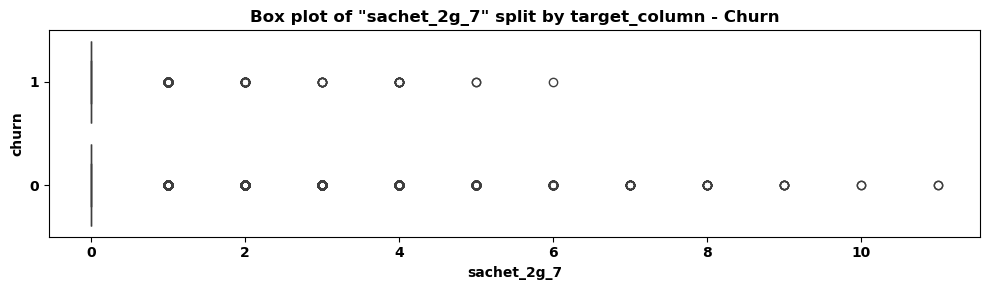

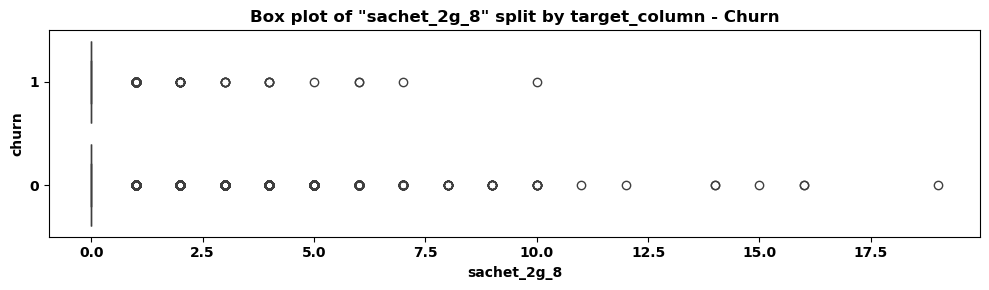

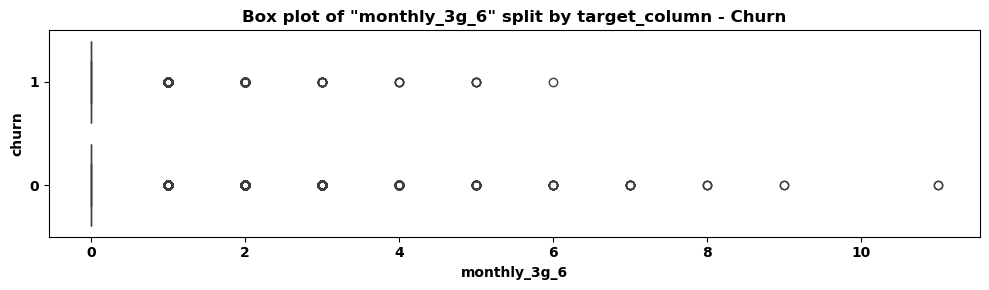

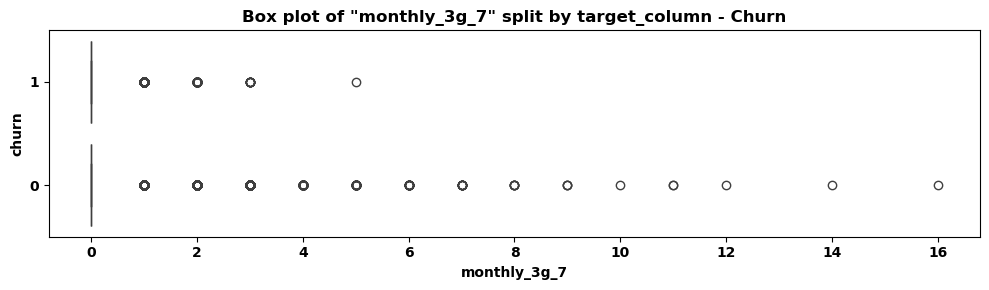

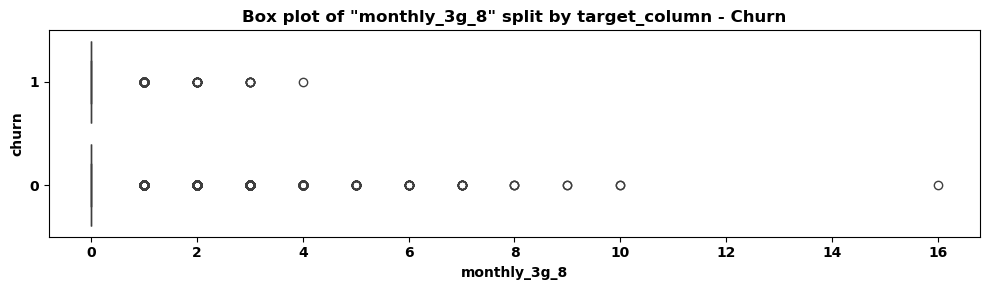

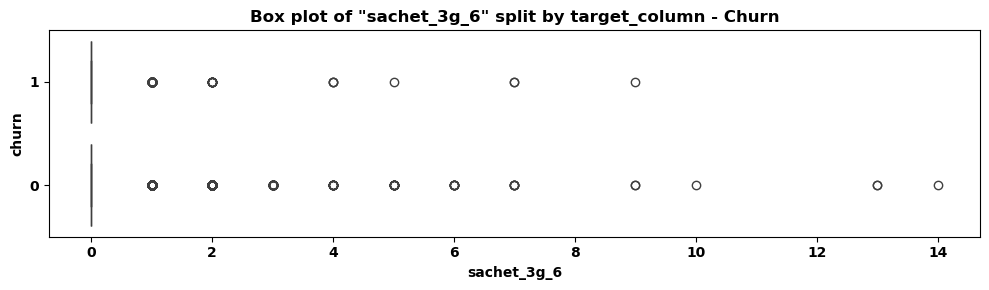

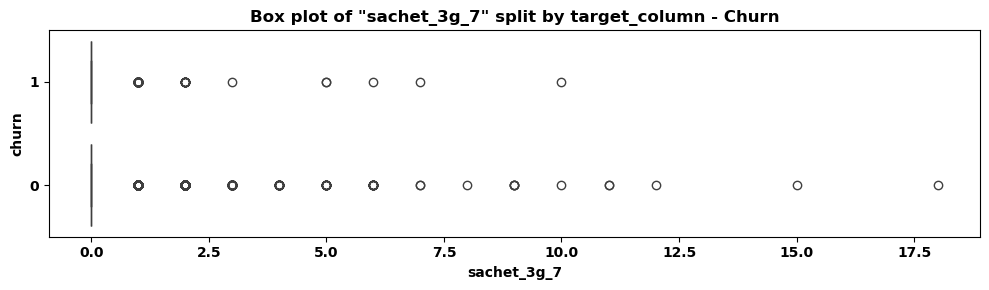

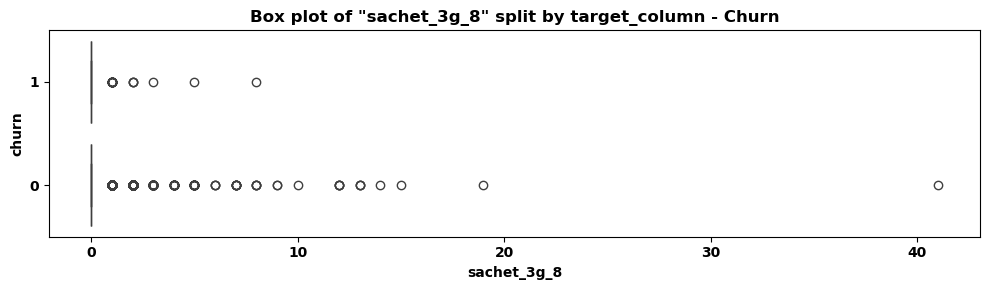

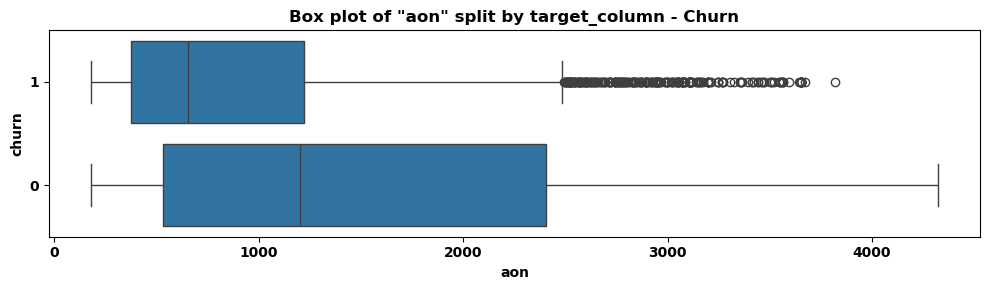

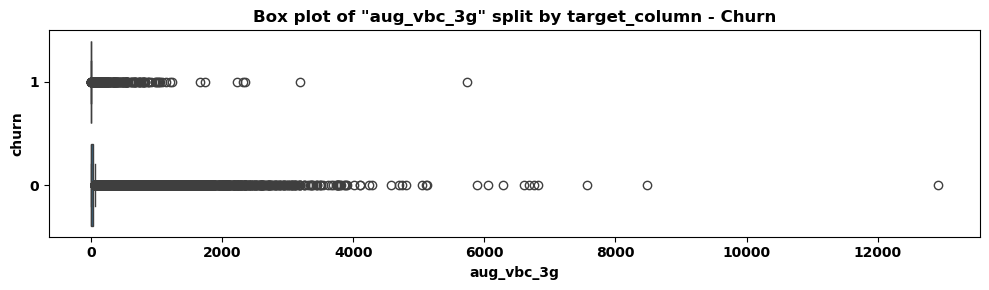

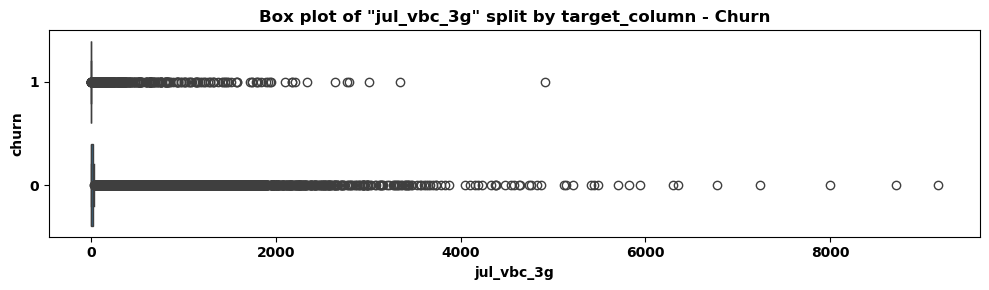

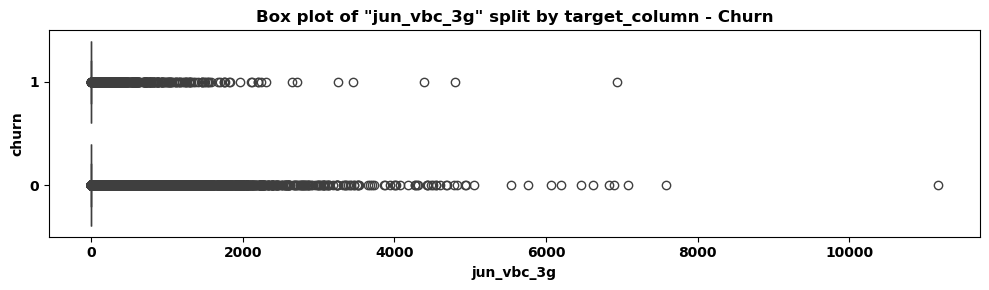

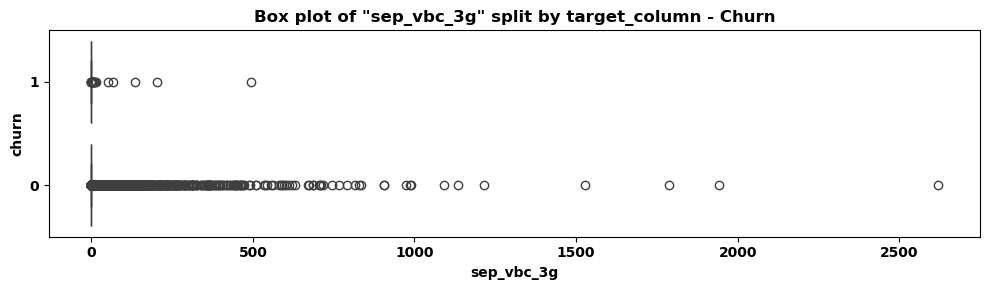

In [66]:
# Ploting all columns in the dataframe for further checks
# Loop through all columns in the dataset

for column in df.columns:
    if column != 'churn':
        plt.figure(figsize=(10, 3))
        
        # Create a box plot for each numeric column split by the target column
        sns.boxplot(y=df['churn'], x=df[column])
        plt.title(f'Box plot of "{column}" split by target_column - Churn')
        
        plt.tight_layout()
        plt.show()


##### Most of the columns do have outliers and need to cap the outliers at certain threshold, we'll do an outlier treament using IQR method

### Checking outliers and Treatment

In [69]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29944.000000  29944.000000  29944.000000  29944.000000  29944.000000   
mean     477.216026    472.777378    443.769340    215.806269    216.449542   
std      462.598580    485.432953    494.611923    408.813705    420.785528   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      221.091750    214.266250    180.618250     19.597500     18.110000   
50%      373.185000    366.690000    340.029500     74.880000     70.185000   
75%      606.108000    604.743750    576.824000    216.945000    213.015000   
90%      923.105800    924.783200    903.193100    576.147000    582.210000   
95%     1186.199450   1200.334300   1191.944700    964.632500    974.378000   
99%     1954.102130   1976.580210   1948.529950   1987.707300   2004.003600   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29944.000000  29944.000000  29944.000000  29944.000000   29944.000000   
mean     195.627181    329.774497    329.255905    300.435473      15.834159   
std      403.907438    439.251291    453.748322    438.463262      72.485743   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       13.097500     81.902500     75.130000     58.005000       0.000000   
50%       61.030000    198.235000    191.990000    171.260000       0.000000   
75%      188.280000    405.910000    404.050000    376.450000       0.000000   
90%      516.036000    761.480000    771.686000    710.248000      30.201000   
95%      883.162500   1110.896500   1114.015000   1033.937500      81.923500   
99%     1924.314200   2153.770700   2222.143000   2008.298700     325.689100   
max    10752.560000   8362.360000   9667.130000  14007.340000    2589.090000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29944.000000   29944.000000   29944.000000   29944.000000   
mean       12.316899      12.126366      25.837412      19.464377   
std        69.479316      66.913546     112.123819      92.668776   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        15.880000      16.624000      51.474000      31.681000   
95%        56.569500      56.477000     143.272500      99.124000   
99%       262.688000     270.795500     504.820400     405.994000   
max      2877.060000    2663.110000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29944.000000      29944.000000      29944.000000      29944.000000   
mean       19.064232         80.285021         80.466390         75.801677   
std       102.858242        204.049759        211.460053        205.156243   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          5.190000          5.210000          3.297500   
50%         0.000000         27.780000         27.200000         24.730000   
75%         0.000000         80.437500         79.900000         75.990000   
90%        28.287000        180.001000        181.610000        175.824000   
95%        94.585500        299.116000        300.817500        288.119500   
99%       393.453100        837.031000        858.105900        782.219600   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      29944.000000      29944.000000      29944.000000      29944.000000   
mean         158.730090        156.804473        149.296445          7.731319   
std          230.822104        223.014853        217.638370         23.119867   
min          

In [70]:
# Replacing outliers applying the IQR method
for col in df.columns:
    if col != 'churn': 
        q1 = df[col].describe()["25%"]
        q3 = df[col].describe()["75%"]
        iqr = q3-q1
        upper_bound = q3+1.5*iqr
        lower_bound = q1-1.5*iqr
        df[col] = np.where(  df[col] > upper_bound, upper_bound, df[col])
        df[col] = np.where(  df[col] <lower_bound, lower_bound, df[col])


### Ploting the columns post the outlier treatment

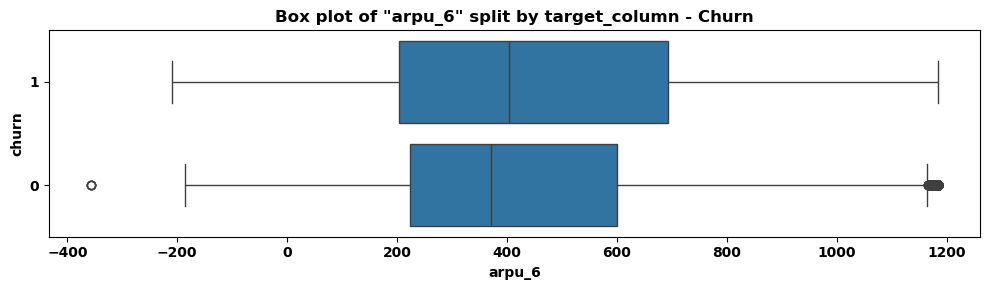

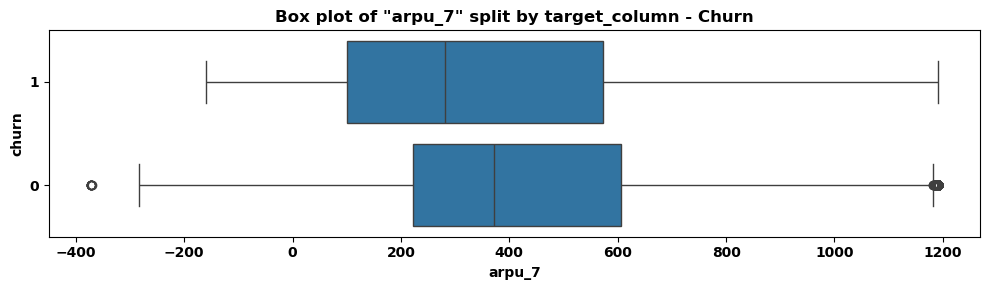

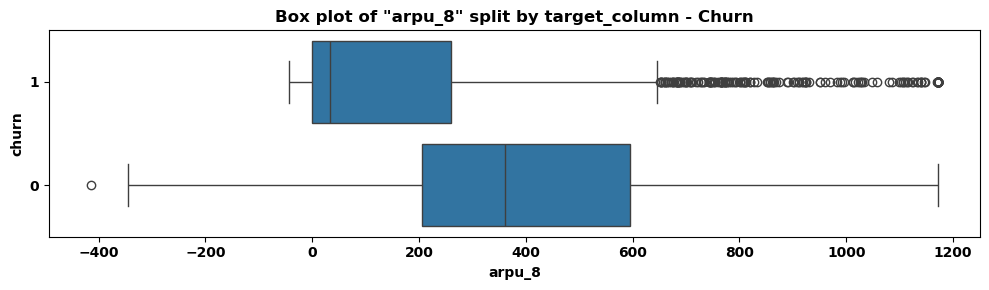

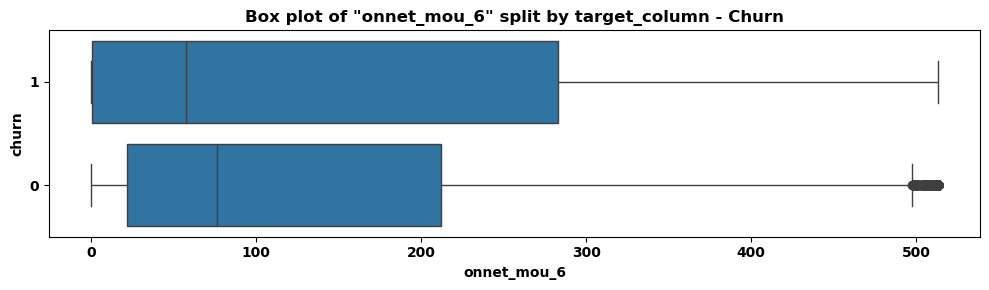

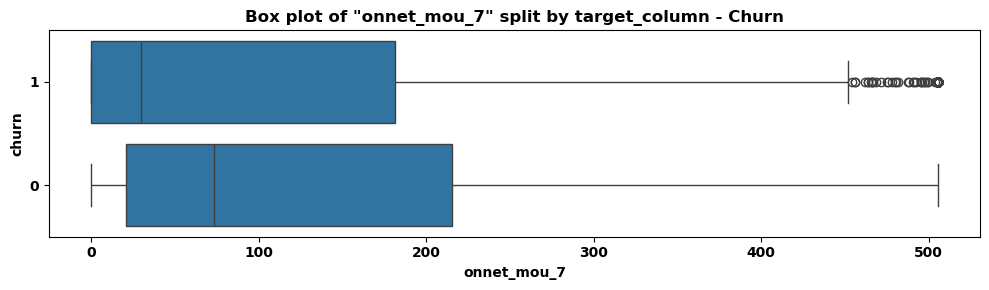

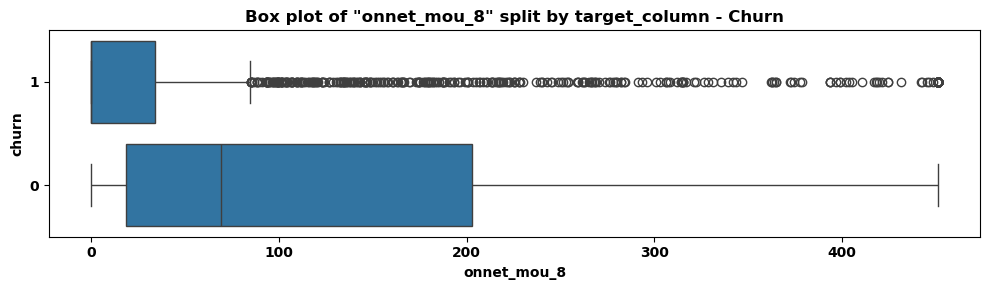

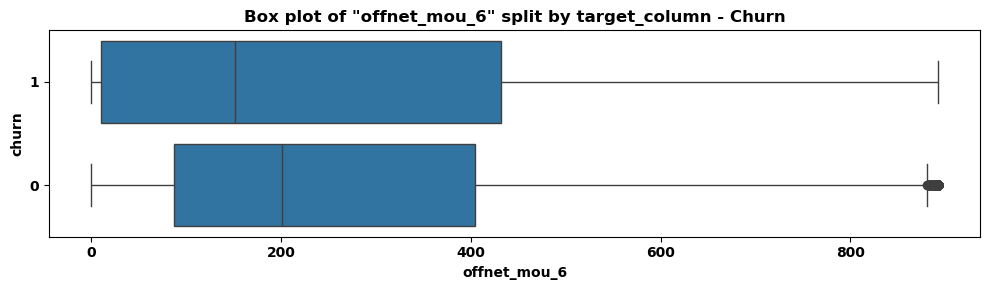

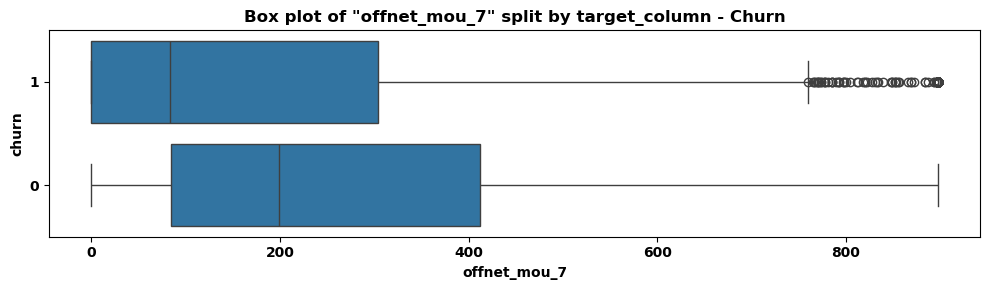

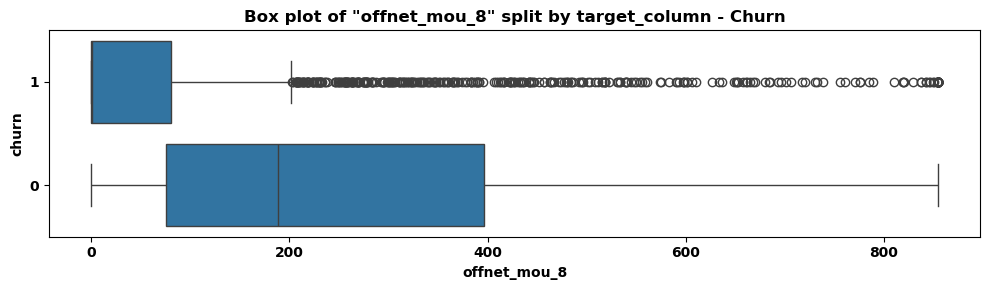

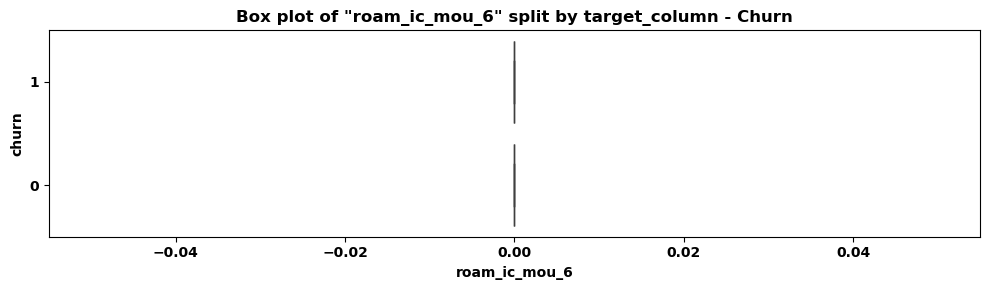

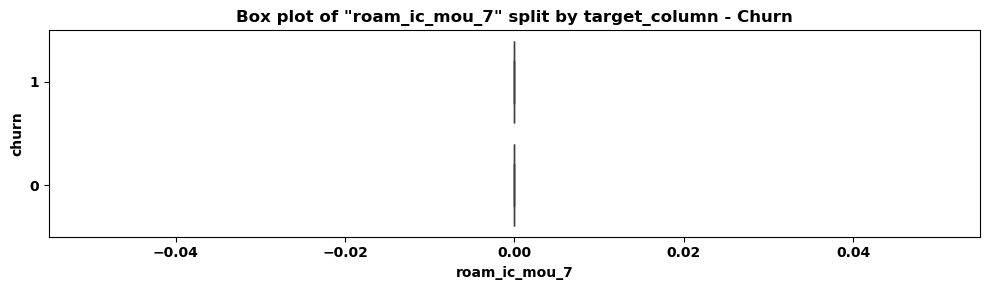

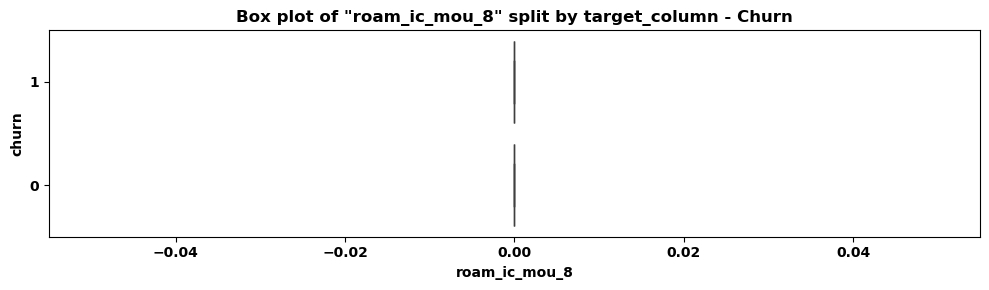

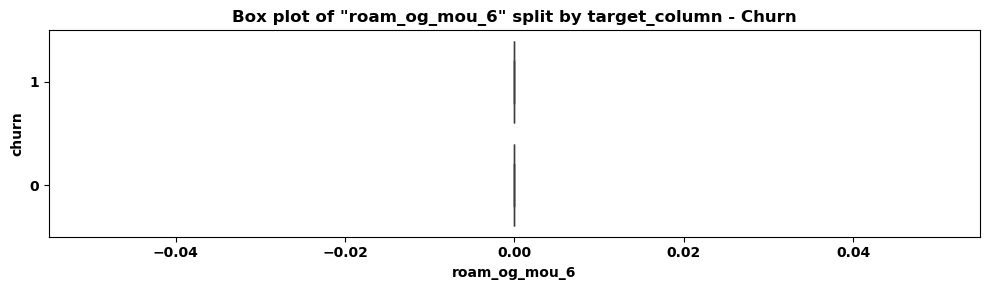

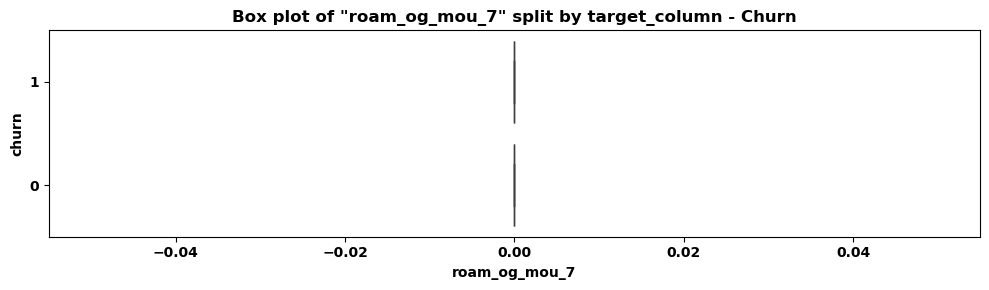

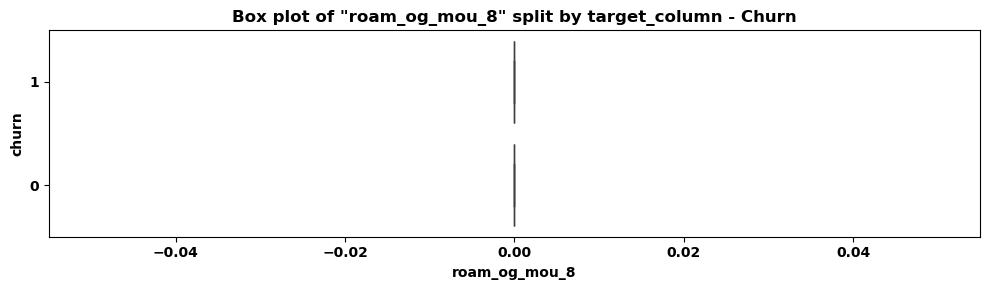

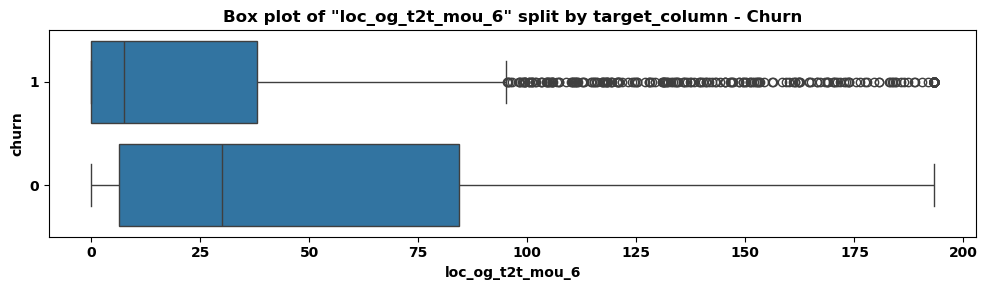

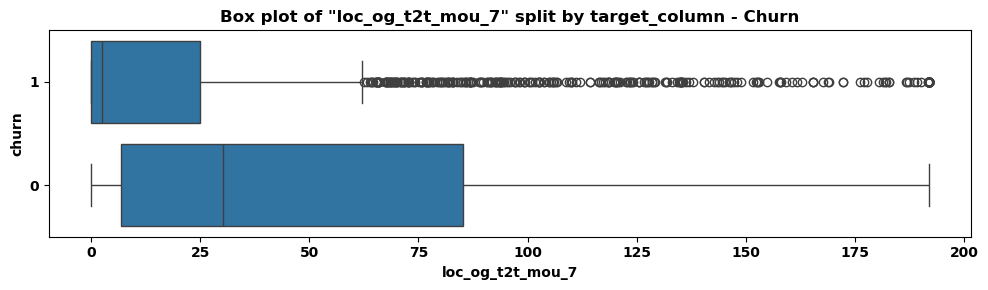

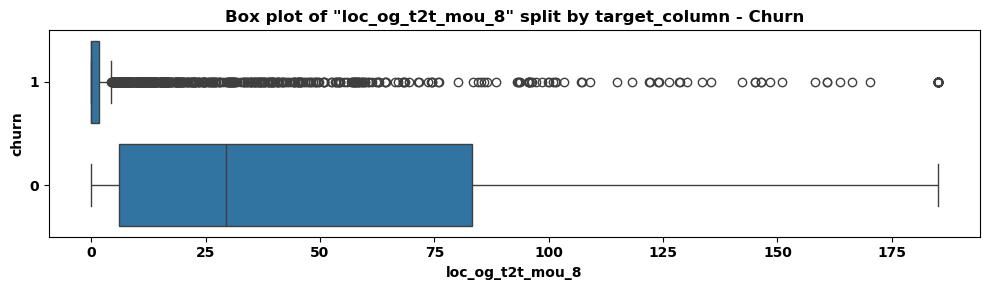

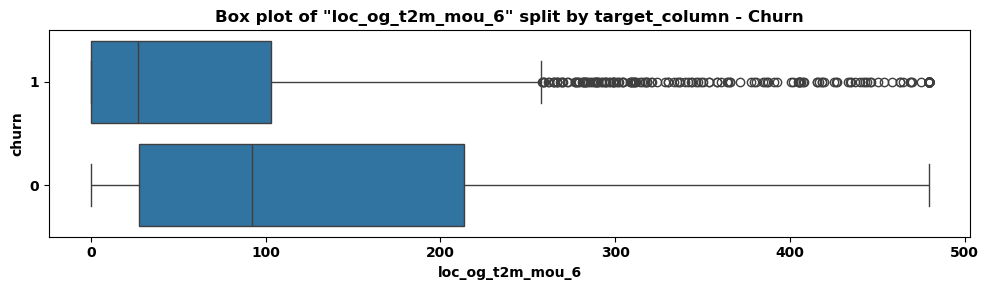

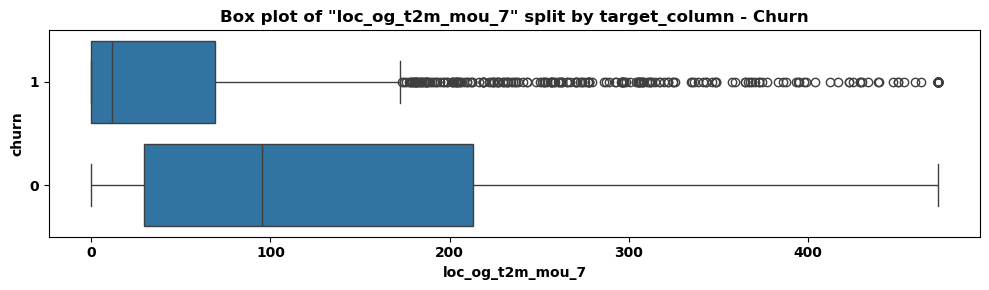

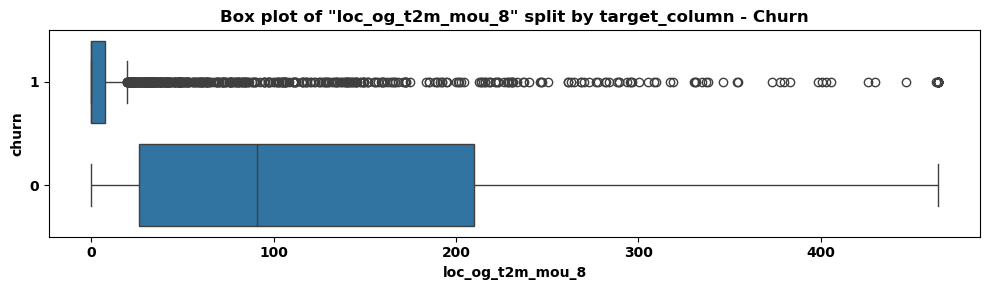

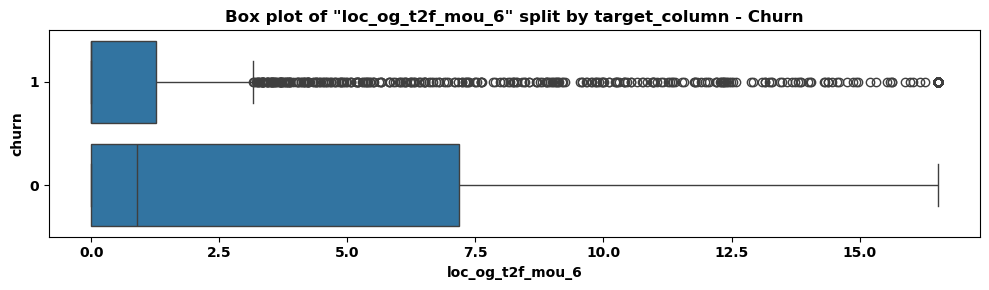

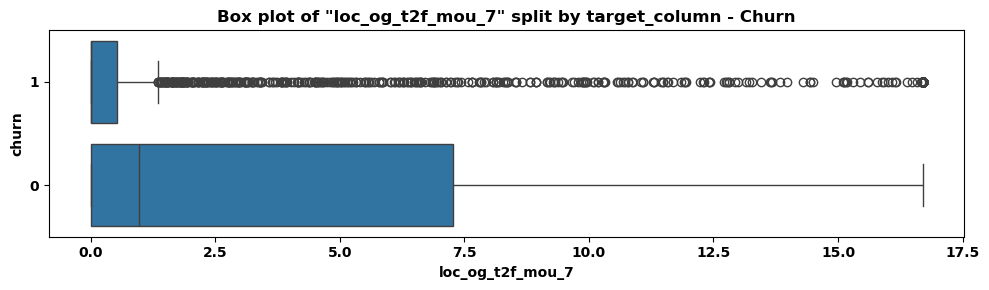

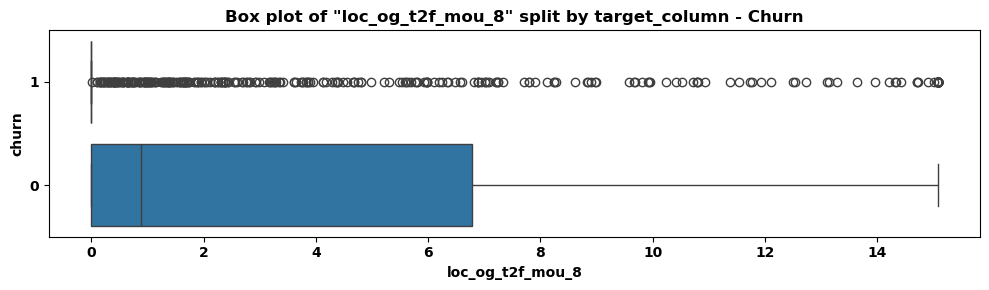

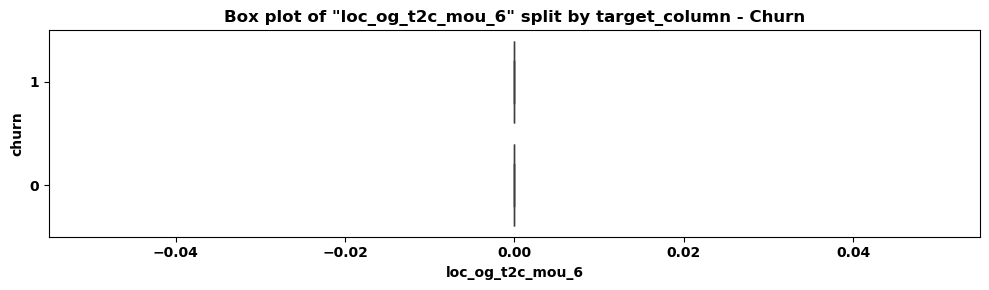

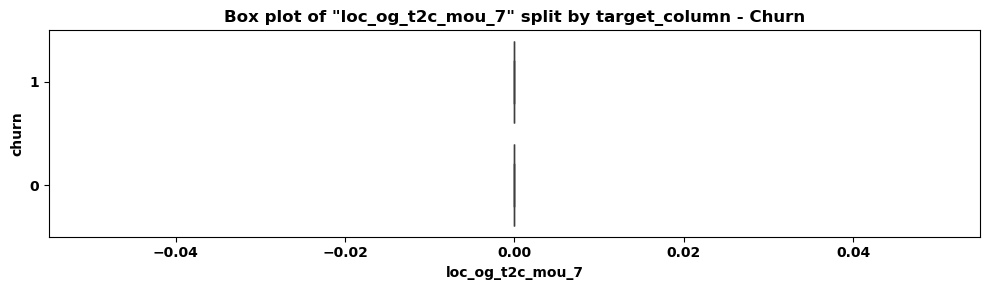

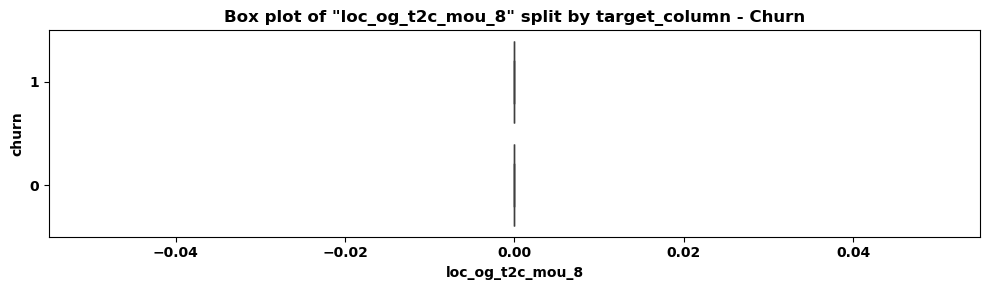

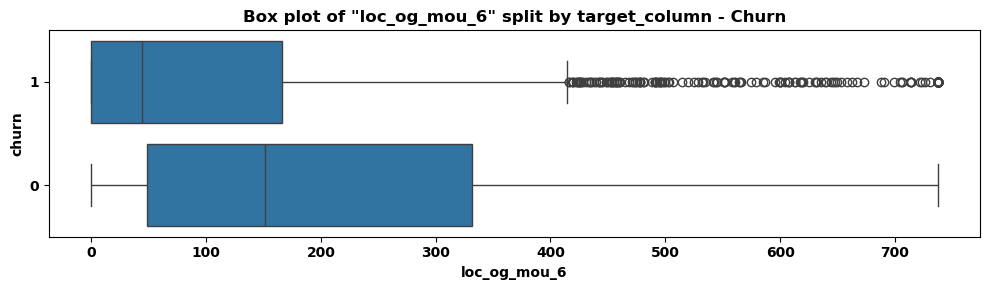

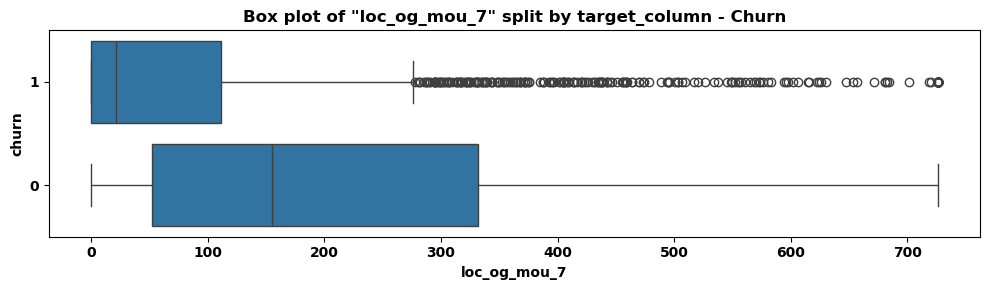

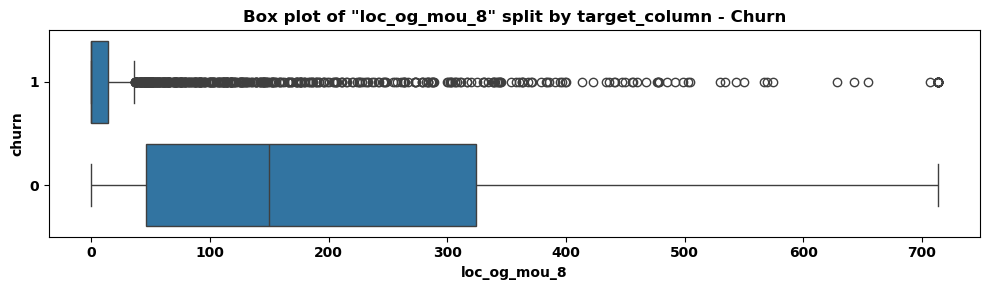

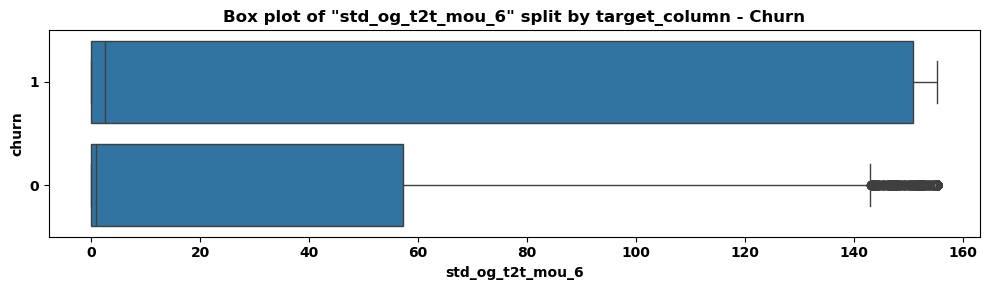

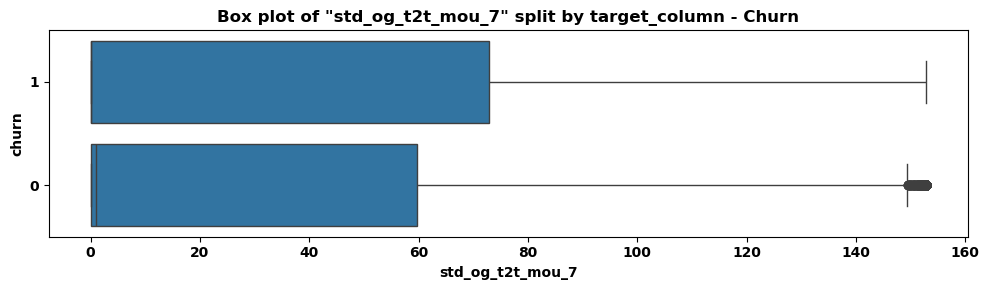

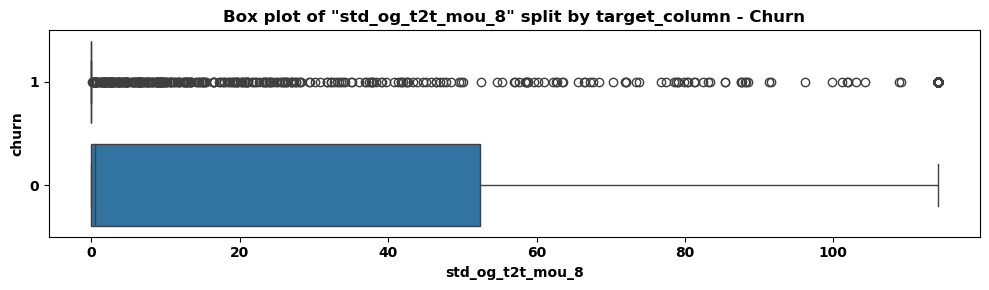

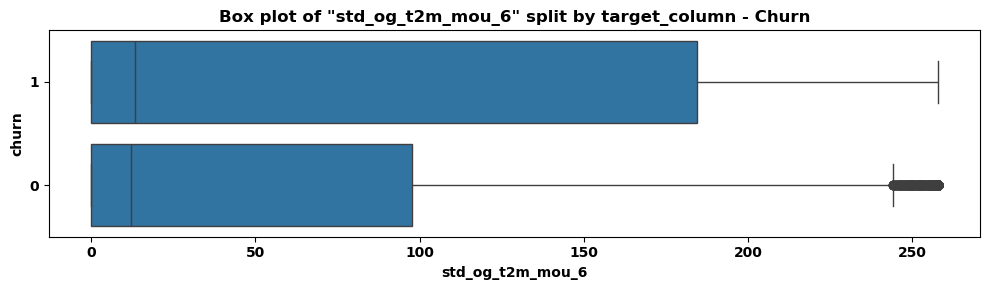

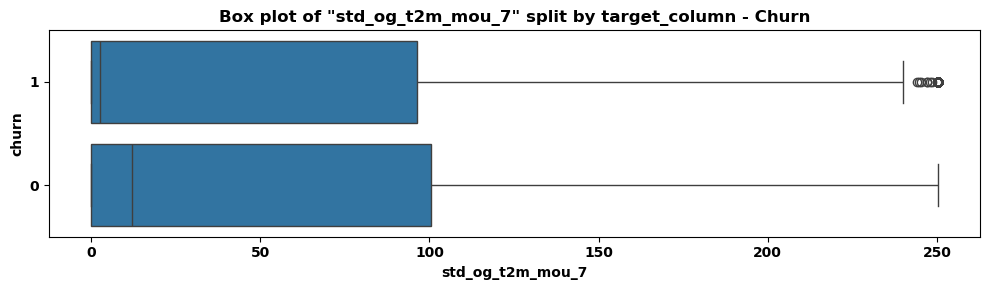

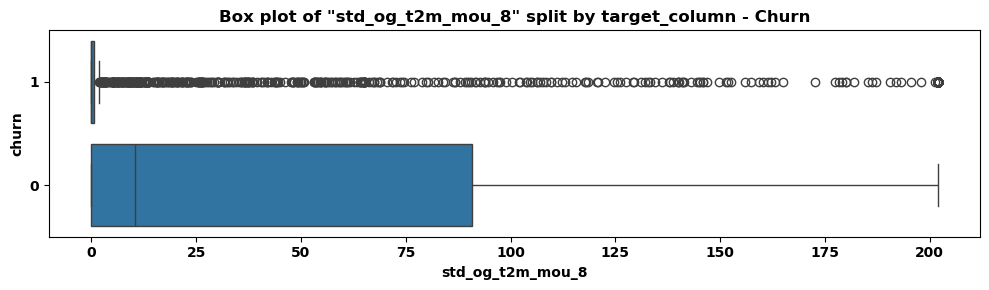

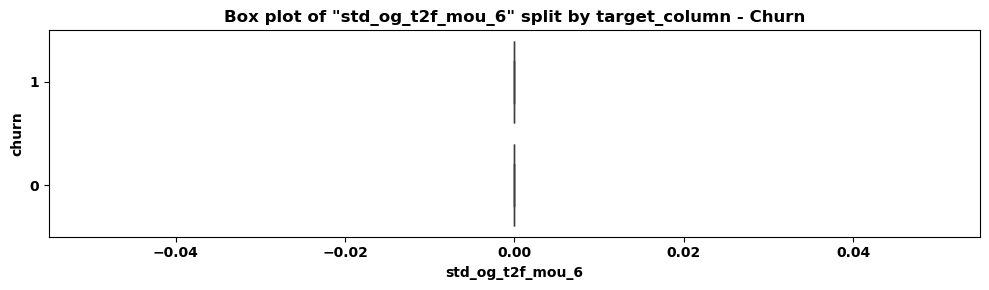

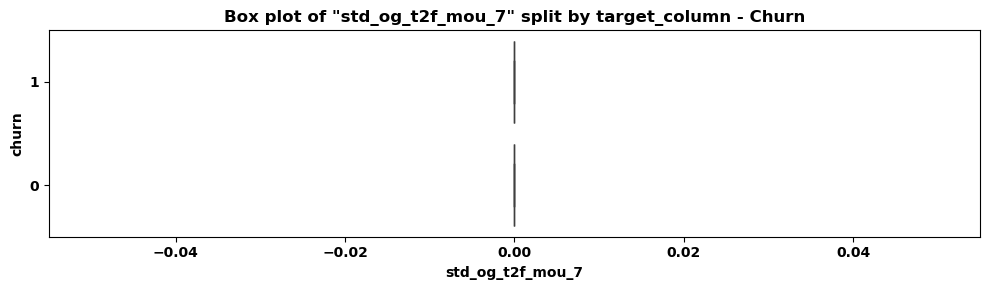

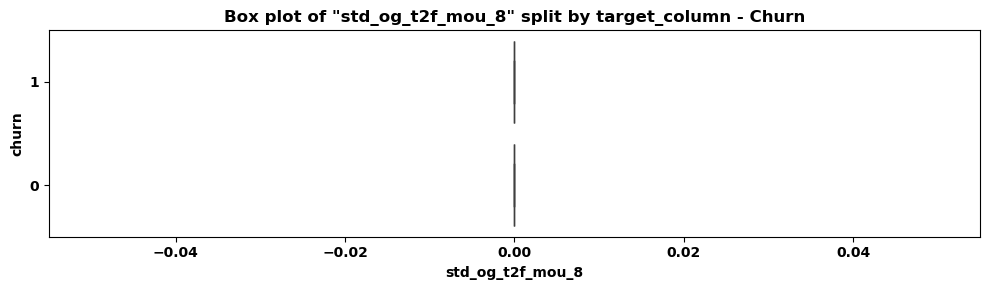

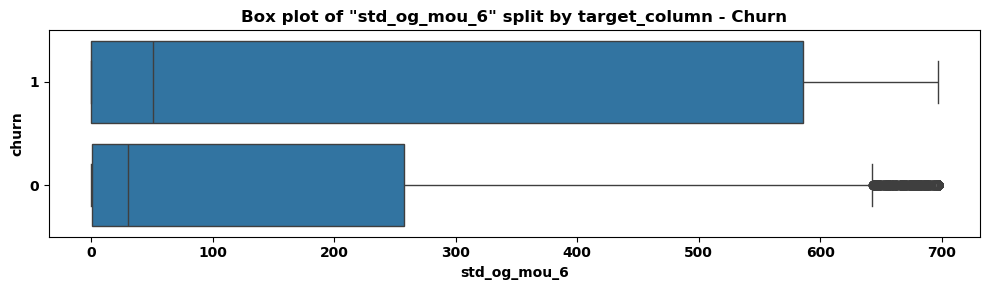

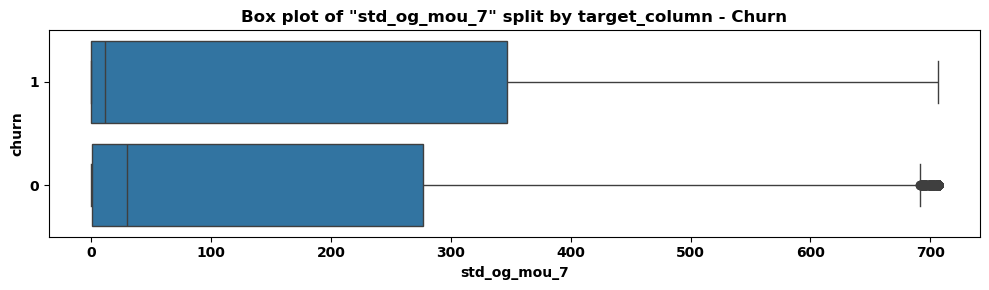

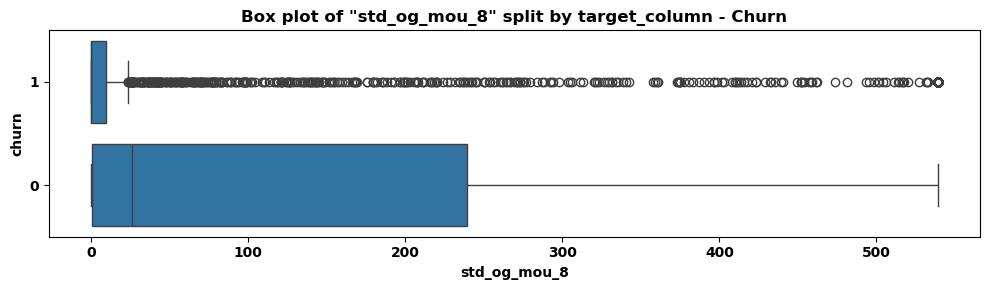

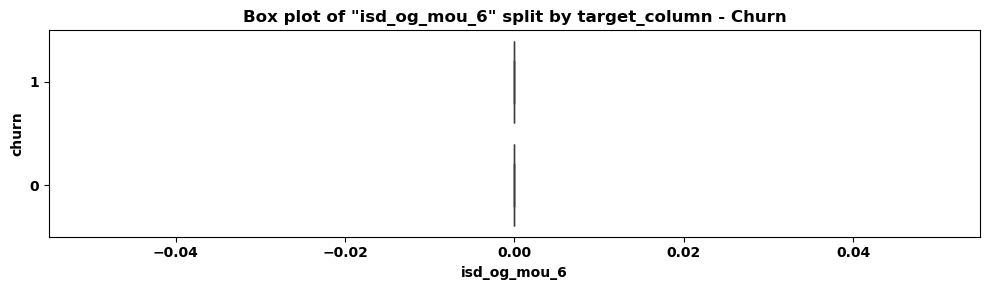

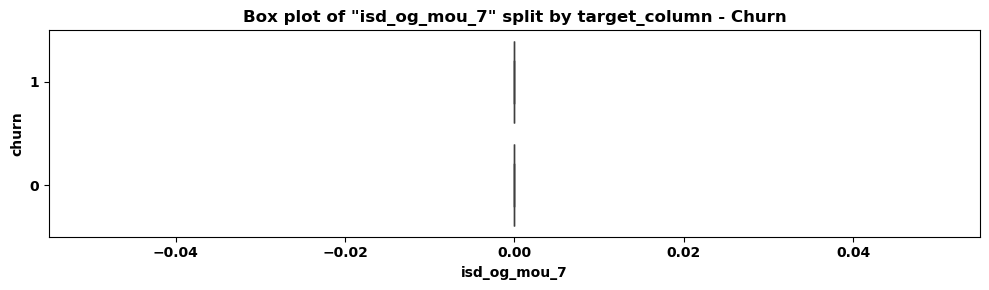

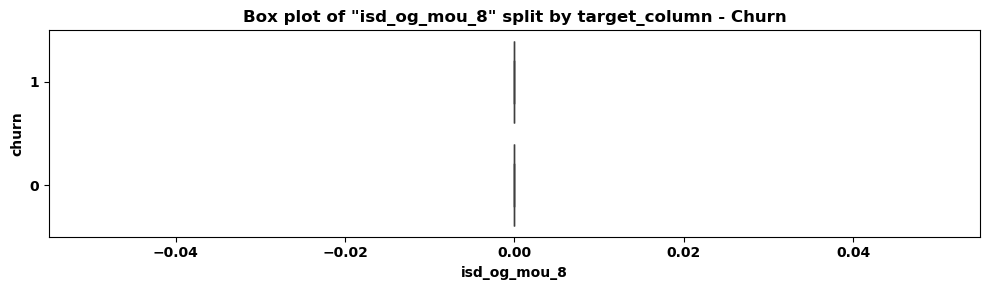

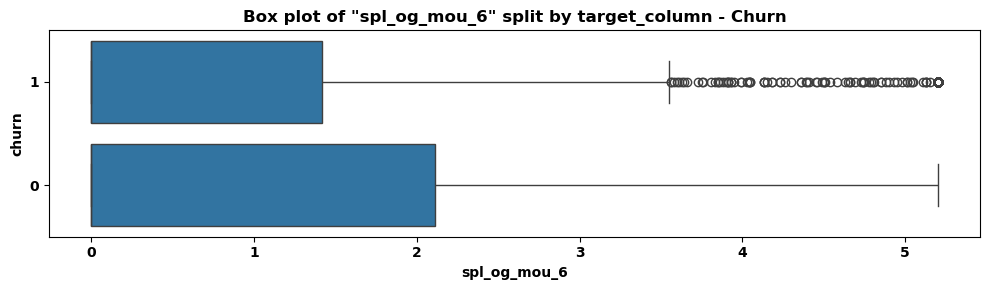

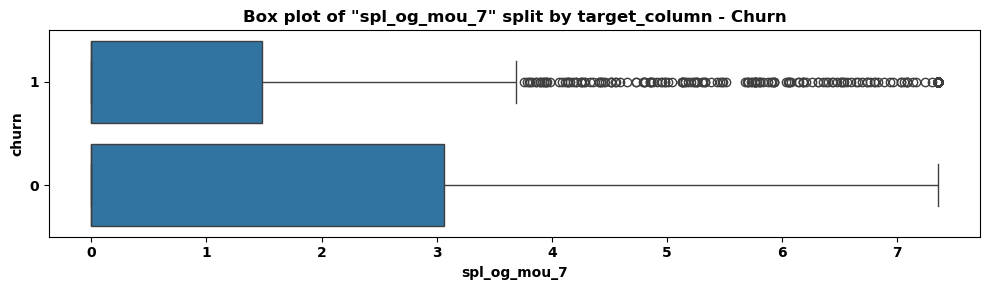

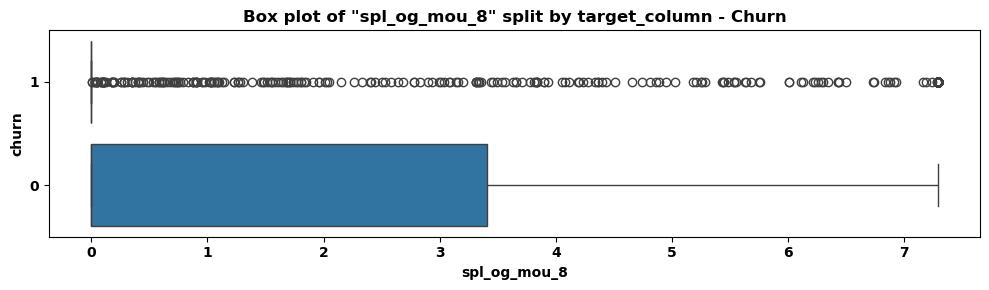

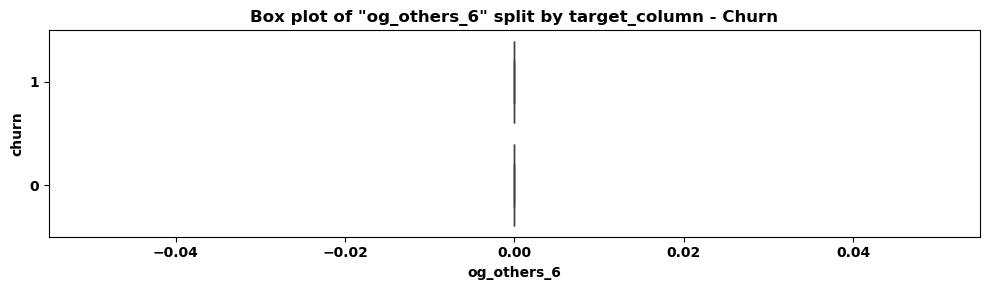

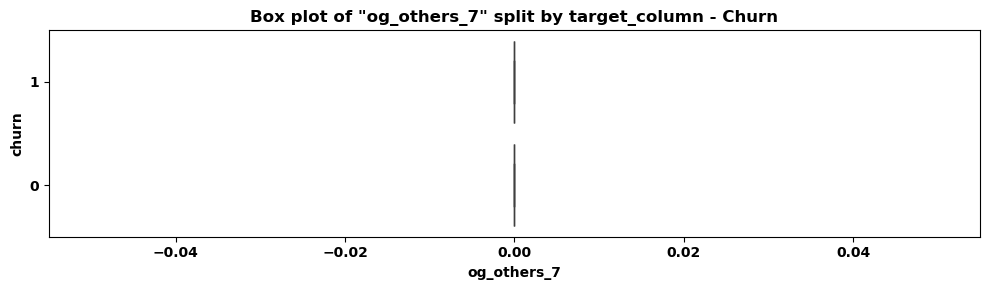

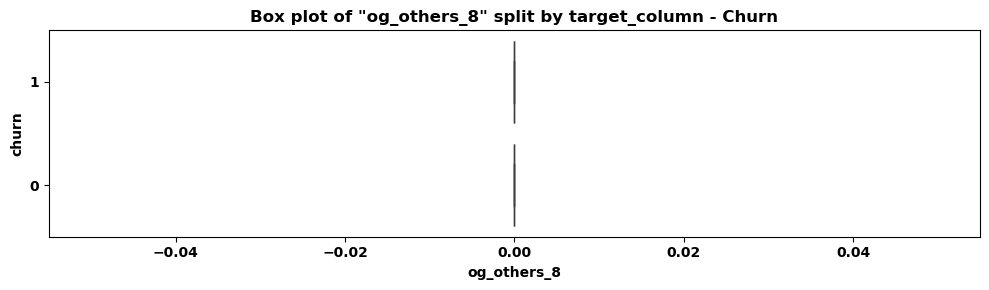

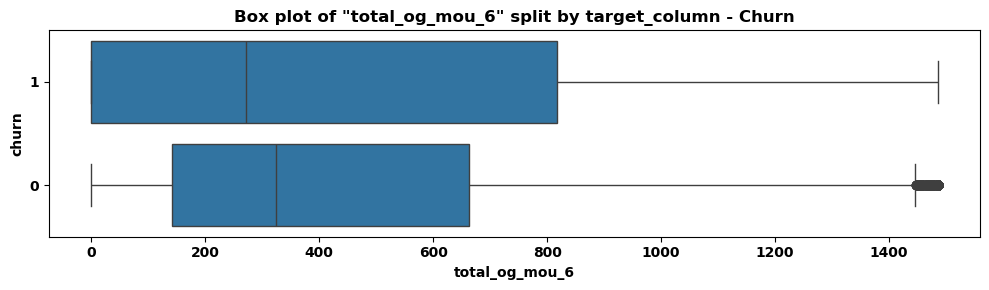

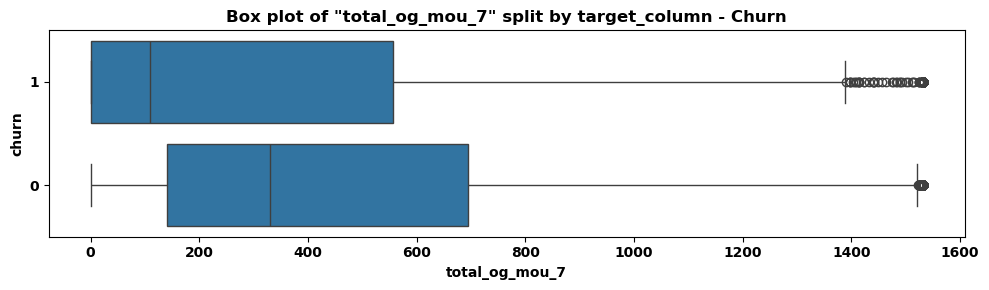

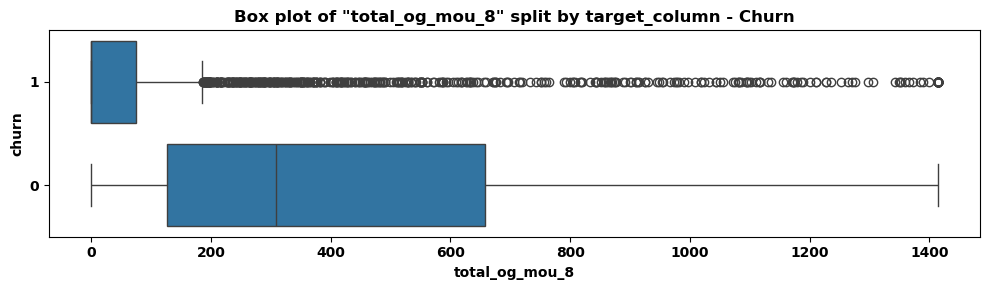

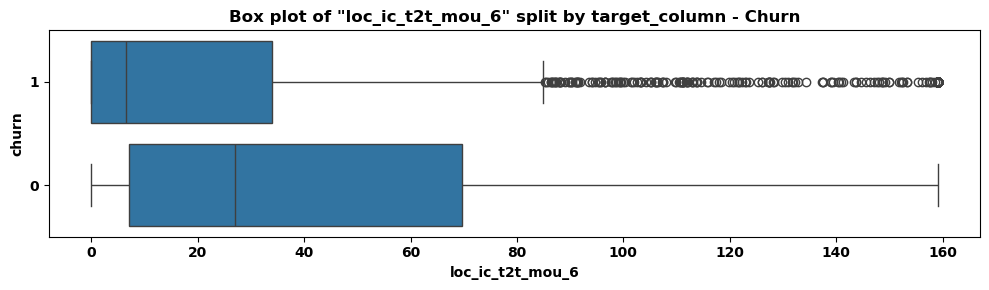

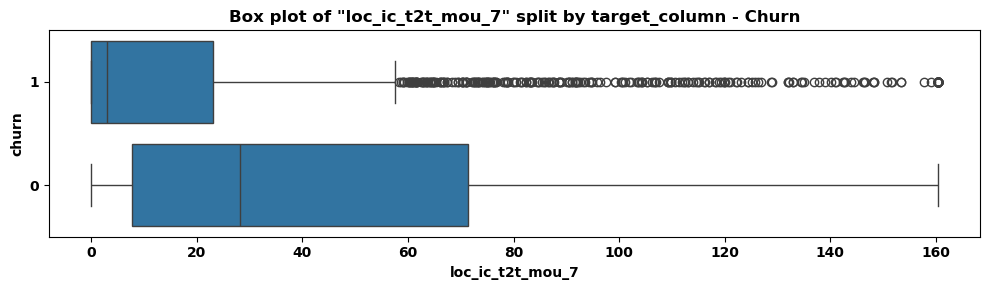

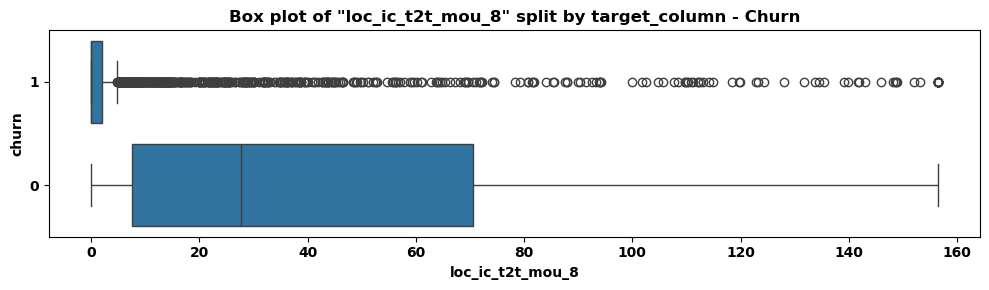

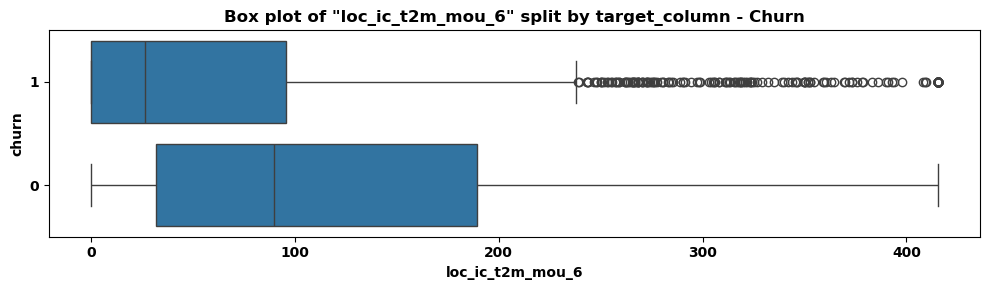

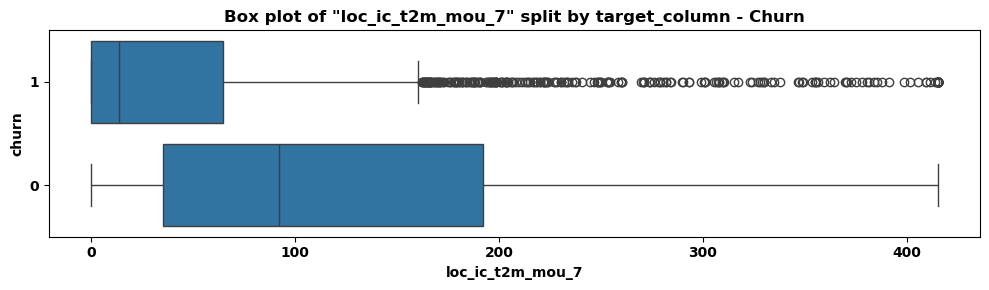

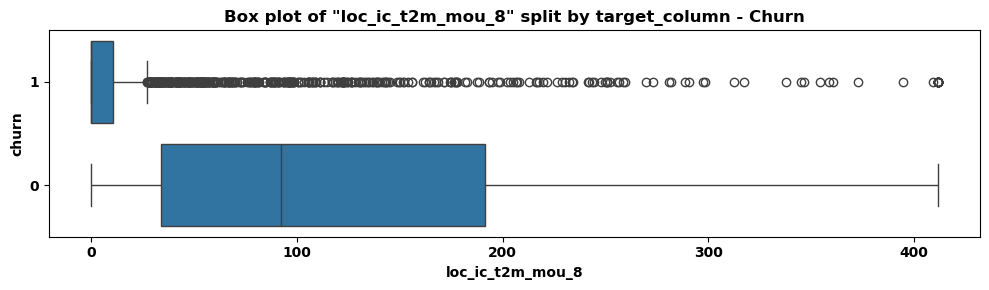

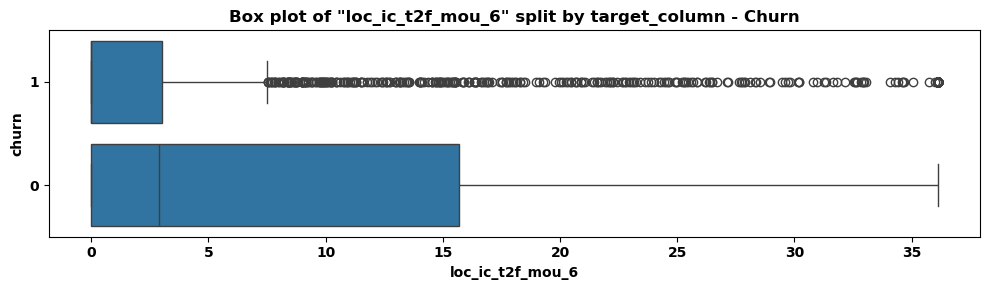

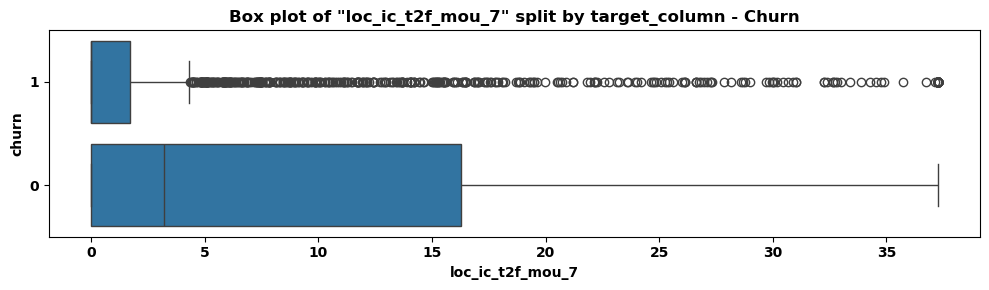

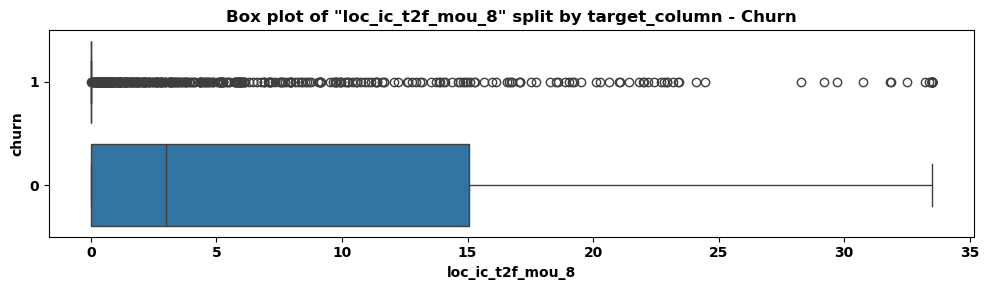

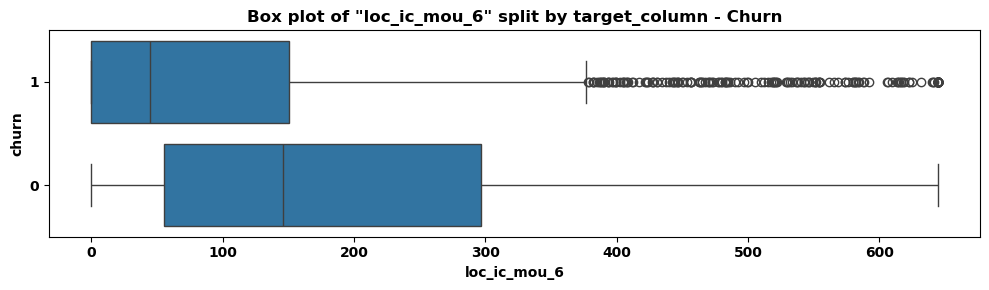

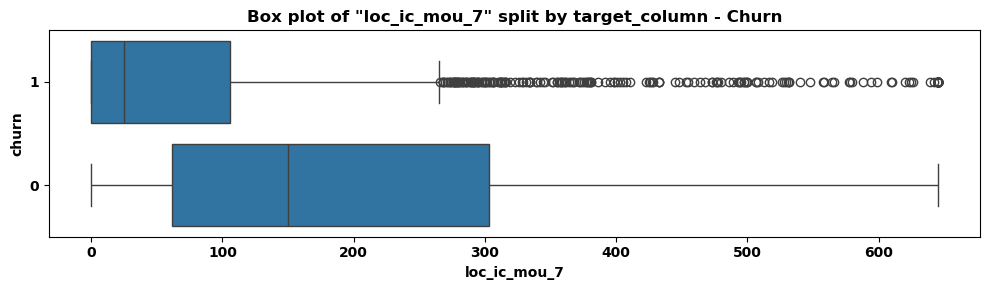

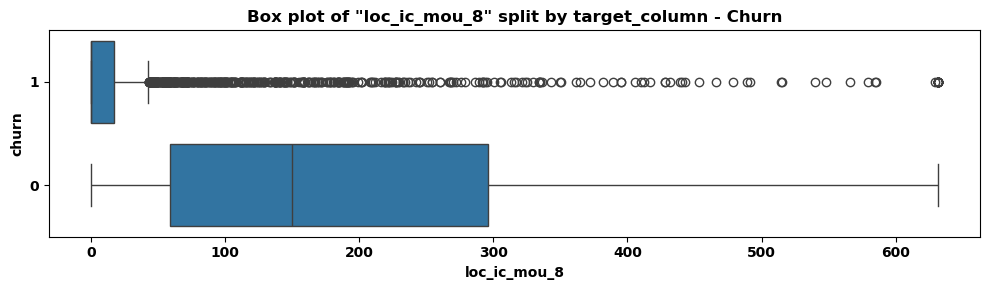

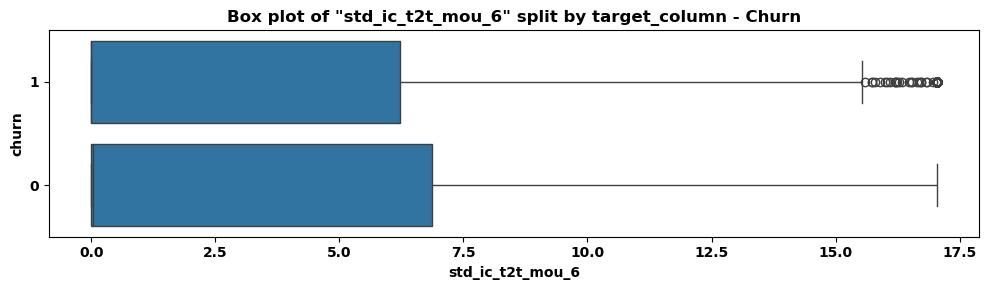

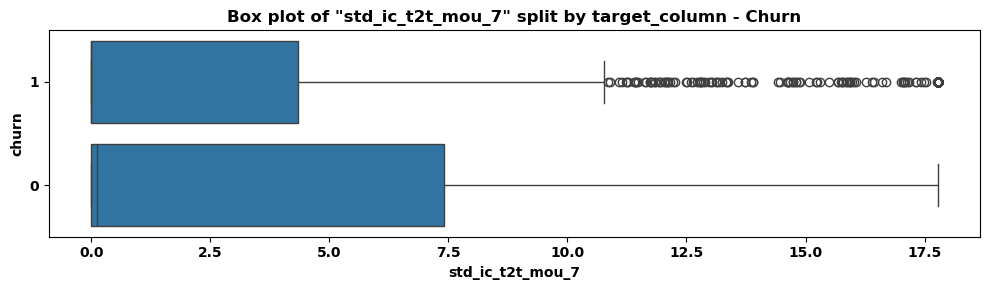

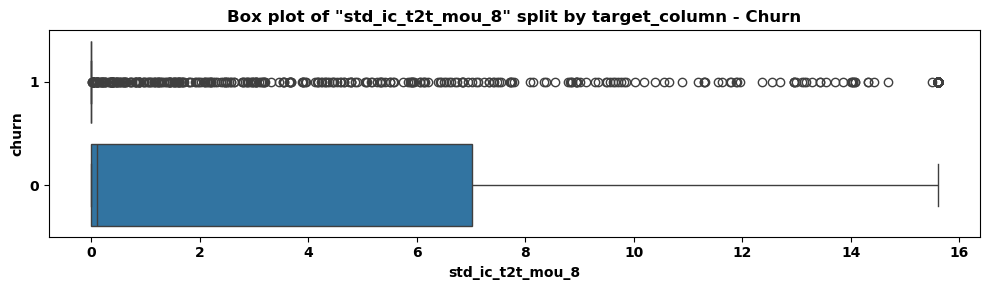

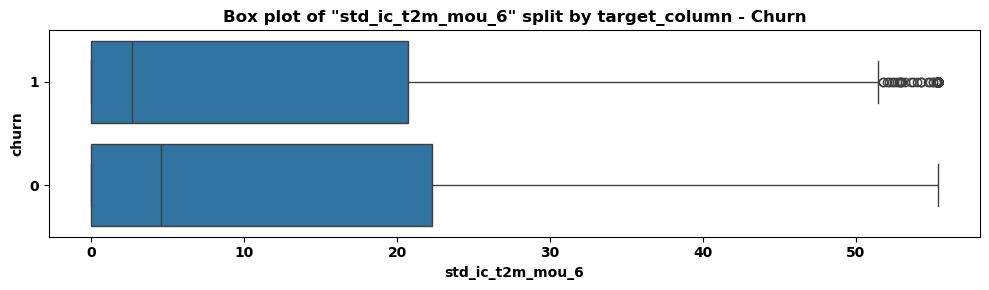

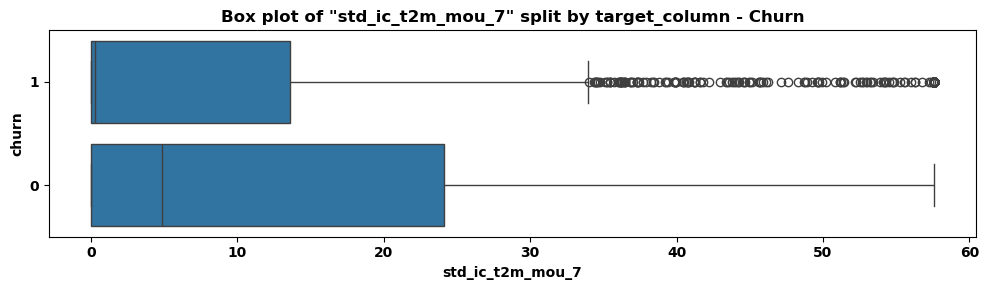

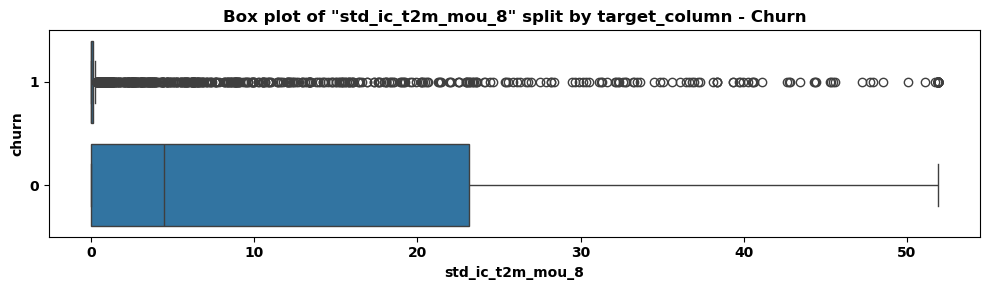

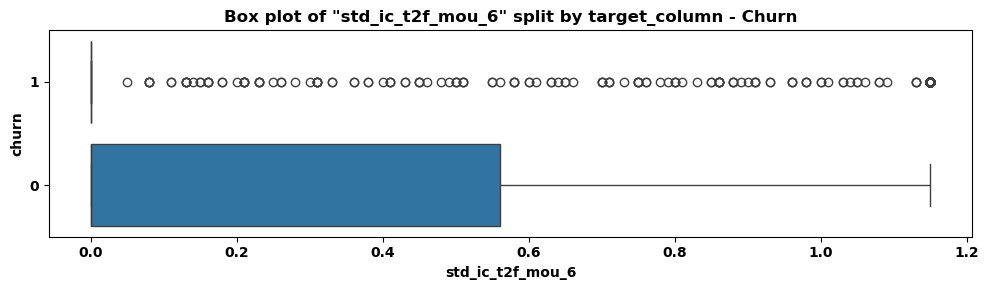

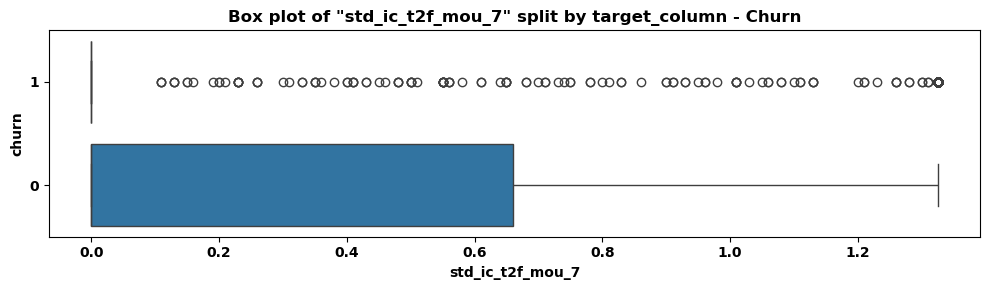

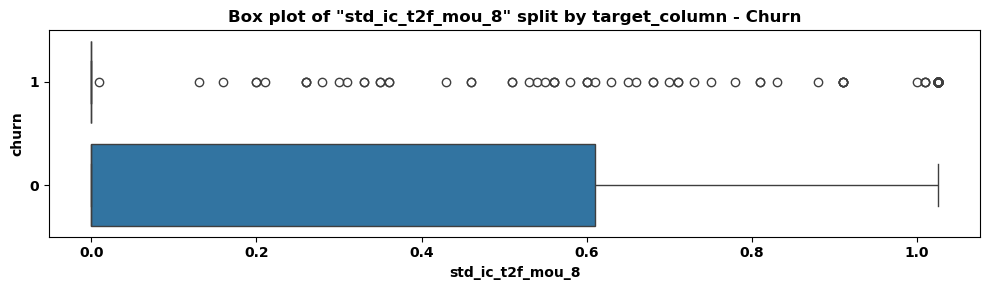

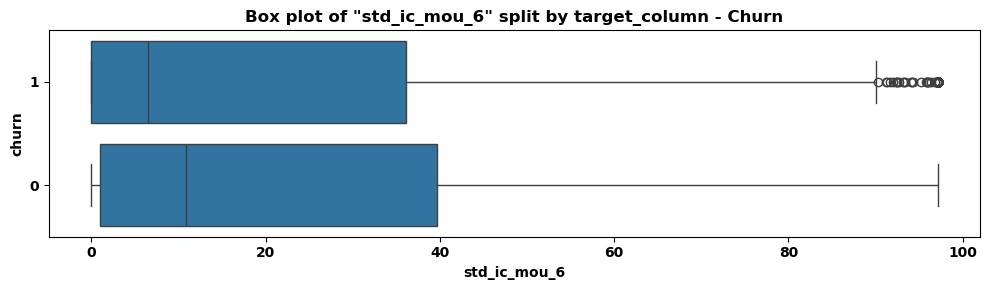

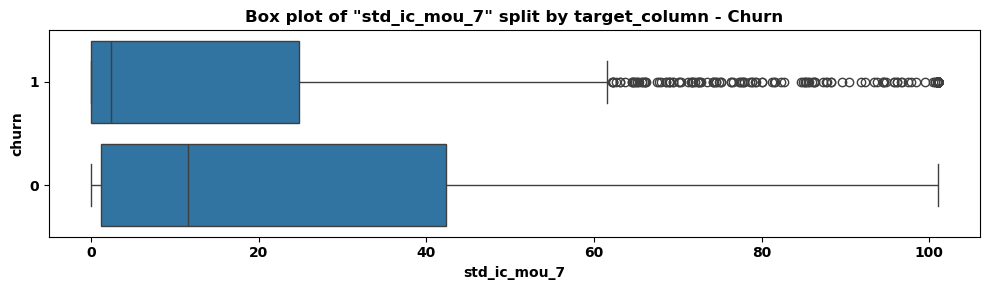

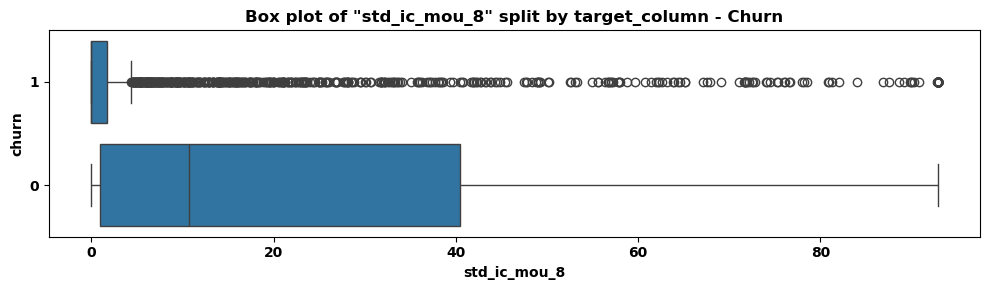

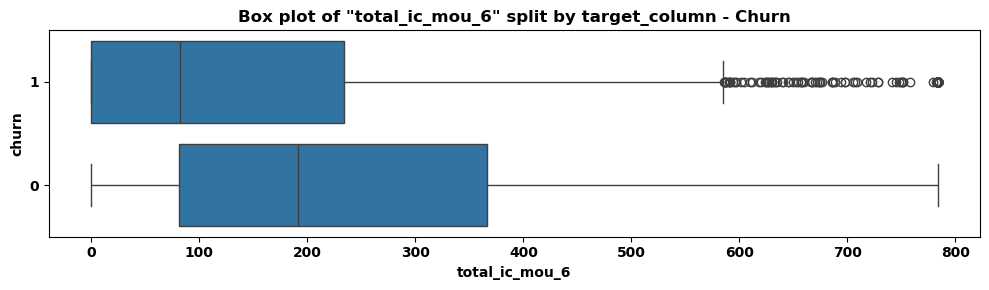

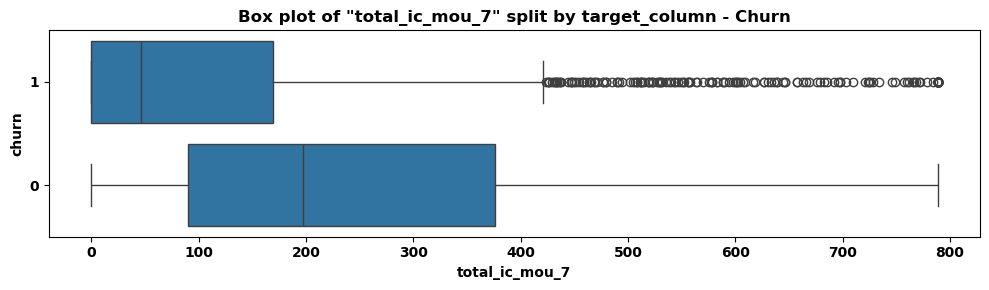

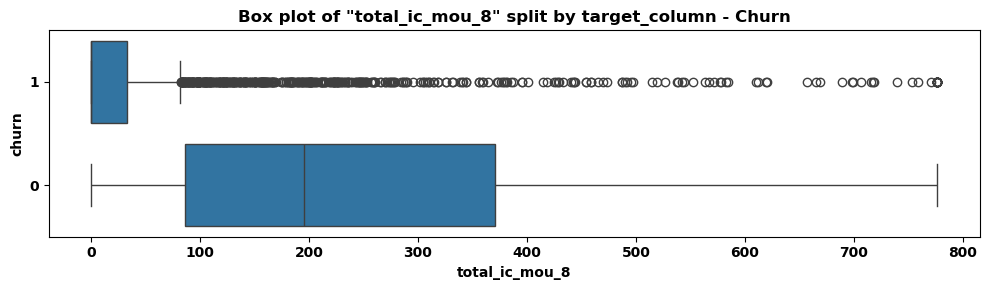

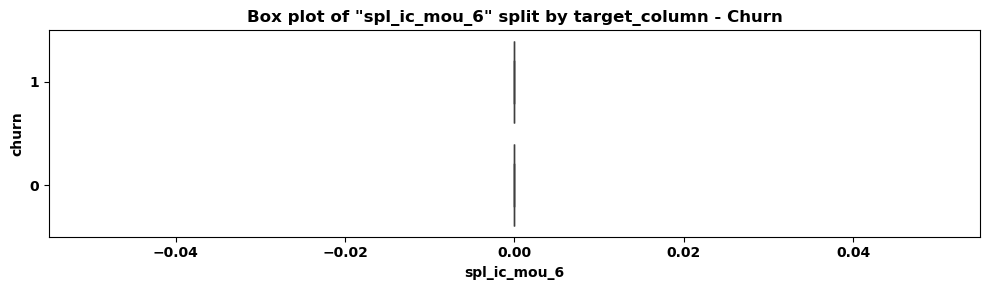

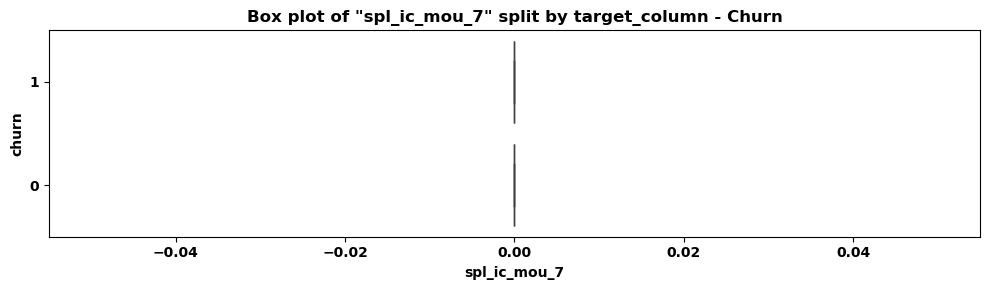

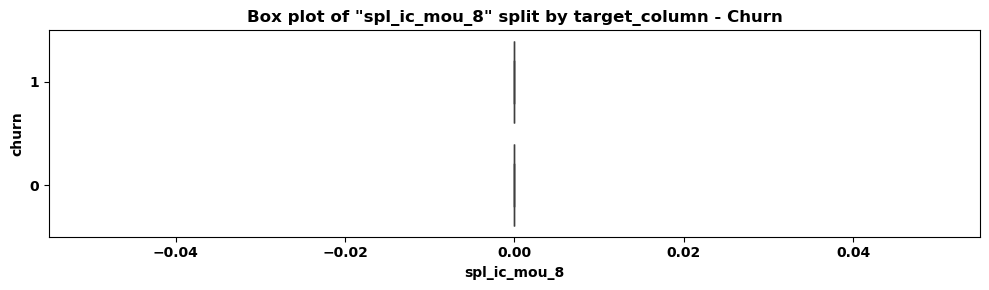

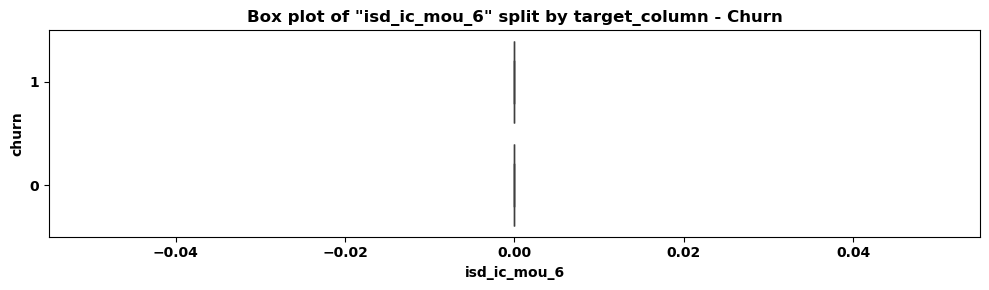

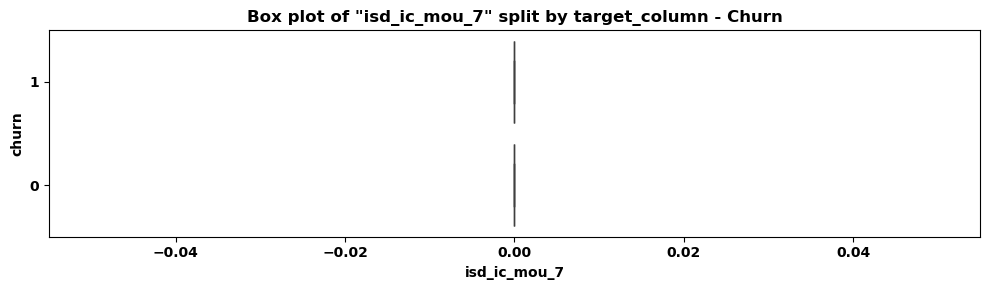

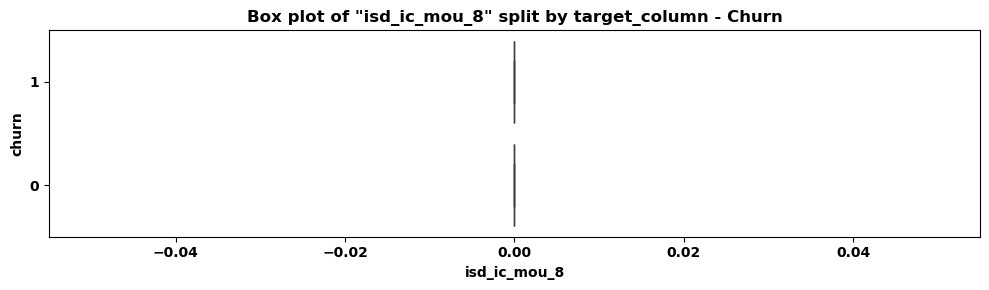

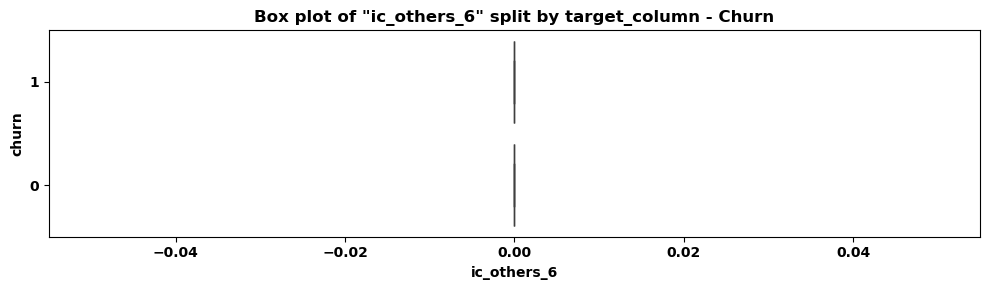

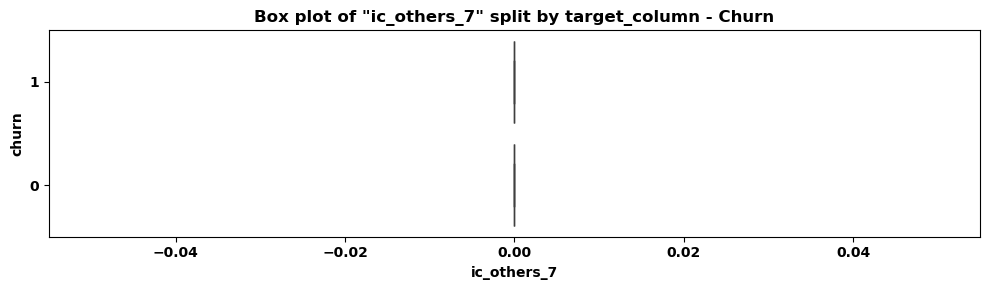

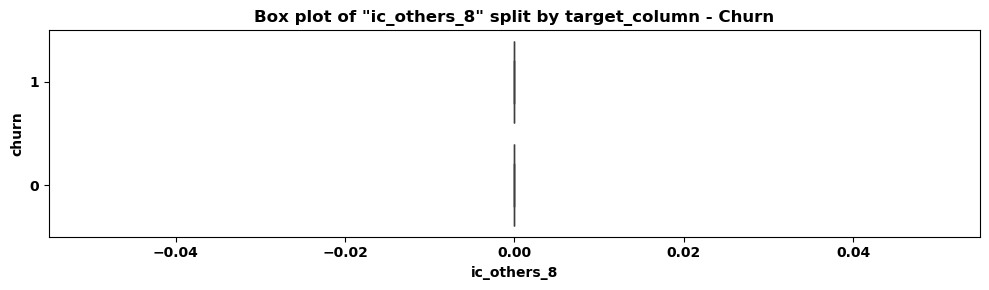

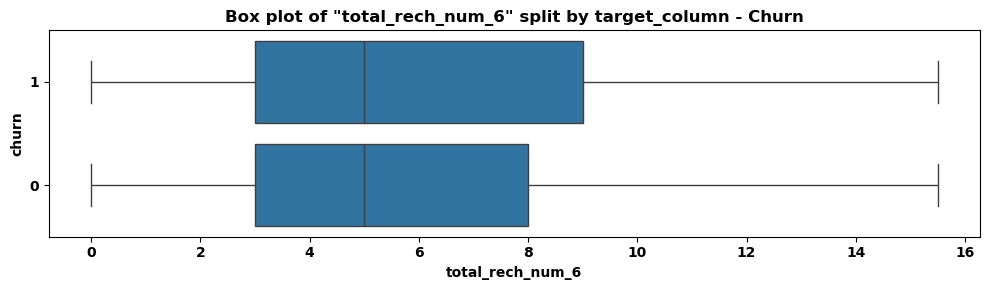

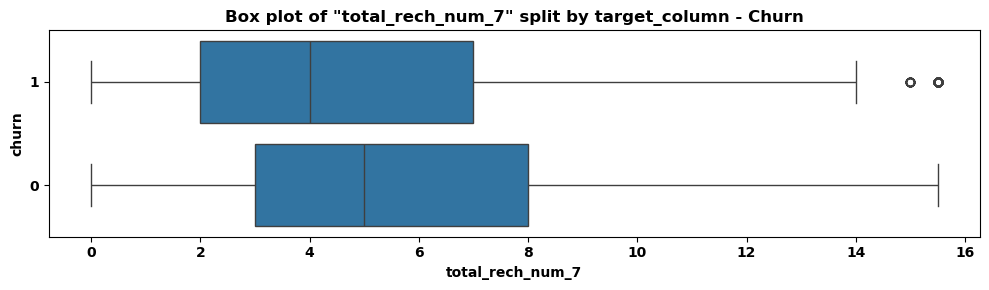

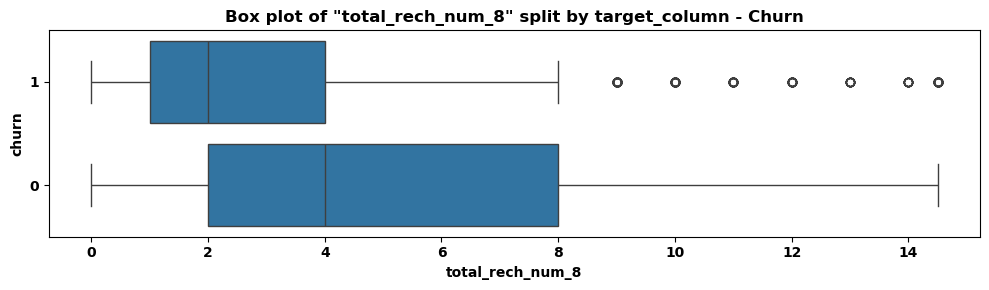

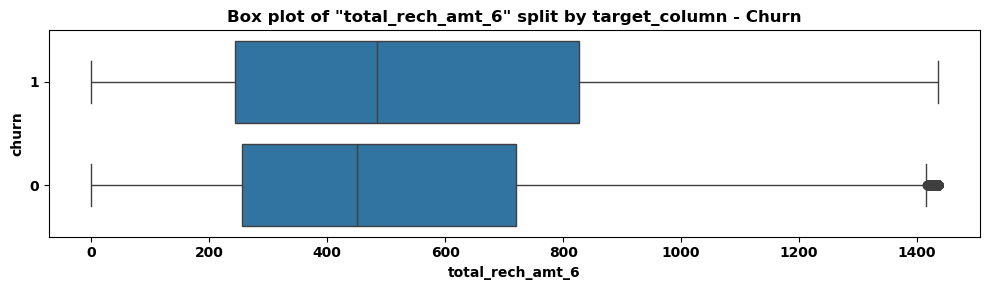

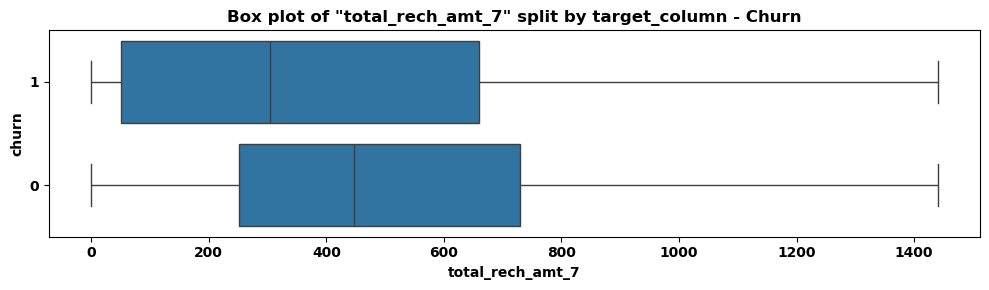

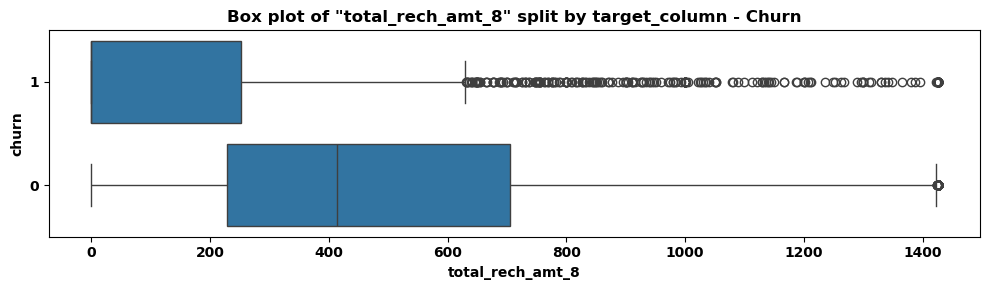

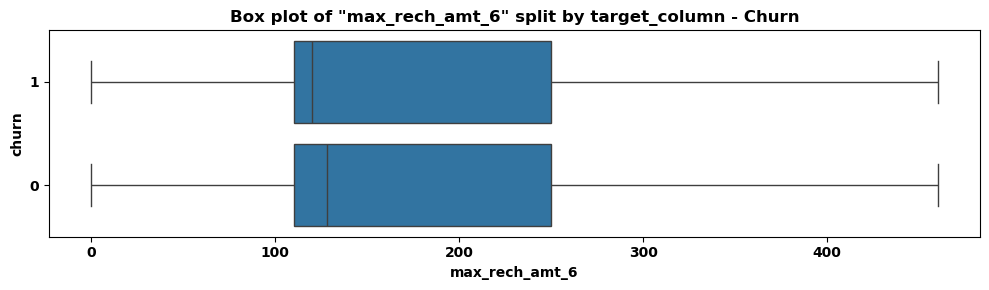

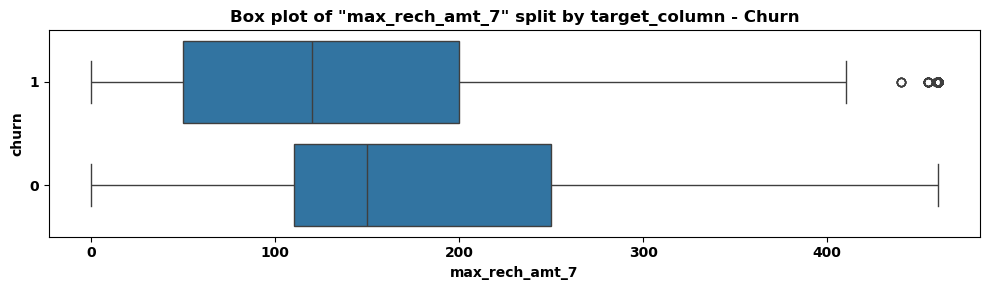

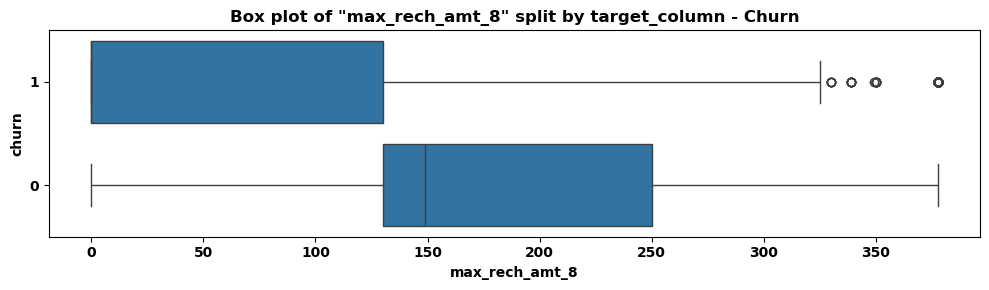

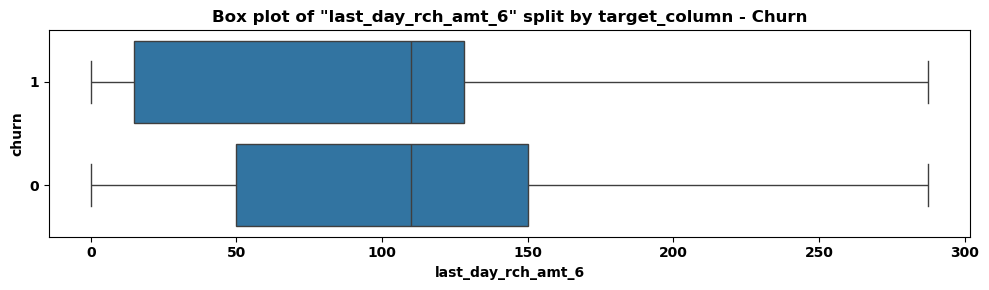

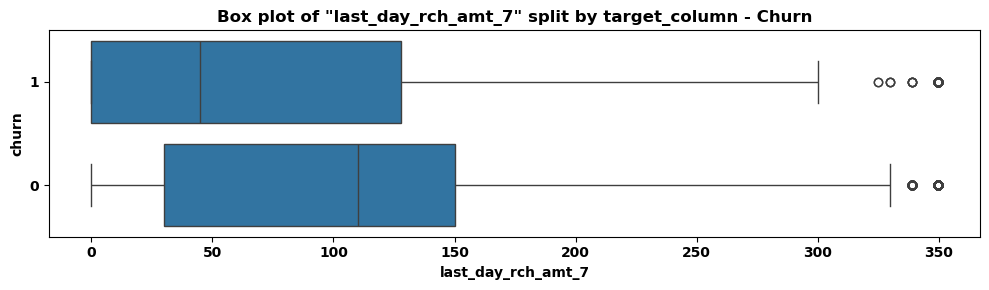

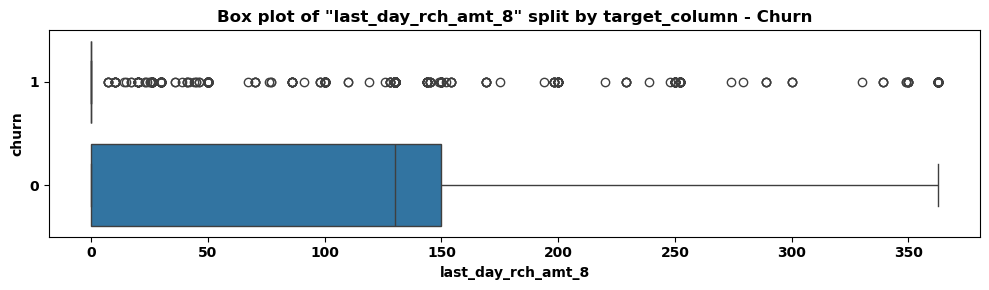

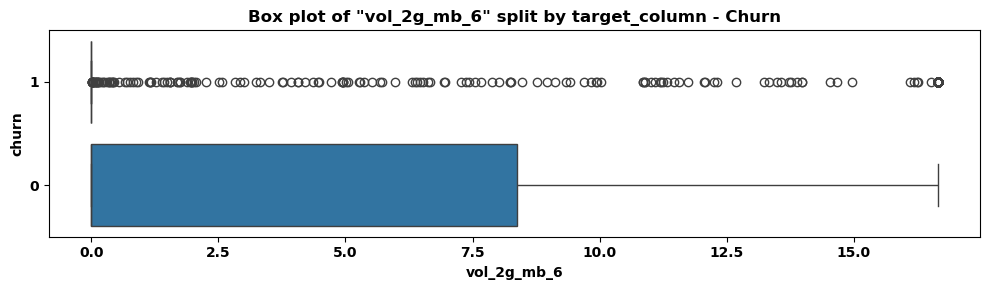

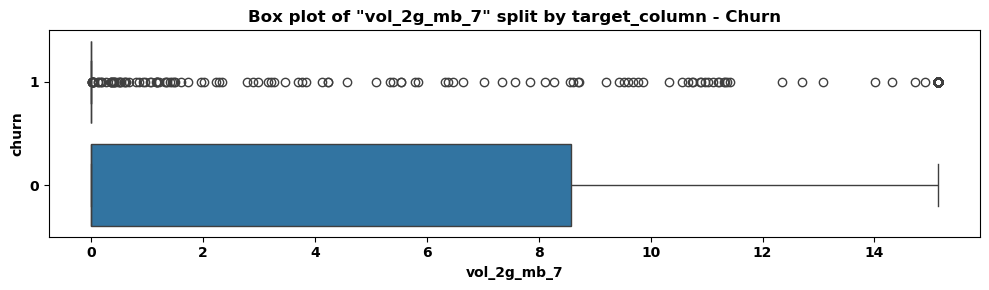

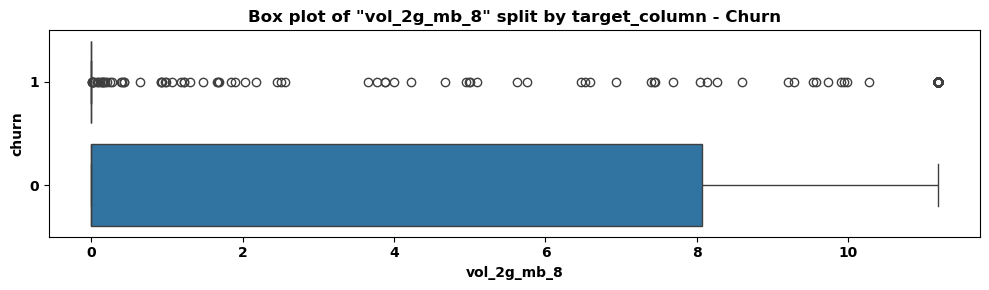

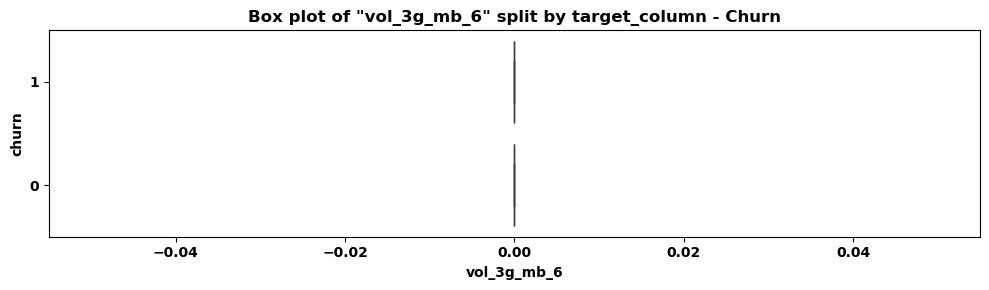

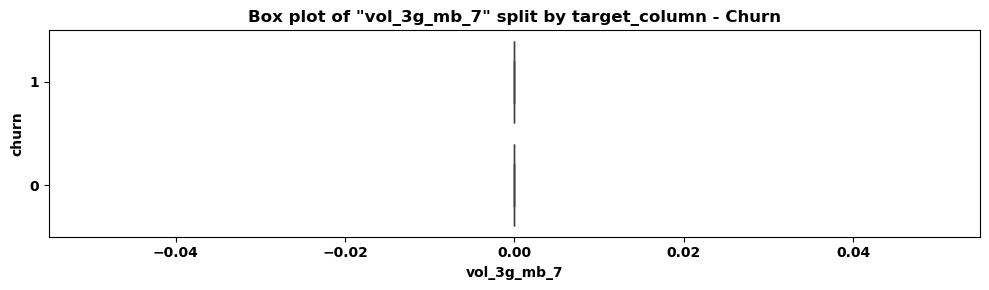

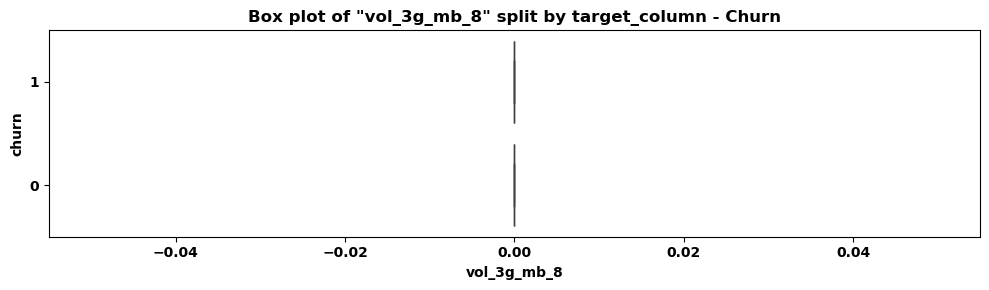

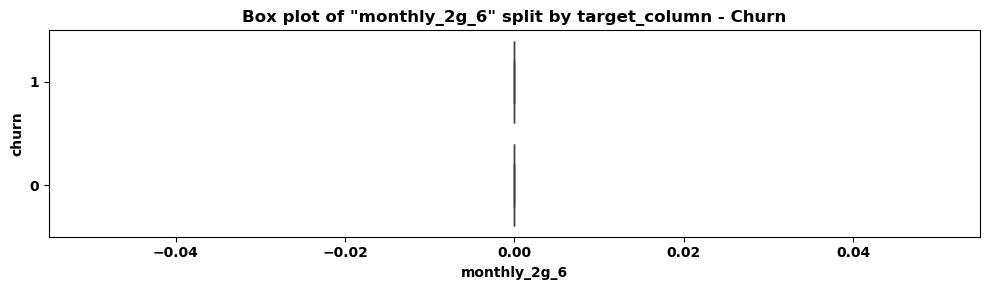

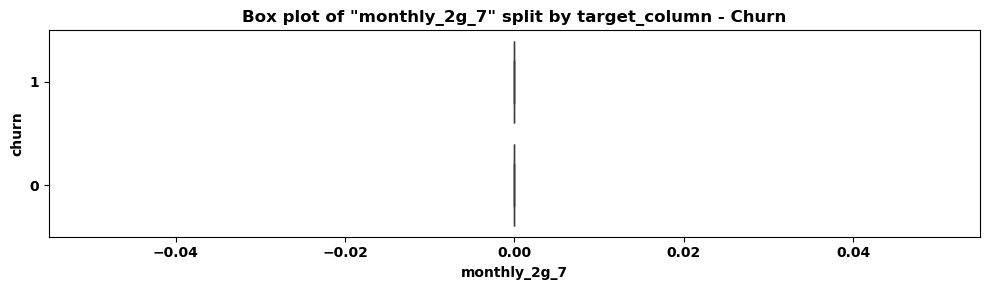

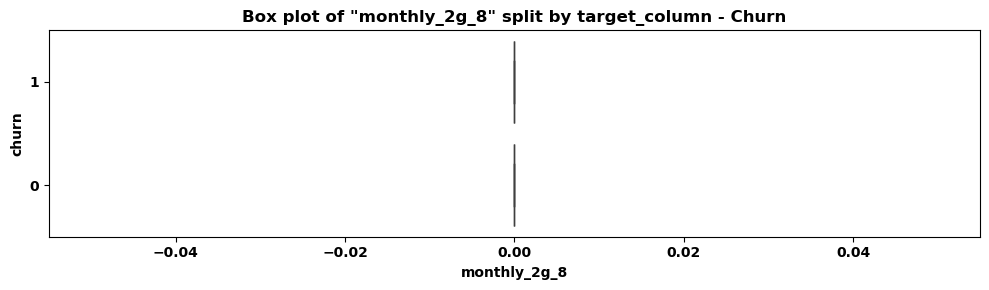

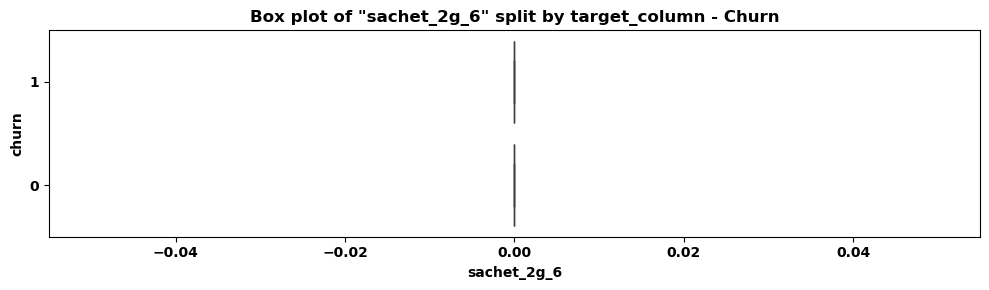

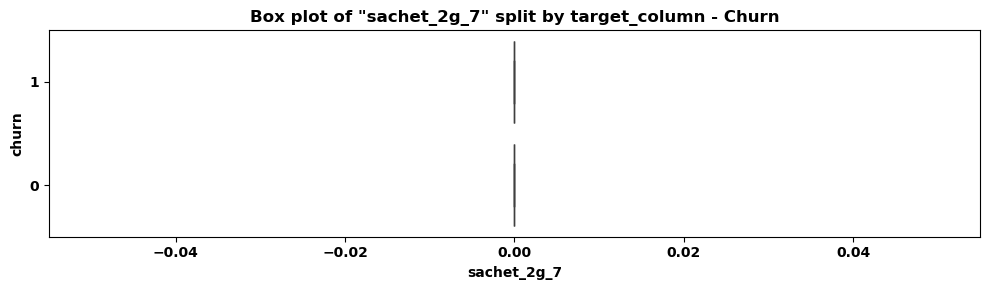

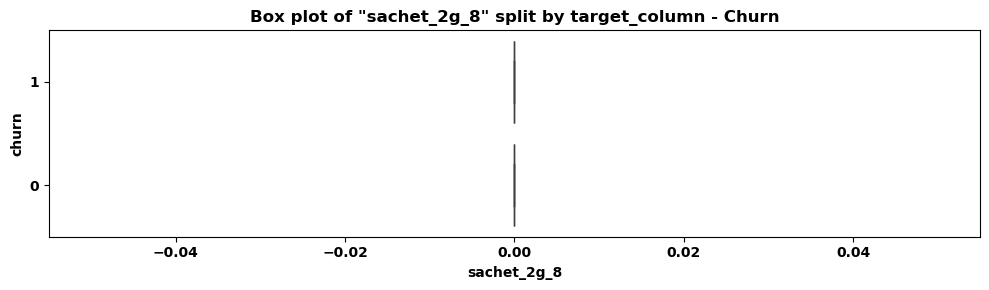

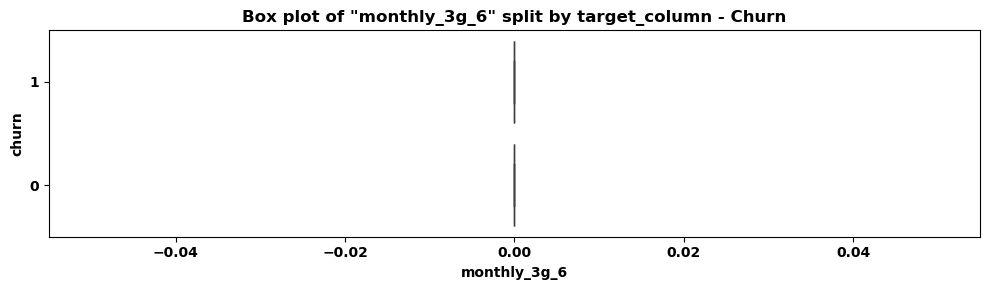

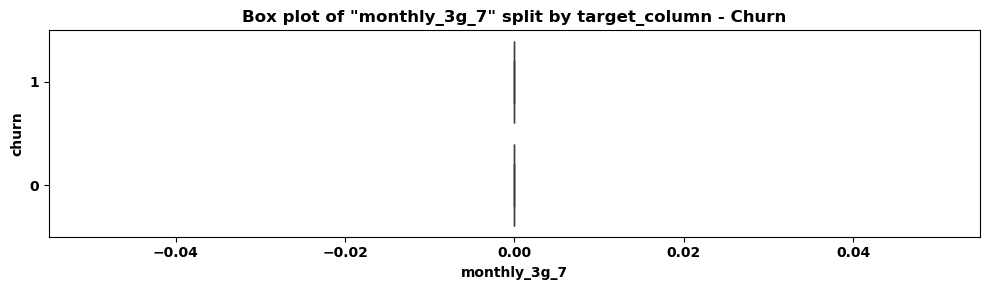

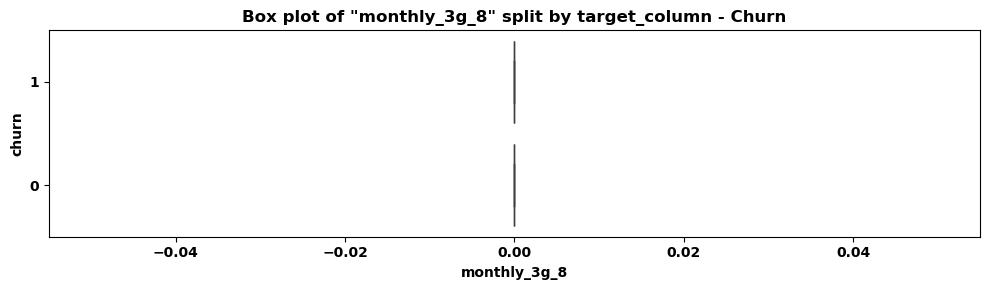

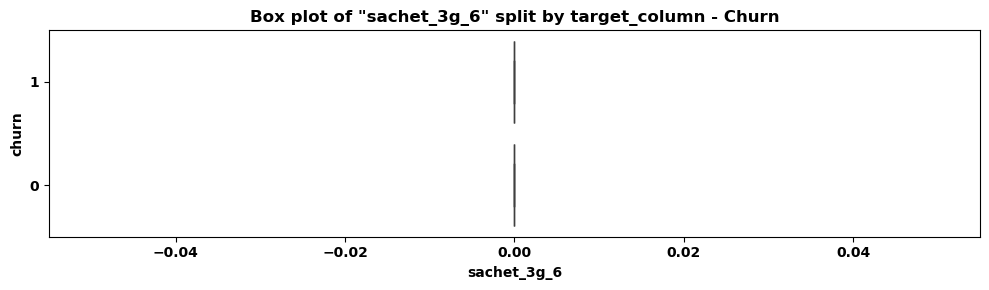

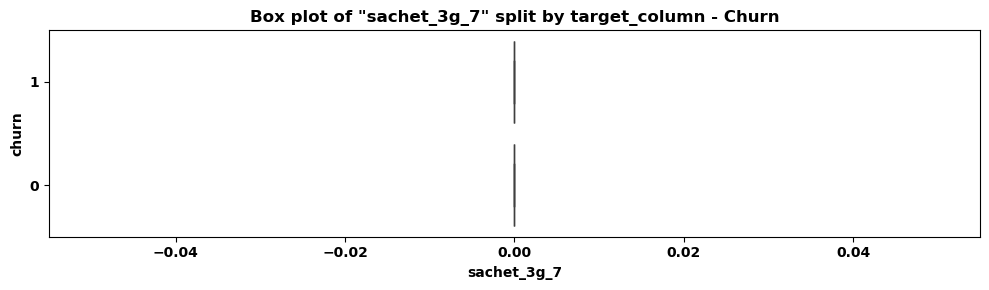

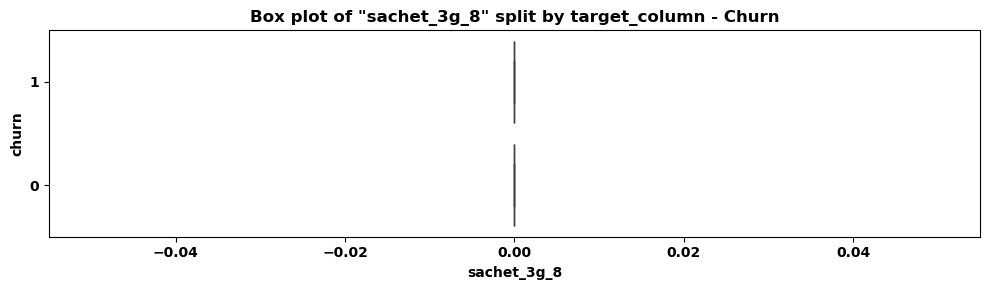

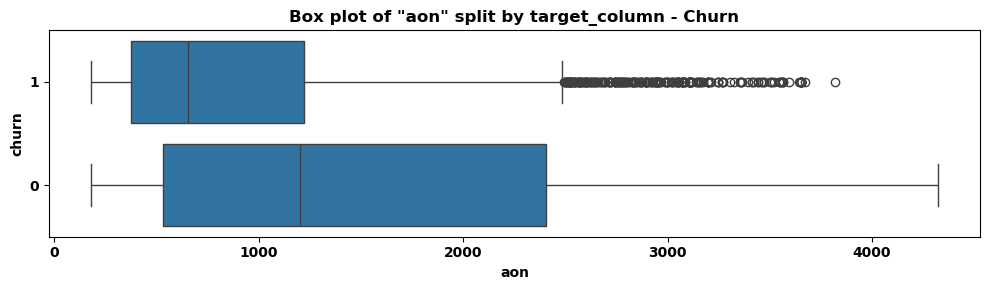

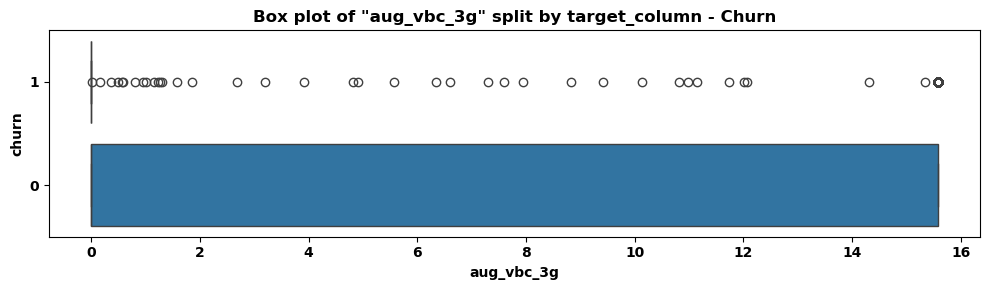

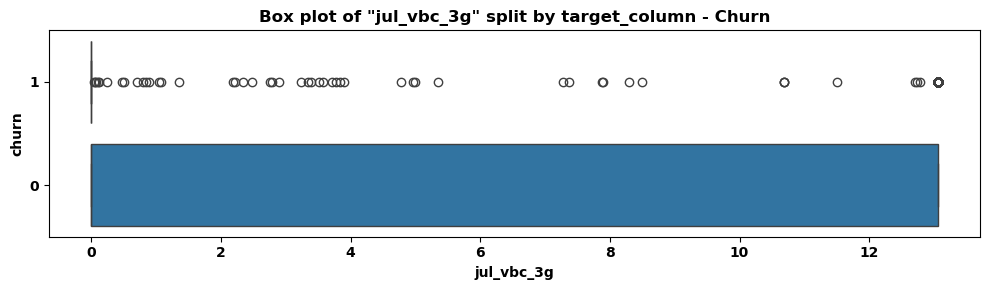

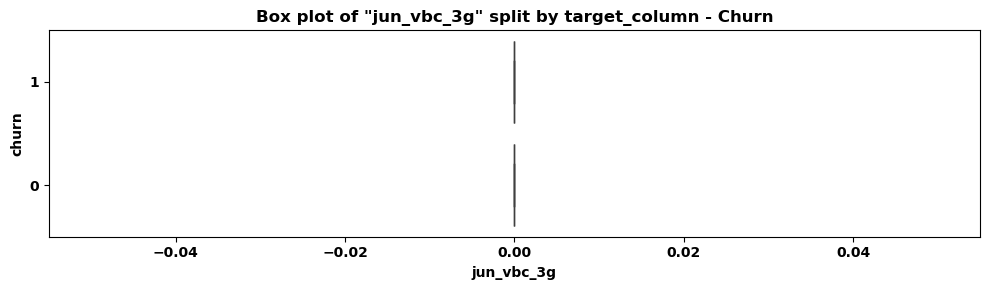

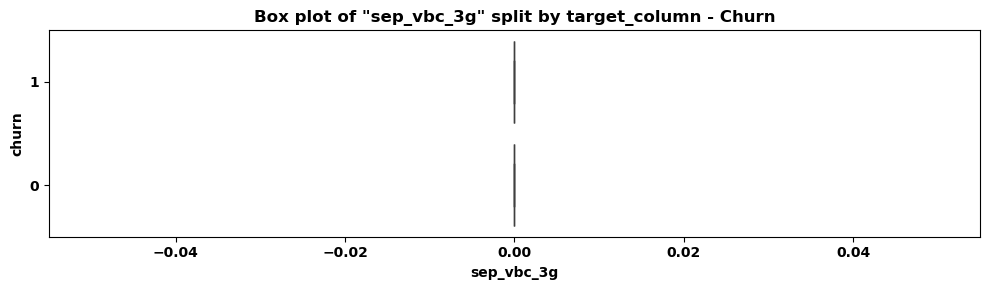

In [72]:
# Ploting all columns in the dataframe after outlier treatment
for column in df.columns:
    if column != 'churn':
        plt.figure(figsize=(10, 3))
        
        # Create a box plot for each numeric column split by the target column
        sns.boxplot(y=df['churn'], x=df[column])
        plt.title(f'Box plot of "{column}" split by target_column - Churn')
        
        plt.tight_layout()
        plt.show()


#### Correlation Check

In [74]:
#Plot a correlation
target_corr = df.corr()['churn'].sort_values(ascending=False)
print(target_corr)


churn                 1.000000
std_og_mou_6          0.079883
std_og_t2t_mou_6      0.056729
std_og_t2m_mou_6      0.050059
total_rech_amt_6      0.022374
arpu_6                0.021771
onnet_mou_6           0.016538
std_og_mou_7          0.012735
std_og_t2t_mou_7      0.009233
total_og_mou_6        0.007368
total_rech_num_6      0.006075
std_ic_t2t_mou_6     -0.004349
std_og_t2m_mou_7     -0.007517
offnet_mou_6         -0.015346
spl_og_mou_6         -0.016593
std_ic_t2m_mou_6     -0.018680
std_ic_mou_6         -0.020743
max_rech_amt_6       -0.026989
spl_og_mou_7         -0.035973
last_day_rch_amt_6   -0.037513
std_ic_t2t_mou_7     -0.037614
onnet_mou_7          -0.038324
vol_2g_mb_6          -0.047857
jul_vbc_3g           -0.063929
std_ic_t2m_mou_7     -0.065707
std_ic_mou_7         -0.066253
arpu_7               -0.068088
total_rech_num_7     -0.069357
total_og_mou_7       -0.073651
total_rech_amt_7     -0.076441
std_ic_t2f_mou_6     -0.080125
offnet_mou_7         -0.081101
vol_2g_m

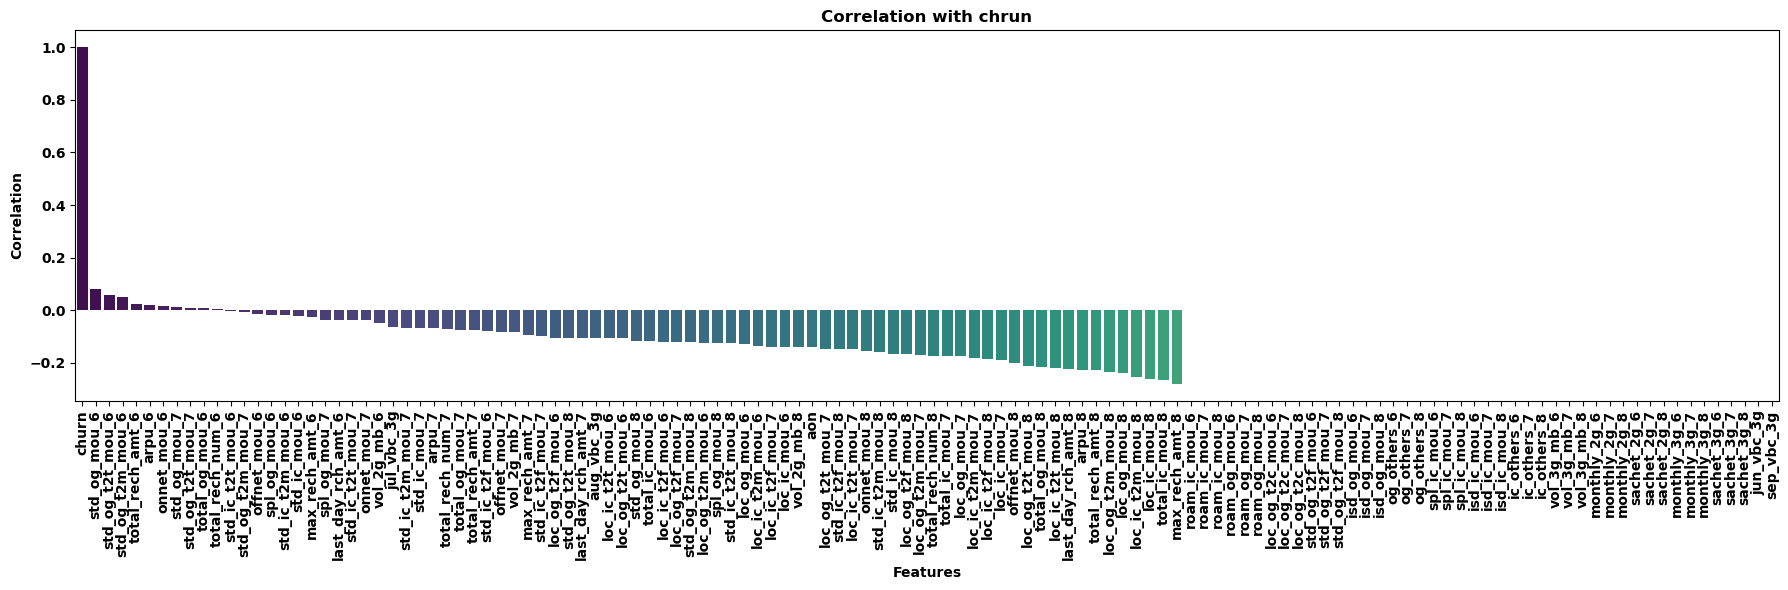

In [84]:
# Calculate correlations with the target variable
correlations = df.corr()['churn'].sort_values(ascending=False)

# Create a bar plot for the correlations
plt.figure(figsize=(18, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title(f'Correlation with chrun')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

## 4. Train Test Split

In [87]:
# Imprting the required libraries
from sklearn.model_selection import train_test_split

In [88]:
# Creating all feature variables to X
X = df.drop('churn', axis = 1)
X.head()

arpu_6    arpu_7       arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803000         0.00         0.00      0.00000   
7   1069.180  1190.460  1171.132625        57.84        54.68     52.29000   
9    119.518   247.435   170.231000        33.89        30.11     22.43000   
13   492.846   205.671   593.260000       501.76       108.39    451.05375   
16   430.975   299.869   187.894000        50.51        74.01     70.61000   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00            0.0            0.0   
7         453.43        567.16        325.91            0.0            0.0   
9          63.48         54.16         78.34            0.0            0.0   
13        413.31        119.28        482.46            0.0            0.0   
16        296.29        229.74        162.76            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             0.0            0.0            0.0            0.0   
7             0.0            0.0            0.0            0.0   
9             0.0            0.0            0.0            0.0   
13            0.0            0.0            0.0            0.0   
16            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
9              33.89             30.11             22.43             38.03   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00             0.000              0.00   
7             447.38            162.28            16.525             16.70   
9              40.06             34.93             0.000              0.00   
13             47.28            294.46             4.540              0.00   
16            145.99            128.28             0.000              4.48   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.000               0.0               0.0               0.0   
7             15.075               0.0               0.0               0.0   
9              0.000               0.0               0.0               0.0   
13            15.075               0.0               0.0               0.0   
16            10.260               0.0               0.0               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00           0.00000   
7         422.16        533.91        255.79           4.30000   
9          71.93         70.18         57.36           0.00000   
13        205.31         53.48        353.99         155.33125   
16        315.91        215.64        205.93           7.89000   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00           0.00000              0.00              0.00   
7              23.29          12.01000             49.89             31.76   
9               0.00           0.00000             25.45             14.09   
13             85.98         114.05625            255.36             52.94   
16              2.58           3.23000             22.99             64.51   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               0.0               0.0               0.0   
7              49.14               0.0               0.0               0.0   
9              43.41               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16      

In [89]:
# Creating the response variable y
y = df['churn'].astype(int)
y.head()

0     1
7     1
9     0
13    0
16    0
Name: churn, dtype: int32

In [90]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify = y, random_state=100)

## 5. Feature scaling

In [96]:
# Imprting the required libraries
from sklearn.preprocessing import StandardScaler

In [97]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, and scale the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame and preserve the column names
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [98]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.475263 -1.086115  2.321558    -0.244374    -0.735246    -0.293288   
1  0.473020  0.806343  0.855202    -0.053560     0.111794     0.053959   
2  0.131123 -0.044274  0.145375     1.009786     1.096738     1.065081   
3 -0.733061 -1.148585 -0.333373    -0.748418    -0.741748    -0.581613   
4  0.381757  0.324158 -0.183942     0.015542    -0.400922     0.328661   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0      0.169377     -0.744500      2.335711            0.0            0.0   
1      0.524478      0.702431      0.703010            0.0            0.0   
2      0.439573      0.685467      0.891040            0.0            0.0   
3     -0.701511     -0.817387      0.369733            0.0            0.0   
4     -0.154608      0.197068     -0.430294            0.0            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0          0.857864         -0.514270          0.562891          1.338754   
1          1.380754          1.756288          1.293225          1.632849   
2          0.593917          1.617298          2.264188          0.153065   
3         -0.616849         -0.532110         -0.168281         -0.375829   
4         -0.716616         -0.539733         -0.807554         -0.453886   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.470340          2.400940         -0.697922         -0.700800   
1          2.155650          1.890695          1.315332          2.114884   
2          1.377367          1.511889          0.442583         -0.543998   
3         -0.525513          1.567345          0.054506         -0.700800   
4         -0.732055         -0.721252          2.102501          2.114884   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.695797               0.0               0.0               0.0   
1          2.080203               0.0               0.0               0.0   
2          0.525091               0.0               0.0               0.0   
3         -0.008932               0.0               0.0               0.0   
4          1.801222               0.0               0.0               0.0   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0      1.012528     -0.568208      2.411048         -0.654842   
1      1.409191      1.891143      1.593840         -0.654842   
2      0.189640      1.258368      1.574756          1.724018   
3     -0.512981     -0.609511      0.894847         -0.634640   
4     -0.526221     -0.667289     -0.743549          1.709994   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         -0.652303         -0.643939         -0.707350         -0.705553   
1         -0.596761         -0.442562         -0.284161         -0.665823   
2          1.920710          1.467817          0.603359          0.731843   
3         -0.652303         -0.643939         -0.707350         -0.705553   
4          0.326073          1.919481          0.822323          1.995974   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.660718               0.0               0.0               0.0   
1         -0.410051               0.0               0.0               0.0   
2          1.131346               0.0               0.0               0.0   
3         -0.697310               0.0               0.0               0.0   
4          0.549215               0.0               0.0               0.0   



## 6. Model building

#### Training a baseline Logistic Regression model to check initial performance.

In [105]:
# importing logistic rgression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [106]:
from sklearn.feature_selection import RFE
# selecting features using RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [107]:
# List of all features from RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 9),
 ('arpu_8', False, 64),
 ('onnet_mou_6', False, 61),
 ('onnet_mou_7', False, 4),
 ('onnet_mou_8', False, 57),
 ('offnet_mou_6', False, 58),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 54),
 ('roam_ic_mou_6', False, 82),
 ('roam_ic_mou_7', False, 84),
 ('roam_ic_mou_8', False, 86),
 ('roam_og_mou_6', False, 88),
 ('roam_og_mou_7', False, 78),
 ('roam_og_mou_8', False, 89),
 ('loc_og_t2t_mou_6', False, 66),
 ('loc_og_t2t_mou_7', False, 28),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 30),
 ('loc_og_t2m_mou_7', False, 2),
 ('loc_og_t2m_mou_8', False, 25),
 ('loc_og_t2f_mou_6', False, 40),
 ('loc_og_t2f_mou_7', False, 41),
 ('loc_og_t2f_mou_8', False, 11),
 ('loc_og_t2c_mou_6', False, 94),
 ('loc_og_t2c_mou_7', False, 108),
 ('loc_og_t2c_mou_8', False, 109),
 ('loc_og_mou_6', False, 29),
 ('loc_og_mou_7', False, 44),
 ('loc_og_mou_8', False, 45),
 ('std_og_t2t_mou_6', False, 26),
 ('std_og_t2t_mou_7', False, 35),
 ('std

In [108]:
# Checking variables selcted by RFE
X_train.columns[rfe.support_]

Index(['arpu_6', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'total_ic_mou_7',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8'],
      dtype='object')

In [109]:
# Assigning all selected columns to col variable
col = X_train.columns[rfe.support_]

In [110]:
# Selecting only the columns selected by RFE
X_train = X_train[col]

In [111]:
# Import statsmodels
import statsmodels.api as sm

In [112]:
# Adding constant variable and reset the indices for X_train and y_train
X_train_sm = sm.add_constant(X_train).reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [113]:
# Fit a logistic Regression model on X_train, also adding a constant
logRm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logRm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20960
Model:                            GLM   Df Residuals:                    20944
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3982.2
Date:                Mon, 09 Sep 2024   Deviance:                       7964.4
Time:                        22:46:47   Pearson chi2:                 1.55e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1898
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1115      0.072    -57.015      0.000      -4.253      -3.970
arpu_6                 0.3361      0.033     10.257      0.000       0.272       0.400
offnet_mou_7           0.1432      0.039      3.687      0.000       0.067       0.219
loc_og_t2t_mou_8      -0.3010      0.080     -3.747      0.000      -0.458      -0.144
total_og_mou_8        -0.6186      0.061    -10.109      0.000      -0.739      -0.499
loc_ic_t2t_mou_8      -0.4365      0.082     -5.324      0.000      -0.597      -0.276
loc_ic_t2m_mou_8      -1.4096      0.097    -14.599      0.000      -1.599      -1.220
loc_ic_t2f_mou_8      -0.3515      0.063     -5.616      0.000      -0.474      -0.229
std_ic_t2m_mou_8      -0.3978      0.048     -8.303      0.000      -0.492      -0.304
std_ic_t2f_mou_8      -0.3087      0.052     -5.921      0.000      -0.411      -0.207
total_ic_mou_7         0.4148      0.051      8.186      0.000       0.315       0.514
total_rech_num_8      -0.3892      0.059     -6.626      0.000      -0.504      -0.274
total_rech_amt_8       0.6460      0.082      7.865      0.000       0.485       0.807
max_rech_amt_8        -0.4049      0.050     -8.179      0.000      -0.502      -0.308
last_day_rch_amt_8    -0.6149      0.051    -11.956      0.000      -0.716      -0.514
vol_2g_mb_8           -0.6457      0.052    -12.322      0.000      -0.748      -0.543
======================================================================================
"""

In [114]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11    total_rech_amt_8  5.79
10    total_rech_num_8  3.22
3       total_og_mou_8  3.16
9       total_ic_mou_7  2.74
4     loc_ic_t2t_mou_8  2.51
12      max_rech_amt_8  2.38
2     loc_og_t2t_mou_8  2.35
5     loc_ic_t2m_mou_8  2.29
1         offnet_mou_7  2.03
13  last_day_rch_amt_8  1.79
0               arpu_6  1.62
6     loc_ic_t2f_mou_8  1.38
7     std_ic_t2m_mou_8  1.25
14         vol_2g_mb_8  1.25
8     std_ic_t2f_mou_8  1.17

#### The VIF factors look fine except that the variable 'total_rech_amt_8' has slightly higher value. this may require attention. however we'll just go with model evaluation to check how the baseline model performs and this will surely require finetuing with class imbalance treatment

## 7. Model Evaluation

In [145]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)

# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_Prob':y_train_pred})
y_train_pred_final.head(10)

# Creating a new column as 0 or 1, 1 if probability is more than 50%, an arbitrary cut-off
y_train_pred_final['Predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

churn  churn_Prob  Predicted
0      0    0.003315          0
1      0    0.000501          0
2      0    0.004816          0
3      0    0.008033          0
4      0    0.003791          0

### Evaluate the model using Metrics

In [148]:
# Import metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [149]:
print ('Accuracy: ', accuracy_score(y_train_pred_final.churn, y_train_pred_final.Predicted))
print ('F1 score: ', f1_score(y_train_pred_final.churn, y_train_pred_final.Predicted))
print ('Recall: ', recall_score(y_train_pred_final.churn, y_train_pred_final.Predicted))
print ('Precision: ', precision_score(y_train_pred_final.churn, y_train_pred_final.Predicted))
print ('\n clasification report:\n', classification_report(y_train_pred_final.churn, y_train_pred_final.Predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_train_pred_final.churn, y_train_pred_final.Predicted))

Accuracy:  0.927337786259542
F1 score:  0.4158036056770234
Recall:  0.29763866007688083
Precision:  0.6895674300254453

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     19139
           1       0.69      0.30      0.42      1821

    accuracy                           0.93     20960
   macro avg       0.81      0.64      0.69     20960
weighted avg       0.92      0.93      0.91     20960


 confussion matrix:
 [[18895   244]
 [ 1279   542]]


#### Model performance is not good and clearly not predicting the positive class, especially the Recall is quite low - ~30%. We'll surely need to perform a class imbalance treatment to ensure the minority class is given required weightage


## 8. Class imbalance

#### We'll use SMOTE ( Synthetic minority oversampling ) approach to treat class imbalance

In [155]:
# checking the distribution of churn 
df['churn'].value_counts()

churn
0    27342
1     2602
Name: count, dtype: int64

In [156]:
round(df['churn'].value_counts(normalize = True)*100,2)

churn
0    91.31
1     8.69
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Class Distributions \n (0 : No churn || 1 : Churn)')

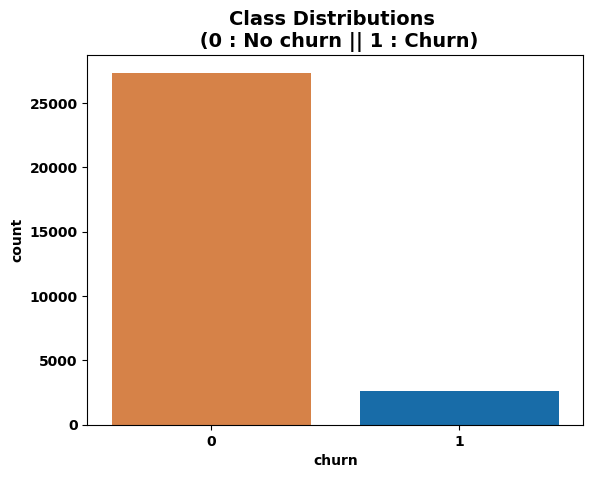

In [157]:
# Plot the distribution of churn to see the class balance
colors = ["#ED7D31","#0070C0"]
sns.countplot(x='churn', data=df, palette=colors,  order=[0, 1])
plt.title('Class Distributions \n (0 : No churn || 1 : Churn)', fontsize=14)

In [158]:
# Apllying SMOTE for treating class imbalance
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
print(len(X_resampled))

38278


In [159]:
#Counting the records after the treament
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 19139), (1, 19139)]


## Model Building using the resampled dataset

In [166]:
# Fit a logistic Regression model on X_train resampled dataset
X_resampled_sm = sm.add_constant(X_resampled)
logRm = sm.GLM(y_resampled, X_resampled_sm, family = sm.families.Binomial())
res = logRm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38278
Model:                            GLM   Df Residuals:                    38262
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15487.
Date:                Mon, 09 Sep 2024   Deviance:                       30974.
Time:                        22:49:24   Pearson chi2:                 6.34e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4385
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5733      0.024    -65.518      0.000      -1.620      -1.526
arpu_6                 0.4073      0.017     23.308      0.000       0.373       0.442
offnet_mou_7           0.2138      0.020     10.483      0.000       0.174       0.254
loc_og_t2t_mou_8      -0.2807      0.032     -8.862      0.000      -0.343      -0.219
total_og_mou_8        -0.6638      0.028    -23.509      0.000      -0.719      -0.608
loc_ic_t2t_mou_8      -0.3892      0.033    -11.667      0.000      -0.455      -0.324
loc_ic_t2m_mou_8      -1.2759      0.037    -34.807      0.000      -1.348      -1.204
loc_ic_t2f_mou_8      -0.3983      0.025    -15.662      0.000      -0.448      -0.348
std_ic_t2m_mou_8      -0.3480      0.020    -17.055      0.000      -0.388      -0.308
std_ic_t2f_mou_8      -0.2155      0.021    -10.078      0.000      -0.257      -0.174
total_ic_mou_7         0.5024      0.028     17.890      0.000       0.447       0.557
total_rech_num_8      -0.3073      0.028    -10.909      0.000      -0.363      -0.252
total_rech_amt_8       0.5567      0.039     14.341      0.000       0.481       0.633
max_rech_amt_8        -0.2676      0.024    -11.369      0.000      -0.314      -0.221
last_day_rch_amt_8    -0.5915      0.022    -27.243      0.000      -0.634      -0.549
vol_2g_mb_8           -0.6458      0.021    -31.205      0.000      -0.686      -0.605
======================================================================================
"""

## Model evaluation

In [168]:
# Predicting the probabilities on the resampled train set
y_train_pred = res.predict(X_resampled_sm)

# Create a new dataframe containing the actual Churn flag and the probabilities predicted by the model using resmapled data
y_train_pred_final = pd.DataFrame({'churn':y_resampled.values, 'churn_Prob':y_train_pred})

# Creating a new column as 0 or 1, 1 if probability is more than 50%, an arbitrary cut-off
y_train_pred_final['Predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

churn  churn_Prob  Predicted
0      0    0.035102          0
1      0    0.012397          0
2      0    0.069425          0
3      0    0.074892          0
4      0    0.060480          0

In [169]:
# Displaying the model perfromance metrix
print ('Accuracy: ', accuracy_score(y_train_pred_final.churn, y_train_pred_final.Predicted))
print ('F1 score: ', f1_score(y_train_pred_final.churn, y_train_pred_final.Predicted))
print ('Recall: ', recall_score(y_train_pred_final.churn, y_train_pred_final.Predicted))
print ('Precision: ', precision_score(y_train_pred_final.churn, y_train_pred_final.Predicted))
print ('\n clasification report:\n', classification_report(y_train_pred_final.churn, y_train_pred_final.Predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_train_pred_final.churn, y_train_pred_final.Predicted))

Accuracy:  0.8263754637128377
F1 score:  0.8281621677526114
Recall:  0.8367730811432155
Precision:  0.8197266724676255

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82     19139
           1       0.82      0.84      0.83     19139

    accuracy                           0.83     38278
   macro avg       0.83      0.83      0.83     38278
weighted avg       0.83      0.83      0.83     38278


 confussion matrix:
 [[15617  3522]
 [ 3124 16015]]


#### Model performance seems to have improved, Overall all performance metrics seem to be good on this training data (recall at 83% ), We'll need to test the model performance on the test set to observe the actual performance

### Prediction on the test set

In [175]:
#Predicting the y_test using X_test
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.905540  0.746177 -0.551458    -0.820231    -0.309657    -0.657662   
1  1.338554  1.296849  0.775406     2.149637     2.125318     2.136803   
2  0.576950  0.591285  0.259356     0.563122     0.227354     0.168363   
3  0.182823 -0.752264 -0.095771     1.559192     0.082121     1.101122   
4 -0.097091  0.837590  0.863093    -0.742762     0.112977     0.133777   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.477685      2.299684      0.145920            0.0            0.0   
1      2.304074      1.997734      0.500940            0.0            0.0   
2      0.706703      0.644755      0.545523            0.0            0.0   
3      0.779003     -0.231941      0.049519            0.0            0.0   
4      0.688723      1.244517      1.481841            0.0            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.790069         -0.065024         -0.738126         -0.709197   
1          0.773111          1.589727         -0.397191          0.889316   
2          2.257812          2.126876          1.733606          2.157542   
3         -0.603611         -0.648395         -0.557177         -0.371769   
4         -0.507880          1.374348          1.645899          2.257301   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.088590         -0.782010         -0.697922         -0.463068   
1          0.936766         -0.738950          1.938967          2.114884   
2          1.850575          1.706200         -0.697922         -0.356848   
3         -0.650499         -0.446695         -0.697922         -0.700800   
4          2.380530          2.400940         -0.125128         -0.515336   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.695797               0.0               0.0               0.0   
1         -0.220700               0.0               0.0               0.0   
2         -0.695797               0.0               0.0               0.0   
3         -0.695797               0.0               0.0               0.0   
4         -0.380907               0.0               0.0               0.0   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     -0.801697     -0.182603     -0.827943         -0.605088   
1      0.764774      1.132834     -0.691622          1.938584   
2      2.180405      1.719804      1.503038         -0.654842   
3     -0.527003     -0.724743     -0.556526          1.938584   
4      1.242398      2.220222      2.411048         -0.654842   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0          0.093134         -0.317376          0.468693          1.995974   
1          1.920710          1.919481          2.025988          1.995974   
2         -0.652303         -0.643939         -0.527301         -0.145342   
3          1.814087          1.919481          2.025988          1.180421   
4         -0.197197         -0.643939         -0.679781         -0.106044   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0          1.998749               0.0               0.0               0.0   
1          0.095824               0.0               0.0               0.0   
2         -0.415794               0.0               0.0               0.0   
3          1.426484               0.0               0.0               0.0   
4          0.000872               0.0               0.0               0.0   



In [176]:
#RFE Supported columns assigned to test set
X_test = X_test[col]

In [177]:
# Adding constant and predicting on the test set
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [178]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
0  0.876794
1  0.212506
2  0.072758
3  0.510119
4  0.006047

In [179]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [180]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test, y_pred_1],axis=1)

In [181]:
y_pred_final.head()

churn         0
0      1  0.876794
1      0  0.212506
2      0  0.072758
3      0  0.510119
4      0  0.006047

In [182]:
# Renaming the column, creating flagging the churn based on the probability score. 50% is used as a cut-off
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_Prob'})
y_pred_final['final_predicted'] = y_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

churn  churn_Prob  final_predicted
0      1    0.876794                1
1      0    0.212506                0
2      0    0.072758                0
3      0    0.510119                1
4      0    0.006047                0

In [183]:
# Displaying the model performance scores
print ('Accuracy: ', accuracy_score(y_pred_final.churn, y_pred_final.final_predicted))
print ('F1 score: ', f1_score(y_pred_final.churn, y_pred_final.final_predicted))
print ('Recall: ', recall_score(y_pred_final.churn, y_pred_final.final_predicted))
print ('Precision: ', precision_score(y_pred_final.churn, y_pred_final.final_predicted))
print ('\n clasification report:\n', classification_report(y_pred_final.churn, y_pred_final.final_predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted))

Accuracy:  0.8272484416740873
F1 score:  0.46111111111111114
Recall:  0.8501920614596671
Precision:  0.31634111481657934

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8203
           1       0.32      0.85      0.46       781

    accuracy                           0.83      8984
   macro avg       0.65      0.84      0.68      8984
weighted avg       0.93      0.83      0.86      8984


 confussion matrix:
 [[6768 1435]
 [ 117  664]]


#### Model perfromance on the test set doesnt seem satisfacoty given the below reasons,
#### The model seem to have overfit on the training data
* Accuracy: Model has a decent overall prediction capability, but might be driven by the majority class (non-churners).
* F1 Score: Whows a weak balance between precision and recall.
* Recall: Model is good at flagging churners who are actual churners
* Precision: Low score indicates that many non-churners are being misclassified as churners

## Using Decision Tree model

In [389]:
# Test rrain split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [390]:
X_train.shape, X_test.shape

((20960, 145), (8984, 145))

In [196]:
# Imprting the required libraries
from sklearn.tree import DecisionTreeClassifier

In [197]:
# Initializing a decision tree classifier
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [198]:
# Predicting on the train data and test data
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [199]:
# Imprting the required libraries for classification report
from sklearn.metrics import classification_report

In [200]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8183
           1       0.75      0.61      0.68       801

    accuracy                           0.95      8984
   macro avg       0.86      0.80      0.82      8984
weighted avg       0.94      0.95      0.95      8984



In [201]:
from sklearn.metrics import roc_curve, RocCurveDisplay

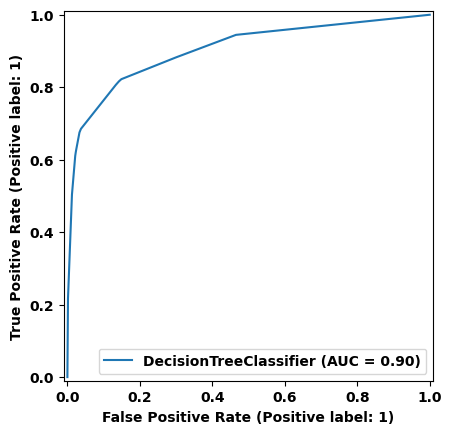

In [202]:
# Plotting the ROC curve using the prediction on train set
RocCurveDisplay.from_estimator(dt_base, X=X_train, y=y_train, drop_intermediate=False)

#### The performance on the test class doesnt look great, with just 61% recall. We may require to improvise the model using hyperparameter tuning using gridsearchcv

### HyperParameter tuning using GridSerachCV

In [214]:
# Imprting the required libraries and initializing a dt classifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [215]:
# Defining the parameters
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [216]:
# initializing the gridserachcv 
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [217]:
%%time
grid_search.fit(X_train, y_train) # fitting the model using GridSearchCV

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 21.1 s
Wall time: 52.9 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='f1', verbose=1)

In [218]:
# Checking the best score
grid_search.best_score_

0.6448867171490402

In [219]:
# Finding the best model parameter
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

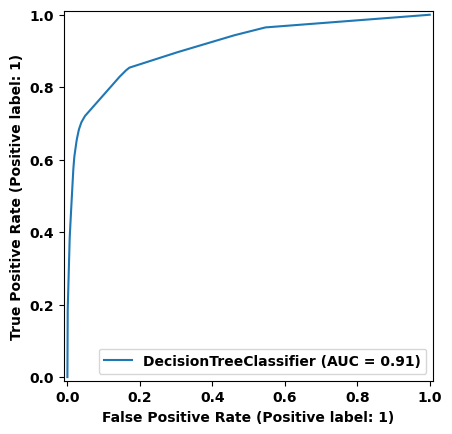

In [220]:
# Plotting a ROC curve using the predicted train set
RocCurveDisplay.from_estimator(dt_best, X=X_train, y=y_train, drop_intermediate=False)

In [228]:
# Predict on the train data using the best estimator
best_dt_model = grid_search.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_train)

In [230]:
# Print classificaction report on train prediction
print(classification_report(y_train, y_pred_best_dt))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     19159
           1       0.75      0.61      0.67      1801

    accuracy                           0.95     20960
   macro avg       0.86      0.79      0.82     20960
weighted avg       0.95      0.95      0.95     20960



In [232]:
# Predict on the test data using the best estimator
best_dt_model = grid_search.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

In [234]:
# Print classificaction report on train prediction
print(classification_report(y_test, y_pred_best_dt))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8183
           1       0.75      0.59      0.66       801

    accuracy                           0.95      8984
   macro avg       0.86      0.79      0.82      8984
weighted avg       0.94      0.95      0.94      8984



#### The performance on model does not seem satisfactory based on the results

#### We'll run a Random forest model and perfrom hyperparameter tuning using GridSerachCV, as Randomforest is effective against overfitting and can handle  class imbalanced data to some extent

## Using Random Forest Classifier

In [249]:
# import the required libraries
from sklearn.ensemble import RandomForestClassifier 

In [608]:
# instantiate a Random forest classsifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [612]:
%%time
rf.fit(X_train, y_train)  # fitting a random forest classifier

CPU times: total: 203 ms
Wall time: 421 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [614]:
rf.oob_score_

0.9446564885496184

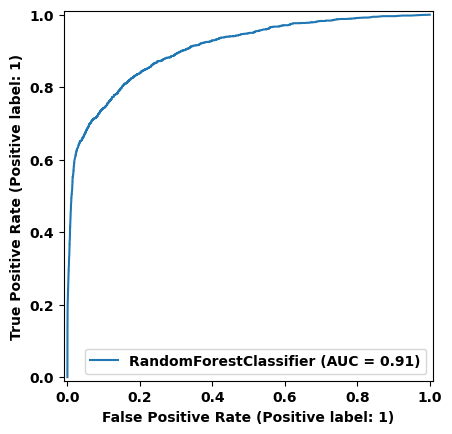

In [616]:
# plotting ROC curve using the predicted train data
RocCurveDisplay.from_estimator(rf, X=X_train, y=y_train, drop_intermediate=False)

#### Hyper-parameter tuning using GridSearch

In [620]:
# initializing a random forest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [622]:
# defining parameters
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [628]:
# intializing gridserachcv
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [630]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: total: 2min 18s
Wall time: 10min 57s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='f1', verbose=1)

In [632]:
# displaying best score
grid_search.best_score_

0.6559292195022284

In [641]:
# displaying the best model parameters
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [660]:
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}


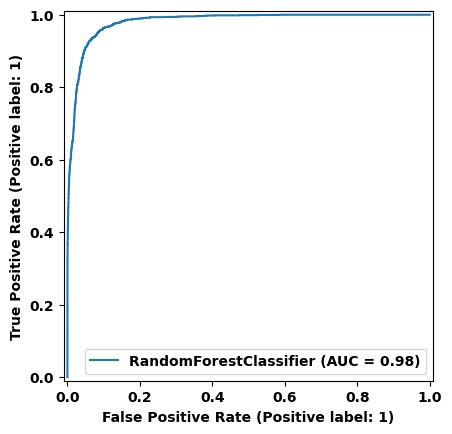

In [643]:
# plotting ROC curve using predicted train data
RocCurveDisplay.from_estimator(rf_best, X=X_train, y=y_train, drop_intermediate=False)

#### The best score is 65% recall and therefore the model needs imrovement

## Using Random Forest Classifier with calss weight balanced

In [647]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

In [662]:
# instantiate a Random forest classsifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced', oob_score=True, n_jobs=-1)

In [664]:
# Defining the parameters
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [666]:
# initializing the GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [668]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: total: 2min 17s
Wall time: 11min 9s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='f1', verbose=1)

In [670]:
# displaying best score
grid_search.best_score_

0.6638355308057476

In [672]:
# Best parameters from grid search
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best Parameters found by GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}


In [676]:
# Predict on the test data using the best estimator
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

In [678]:
# Evaluate the tuned model
print("Random Forest Test Set Performance:")
print(classification_report(y_test, y_pred_best_rf))

Tuned Random Forest Test Set Performance:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8183
           1       0.67      0.69      0.68       801

    accuracy                           0.94      8984
   macro avg       0.82      0.83      0.82      8984
weighted avg       0.94      0.94      0.94      8984



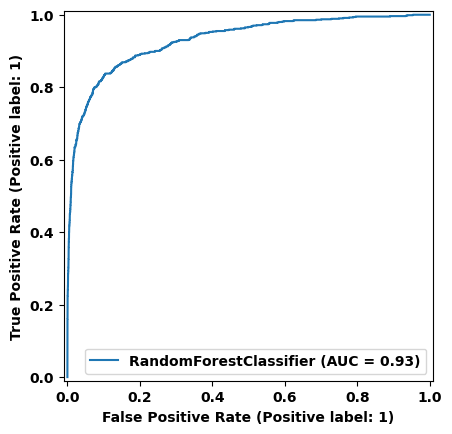

In [682]:
# Plotting ROC using the predicted test data
RocCurveDisplay.from_estimator(best_rf_model, X=X_test, y=y_test, drop_intermediate=False)

### The model performance has slightly improved, especially the recall % is improved to 69% for the positive class. Neverthless the overall prediction power on the positive class seem quite low

## Using Random Forest Classifier with resampled data using SMOTE

In [407]:
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
print(len(X_resampled))

38318


In [409]:
X_resampled.shape, y_resampled.shape

((38318, 125), (38318,))

In [411]:
# instantiate a Random forest classsifier
rf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1)

In [413]:
#Paramters are manually redefined based on couple of iteration ( reduced for model execution time saving )
params = {
    'max_depth': [5,20,30,40],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [ 100,200]
}

In [415]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [417]:
%%time
grid_search.fit(X_resampled, y_resampled)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
CPU times: total: 2min 27s
Wall time: 22min 38s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 20, 30, 40],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [419]:
grid_search.best_score_

0.9530814207341892

In [421]:
# Best parameters from grid search
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best Parameters found by GridSearchCV:
{'max_depth': 40, 'min_samples_leaf': 5, 'n_estimators': 200}


#### Prediction on the train set

In [423]:
# Predict on the train data using the best estimator
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_resampled)

In [425]:
# Evaluate the tuned model on test data
print("Random Forest train Set Performance:")
print(classification_report(y_resampled, y_pred_best_rf))

Random Forest train Set Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19159
           1       0.98      0.99      0.98     19159

    accuracy                           0.98     38318
   macro avg       0.98      0.98      0.98     38318
weighted avg       0.98      0.98      0.98     38318



#### Prediction on the test set

In [427]:
# Predict on the test data using the best estimator
y_pred_best_rf = best_rf_model.predict(X_test)

In [429]:
# Evaluate the tuned model train data
print("Random Forest Test Set Performance:")
print(classification_report(y_test, y_pred_best_rf))

Random Forest Test Set Performance:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8183
           1       0.63      0.70      0.66       801

    accuracy                           0.94      8984
   macro avg       0.80      0.83      0.81      8984
weighted avg       0.94      0.94      0.94      8984



#### The overall model is clearly overfitting the train data. Performance on the test set is quite low compared to the train performance. 
#### this could be potentially adressed using the following measures
* Reduce the tree depth
* control minumum sample for split, 
* control minumum sample per leaf, increase the value 
* Limit the estimators

## Hyperparameter tuning to reduce overfitting

In [452]:
#Paramters are manually redefined based on couple of iteration ( reduced for model execution time saving )
params = {
    'max_depth': [3,4,5],
    'min_samples_leaf': [25,50],
    'n_estimators': [50,100]
}

In [454]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [456]:
%%time
grid_search.fit(X_resampled, y_resampled)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
CPU times: total: 28.2 s
Wall time: 2min 28s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [25, 50],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [458]:
grid_search.best_score_

0.8591173616860743

In [460]:
# Best parameters from grid search
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best Parameters found by GridSearchCV:
{'max_depth': 5, 'min_samples_leaf': 25, 'n_estimators': 50}


#### Prediction on the train set

In [462]:
# Predict on the train data using the best estimator
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_resampled)

In [464]:
# Evaluate the tuned model on test data
print("Random Forest train Set Performance:")
print(classification_report(y_resampled, y_pred_best_rf))

Random Forest train Set Performance:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     19159
           1       0.92      0.81      0.86     19159

    accuracy                           0.87     38318
   macro avg       0.87      0.87      0.87     38318
weighted avg       0.87      0.87      0.87     38318



#### Prediction on the test set

In [466]:
# Predict on the test data using the best estimator
y_pred_best_rf = best_rf_model.predict(X_test)

In [468]:
# Evaluate the tuned model train data
print("Random Forest Test Set Performance:")
print(classification_report(y_test, y_pred_best_rf))

Random Forest Test Set Performance:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8183
           1       0.49      0.77      0.60       801

    accuracy                           0.91      8984
   macro avg       0.73      0.84      0.77      8984
weighted avg       0.93      0.91      0.92      8984



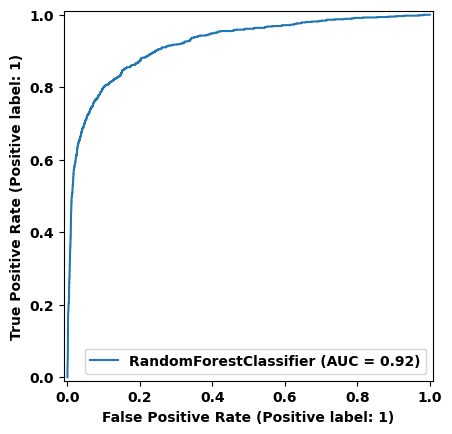

In [470]:
RocCurveDisplay.from_estimator(best_rf_model, X=X_test, y=y_test, drop_intermediate=False)

#### The model is not not overfitting, gives quite simliar performance on the train and test data. we might however want to try improving the prediction on the positive class. we'll also try some feature engineering techniques to improve model performance

## Feature engineering to improve the model performance

#### Some additonal features can be derived - such as % change compared to prev month, and variance/volatility measure for some high important features ( based on previous random forest model )

In [580]:
df_new = df.copy()  # Creates a deep copy of the original dataframe

In [582]:
# List of important variables from previous model output and and their previous month counterparts to be compared
imp_features = ['loc_ic_mou',
                'total_ic_mou',
                'loc_ic_t2m_mou',
                'loc_og_mou',
                'total_rech_amt',
                'loc_og_t2m_mou',
                'total_og_mou',
                'loc_og_t2t_mou',
                'max_rech_amt',
                'loc_ic_t2t_mou']

#### Derived new features 1
### % Change from prev month

In [584]:
# Loop through the important variables to calculate the percentage change, for prev month val 0 replacing the error with 0.00001
for var in imp_features:
    df_new[f'{var}_%_change'] = np.where(df_new[f'{var}_7'] != 0, (df_new[f'{var}_8'] - df_new[f'{var}_7']) / df_new[f'{var}_7'], 0.00001)


In [586]:
df_new.head()

arpu_6    arpu_7       arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803000         0.00         0.00      0.00000   
7   1069.180  1190.460  1171.132625        57.84        54.68     52.29000   
9    119.518   247.435   170.231000        33.89        30.11     22.43000   
13   492.846   205.671   593.260000       501.76       108.39    451.05375   
16   430.975   299.869   187.894000        50.51        74.01     70.61000   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00            0.0            0.0   
7         453.43        567.16        325.91            0.0            0.0   
9          63.48         54.16         78.34            0.0            0.0   
13        413.31        119.28        482.46            0.0            0.0   
16        296.29        229.74        162.76            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             0.0            0.0            0.0            0.0   
7             0.0            0.0            0.0            0.0   
9             0.0            0.0            0.0            0.0   
13            0.0            0.0            0.0            0.0   
16            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
9              33.89             30.11             22.43             38.03   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00             0.000              0.00   
7             447.38            162.28            16.525             16.70   
9              40.06             34.93             0.000              0.00   
13             47.28            294.46             4.540              0.00   
16            145.99            128.28             0.000              4.48   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.000               0.0               0.0               0.0   
7             15.075               0.0               0.0               0.0   
9              0.000               0.0               0.0               0.0   
13            15.075               0.0               0.0               0.0   
16            10.260               0.0               0.0               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00           0.00000   
7         422.16        533.91        255.79           4.30000   
9          71.93         70.18         57.36           0.00000   
13        205.31         53.48        353.99         155.33125   
16        315.91        215.64        205.93           7.89000   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00           0.00000              0.00              0.00   
7              23.29          12.01000             49.89             31.76   
9               0.00           0.00000             25.45             14.09   
13             85.98         114.05625            255.36             52.94   
16              2.58           3.23000             22.99             64.51   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               0.0               0.0               0.0   
7              49.14               0.0               0.0               0.0   
9              43.41               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16      

In [588]:
df_new[['total_ic_mou_7','total_ic_mou_8','total_ic_mou_%_change']].head()

total_ic_mou_7  total_ic_mou_8  total_ic_mou_%_change
0             0.00         5.44000               0.000010
7           558.04       428.74000              -0.231704
9           327.31       219.86000              -0.328282
13          172.58       776.81875               3.501210
16          381.56       294.46000              -0.228273

In [590]:
df_new[['total_ic_mou_7','total_ic_mou_8','total_ic_mou_%_change']].describe()

total_ic_mou_7  total_ic_mou_8  total_ic_mou_%_change
count    29944.000000    29944.000000           29944.000000
mean       251.143628      240.813008               0.440759
std        225.283178      224.030376              13.622081
min          0.000000        0.000000              -1.000000
25%         77.510000       64.475000              -0.299108
50%        185.190000      176.735000              -0.014960
75%        361.952500      349.412500               0.254111
max        788.616250      776.818750            1581.770833

#### Derived new features 2
### Variance / valatility over the last 3 months

In [493]:
# Loop through the important variables to calculate the percentage change, for prev month val 0 replacing the error with 0.00001
for var in imp_features:
    df_new[f'{var}_678_var'] = df[[f'{var}_6', f'{var}_7',f'{var}_8']].var(axis=1)
    

In [495]:
 df_new.head()

arpu_6    arpu_7       arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803000         0.00         0.00      0.00000   
7   1069.180  1190.460  1171.132625        57.84        54.68     52.29000   
9    119.518   247.435   170.231000        33.89        30.11     22.43000   
13   492.846   205.671   593.260000       501.76       108.39    451.05375   
16   430.975   299.869   187.894000        50.51        74.01     70.61000   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00            0.0            0.0   
7         453.43        567.16        325.91            0.0            0.0   
9          63.48         54.16         78.34            0.0            0.0   
13        413.31        119.28        482.46            0.0            0.0   
16        296.29        229.74        162.76            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             0.0            0.0            0.0            0.0   
7             0.0            0.0            0.0            0.0   
9             0.0            0.0            0.0            0.0   
13            0.0            0.0            0.0            0.0   
16            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
9              33.89             30.11             22.43             38.03   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00             0.000              0.00   
7             447.38            162.28            16.525             16.70   
9              40.06             34.93             0.000              0.00   
13             47.28            294.46             4.540              0.00   
16            145.99            128.28             0.000              4.48   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.000               0.0               0.0               0.0   
7             15.075               0.0               0.0               0.0   
9              0.000               0.0               0.0               0.0   
13            15.075               0.0               0.0               0.0   
16            10.260               0.0               0.0               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00           0.00000   
7         422.16        533.91        255.79           4.30000   
9          71.93         70.18         57.36           0.00000   
13        205.31         53.48        353.99         155.33125   
16        315.91        215.64        205.93           7.89000   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00           0.00000              0.00              0.00   
7              23.29          12.01000             49.89             31.76   
9               0.00           0.00000             25.45             14.09   
13             85.98         114.05625            255.36             52.94   
16              2.58           3.23000             22.99             64.51   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               0.0               0.0               0.0   
7              49.14               0.0               0.0               0.0   
9              43.41               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16      

### Splitting X,y

In [497]:
# Creating all feature variables to X
X_new = df_new.drop('churn', axis = 1)
X_new.head()

arpu_6    arpu_7       arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803000         0.00         0.00      0.00000   
7   1069.180  1190.460  1171.132625        57.84        54.68     52.29000   
9    119.518   247.435   170.231000        33.89        30.11     22.43000   
13   492.846   205.671   593.260000       501.76       108.39    451.05375   
16   430.975   299.869   187.894000        50.51        74.01     70.61000   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00            0.0            0.0   
7         453.43        567.16        325.91            0.0            0.0   
9          63.48         54.16         78.34            0.0            0.0   
13        413.31        119.28        482.46            0.0            0.0   
16        296.29        229.74        162.76            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             0.0            0.0            0.0            0.0   
7             0.0            0.0            0.0            0.0   
9             0.0            0.0            0.0            0.0   
13            0.0            0.0            0.0            0.0   
16            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
9              33.89             30.11             22.43             38.03   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00             0.000              0.00   
7             447.38            162.28            16.525             16.70   
9              40.06             34.93             0.000              0.00   
13             47.28            294.46             4.540              0.00   
16            145.99            128.28             0.000              4.48   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.000               0.0               0.0               0.0   
7             15.075               0.0               0.0               0.0   
9              0.000               0.0               0.0               0.0   
13            15.075               0.0               0.0               0.0   
16            10.260               0.0               0.0               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00           0.00000   
7         422.16        533.91        255.79           4.30000   
9          71.93         70.18         57.36           0.00000   
13        205.31         53.48        353.99         155.33125   
16        315.91        215.64        205.93           7.89000   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00           0.00000              0.00              0.00   
7              23.29          12.01000             49.89             31.76   
9               0.00           0.00000             25.45             14.09   
13             85.98         114.05625            255.36             52.94   
16              2.58           3.23000             22.99             64.51   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               0.0               0.0               0.0   
7              49.14               0.0               0.0               0.0   
9              43.41               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16      

In [499]:
# Creating the response variable y
y_new = df_new['churn'].astype(int)
y_new.head()


0     1
7     1
9     0
13    0
16    0
Name: churn, dtype: int32

In [501]:
# Test rrain split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, train_size=0.7, random_state=100)

In [503]:
#Class imbalance treatment, using SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
print(len(X_resampled))

38318


In [505]:
X_resampled.shape, y_resampled.shape

((38318, 145), (38318,))

### Running a single RandomForest Classifier to check potential improvement, before hyperparameter tuning

In [507]:
# instantiate a Random forest classsifier
rf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1)

In [509]:
# instantiate a Random forest classsifier with previous best parameters {'max_depth': 5, 'min_samples_leaf': 25, 'n_estimators': 50}
rf = RandomForestClassifier(n_estimators=50, max_depth=5,  min_samples_leaf = 25, random_state=42, oob_score=True)

In [511]:
%%time
rf.fit(X_resampled, y_resampled)  # fitting a random forest classifier

CPU times: total: 2.2 s
Wall time: 4.22 s


RandomForestClassifier(max_depth=5, min_samples_leaf=25, n_estimators=50,
                       oob_score=True, random_state=42)

In [513]:
rf.oob_score_

0.8729317814082155

In [515]:
# Predicting on train data
y_pred_rf = rf.predict(X_resampled)

In [517]:
# Evaluate the tuned model
print("Random Forest Test Set Performance:")
print(classification_report(y_resampled, y_pred_rf))

Random Forest Test Set Performance:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     19159
           1       0.90      0.84      0.87     19159

    accuracy                           0.88     38318
   macro avg       0.88      0.88      0.88     38318
weighted avg       0.88      0.88      0.88     38318



In [519]:
# Predicting on test data
y_pred_rf = rf.predict(X_test)

In [521]:
# Evaluate the tuned model
print("Random Forest Test Set Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Test Set Performance:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8183
           1       0.46      0.80      0.58       801

    accuracy                           0.90      8984
   macro avg       0.72      0.85      0.76      8984
weighted avg       0.93      0.90      0.91      8984



### The model performance looks quite satisfactory, with a consistent performance on train and test data. neverthless we'll try some more hyperparameter tuning to see scope for further improvement

## Further exploration by hyperparameter tuning using GridSearchCV

In [552]:
# instantiate a Random forest classsifier
rf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1)

In [554]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [25,50],
    'n_estimators': [10, 25, 50]
}

In [556]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")


In [558]:
%%time
grid_search.fit(X_resampled, y_resampled)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
CPU times: total: 33.4 s
Wall time: 1min 35s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [25, 50],
                         'n_estimators': [10, 25, 50]},
             scoring='f1', verbose=1)

In [560]:
grid_search.best_score_

0.8680738487304124

In [562]:
# Best parameters from grid search
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best Parameters found by GridSearchCV:
{'max_depth': 5, 'min_samples_leaf': 25, 'n_estimators': 25}


#### Prediction on the train set

In [564]:
# Predict on the train data using the best estimator
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_resampled)

In [566]:
# Evaluate the tuned model
print("Random Forest Test Set Performance:")
print(classification_report(y_resampled, y_pred_best_rf))

Random Forest Test Set Performance:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     19159
           1       0.90      0.84      0.87     19159

    accuracy                           0.88     38318
   macro avg       0.88      0.88      0.88     38318
weighted avg       0.88      0.88      0.88     38318



#### Prediction on the test set

In [568]:
# Predict on the test data using the best estimator
y_pred_best_rf = best_rf_model.predict(X_test)

In [570]:
# Evaluate the tuned model
print("Random Forest Test Set Performance:")
print(classification_report(y_test, y_pred_best_rf))

Random Forest Test Set Performance:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8183
           1       0.45      0.79      0.58       801

    accuracy                           0.90      8984
   macro avg       0.72      0.85      0.76      8984
weighted avg       0.93      0.90      0.91      8984



#### The overall model performance is quite good. we could however not make much improvement using hyperparameter tuning on the feature engineered dataset. we now have a model which is consistent on train and test data

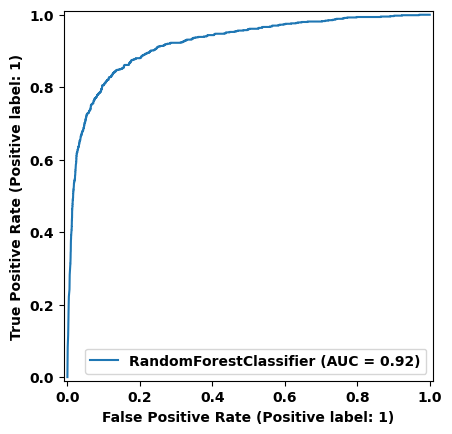

In [572]:
RocCurveDisplay.from_estimator(best_rf_model, X=X_test, y=y_test, drop_intermediate=False)

### Variable importance 

In [574]:
best_rf_model.feature_importances_

array([6.87592445e-04, 5.21754152e-05, 3.68387289e-02, 4.04319875e-04,
       4.99812507e-04, 1.96858524e-03, 9.38787115e-05, 2.74023026e-04,
       2.68012245e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.33187088e-04,
       1.76897247e-05, 2.01864257e-02, 0.00000000e+00, 7.63222648e-04,
       1.29670616e-02, 8.06093473e-05, 1.76188031e-04, 1.13724260e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.95360090e-04,
       6.07426343e-04, 7.89538599e-02, 3.34225139e-03, 3.14212025e-03,
       9.27837780e-03, 3.25747531e-04, 1.07995759e-03, 8.12521709e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.65690621e-04,
       9.32868198e-04, 3.50464031e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.78492485e-04, 1.40463094e-03, 2.66853166e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.69758566e-05,
       0.00000000e+00, 3.70892902e-02, 4.84974072e-05, 1.69998577e-07,
      

In [576]:
imp_df = pd.DataFrame({
    "Varname": X_resampled.columns,
    "Imp": best_rf_model.feature_importances_
})

In [578]:
imp_df.sort_values(by="Imp", ascending=False)

Varname           Imp
80            total_ic_mou_8  1.445304e-01
65              loc_ic_mou_8  1.159851e-01
29              loc_og_mou_8  7.895386e-02
125      loc_ic_mou_%_change  5.509121e-02
59          loc_ic_t2m_mou_8  5.501409e-02
56          loc_ic_t2t_mou_8  5.498370e-02
62          loc_ic_t2f_mou_8  4.748672e-02
53            total_og_mou_8  3.708929e-02
2                     arpu_8  3.683873e-02
98            max_rech_amt_8  2.800735e-02
104              vol_2g_mb_8  2.293743e-02
101       last_day_rch_amt_8  2.281827e-02
133    max_rech_amt_%_change  2.199375e-02
17          loc_og_t2t_mou_8  2.018643e-02
121               aug_vbc_3g  1.947616e-02
127  loc_ic_t2m_mou_%_change  1.645808e-02
126    total_ic_mou_%_change  1.613390e-02
95          total_rech_amt_8  1.537903e-02
130  loc_og_t2m_mou_%_change  1.471085e-02
20          loc_og_t2m_mou_8  1.296706e-02
23          loc_og_t2f_mou_8  1.137243e-02
131    total_og_mou_%_change  1.115145e-02
129  total_rech_amt_%_change  1.037298e-02
32          std_og_t2t_mou_8  9.278378e-03
58          loc_ic_t2m_mou_7  8.652478e-03
35          std_og_t2m_mou_8  8.125217e-03
74          std_ic_t2f_mou_8  7.734467e-03
103              vol_2g_mb_7  7.427267e-03
143     max_rech_amt_678_var  6.690812e-03
102              vol_2g_mb_6  6.088155e-03
128      loc_og_mou_%_change  4.944191e-03
66          std_ic_t2t_mou_6  4.842393e-03
135       loc_ic_mou_678_var  3.544006e-03
41              std_og_mou_8  3.504640e-03
30          std_og_t2t_mou_6  3.342251e-03
141     total_og_mou_678_var  3.267599e-03
139   total_rech_amt_678_var  3.149946e-03
31          std_og_t2t_mou_7  3.142120e-03
71          std_ic_t2m_mou_8  3.063526e-03
47              spl_og_mou_8  2.668532e-03
67          std_ic_t2t_mou_7  2.643653e-03
73          std_ic_t2f_mou_7  2.563043e-03
134  loc_ic_t2t_mou_%_change  2.084499e-03
122               jul_vbc_3g  2.056163e-03
5                onnet_mou_8  1.968585e-03
72          std_ic_t2f_mou_6  1.954425e-03
90          total_rech_num_6  1.759721e-03
136     total_ic_mou_678_var  1.725666e-03
97            max_rech_amt_7  1.703748e-03
46              spl_og_mou_7  1.404631e-03
34          std_og_t2m_mou_7  1.079958e-03
138       loc_og_mou_678_var  1.074588e-03
142   loc_og_t2t_mou_678_var  1.029085e-03
132  loc_og_t2t_mou_%_change  1.013628e-03
68          std_ic_t2t_mou_8  9.938593e-04
92          total_rech_num_8  9.431837e-04
40              std_og_mou_7  9.328682e-04
39              std_og_mou_6  7.656906e-04
19          loc_og_t2m_mou_7  7.632226e-04
63              loc_ic_mou_6  7.069053e-04
0                     arpu_6  6.875924e-04
137   loc_ic_t2m_mou_678_var  6.492126e-04
28              loc_og_mou_7  6.074263e-04
99        last_day_rch_amt_6  5.890987e-04
94          total_rech_amt_7  5.732836e-04
91          total_rech_num_7  5.399349e-04
15          loc_og_t2t_mou_6  5.331871e-04
96            max_rech_amt_6  5.211088e-04
4                onnet_mou_7  4.998125e-04
61          loc_ic_t2f_mou_7  4.923338e-04
77              std_ic_mou_8  4.687798e-04
78            total_ic_mou_6  4.659884e-04
79            total_ic_mou_7  4.385297e-04
140   loc_og_t2m_mou_678_var  4.243660e-04
3                onnet_mou_6  4.043199e-04
57          loc_ic_t2m_mou_6  3.636876e-04
33          std_og_t2m_mou_6  3.257475e-04
27              loc_og_mou_6  2.953601e-04
45              spl_og_mou_6  2.784925e-04
7               offnet_mou_7  2.740230e-04
8               offnet_mou_8  2.680122e-04
75              std_ic_mou_6  2.416766e-04
76              std_ic_mou_7  2.125002e-04
64              loc_ic_mou_7  2.029281e-04
22          loc_og_t2f_mou_7  1.761880e-04
70          std_ic_t2m_mou_7  1.304739e-04
93          total_rech_amt_6  1.091228e-04
51            total_og_mou_6  9.697586e-05
6               offnet_mou_6  9.387871e-05
21          loc_og_t2f_mou_6  8.060935e-05
120                      aon  7.179898e-05
60          loc_ic_t2f_mou_6  6.867569e-05
144   loc_ic_t2t_mou_6

### Above  the list of features in the order of their importance